# Water Pollution in Europe
## Classification for Water Quality

In this project, our goal is to develop and train a machine learning model capable of accurately classifying the water quality index into three categories: Low, Medium, and High. To achieve this, we employ supervised machine learning techniques such as Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbor (KNN), and Multilayer Perceptron (MLP).

## Project Overview:

### Problem Definition

Given chemical parameters in drinking water, can we accurately calculate the water quality index, classify it accordingly, and make accurate predictions using machine learning models?

### Data EDA (Exploratory Data Analysis)

The original data is provided by the[ European Environmental Agency (EEA)](https://www.eea.europa.eu/en).

#### Features

The features consist of chemical elements found in drinking water. The value range is set by the World Health Organization guidelines.

#### Data Dictionary

- **Monitoring Site ID:** Unique identification codes for monitoring locations following ISO standards.
- **Time Sampling Date:** The date of measurement in Year-Month-Day format.
- **Ammonium:** Concentration levels in milligrams per liter of water. Allowed range of Ammonium: 0.25 mg/L to 35 mg/L.
- **Nitrate:** Concentration levels in milligrams per liter of water. Allowed range of Nitrate: 3 mg/L to 50 mg/L.
- **Dissolved Oxygen:** Concentration levels in milligrams per liter of water. Allowed range of Dissolved Oxygen: 4 mg/L to 10 mg/L.
- **Total Nitrogen:** Concentration levels in milligrams per liter of water. Allowed range of Total Nitrogen: 0.5 mg/L to 2 mg/L.
- **Phosphate:** Concentration levels in milligrams per liter of water. Allowed range of Phosphate: 0.075 mg/L to 0.35 mg/L.
- **Total Phosphorus:** Concentration levels in milligrams per liter of water. Allowed range of Total Phosphorus: 0.15 mg/L to 0.7 mg/L.
- **Chlorophyll a:** Concentration levels in milligrams per liter of water. Allowed range of Chlorophyll a: 1 mg/L to 300 mg/L.

### Modeling

We will use the following models for supervised machine learning to achieve our goals:

- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor

### Evaluation

Success will be considered if we can reach a 95% accuracy in predicting the water quality index on the test dataset.

### Final Results

Final results of evaluated metrics for each model.


## Import's

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

In [3]:
# round all the float 4 decimals
pd.options.display.float_format='{:,.4f}'.format

# Data EDA (Exploratory Data Analysis)

The dataset used for this water quality classification project was obtained from the [European Environment Agency](https://www.eea.europa.eu/) (EEA) and contains a vast amount of information on the status and quality of Europe's water resources, including rivers, lakes, groundwater bodies, transitional, coastal, and marine waters. Additionally, it provides data on the quantity of Europe's water resources and the emissions to surface waters from point and diffuse sources of pollution. Due to the sheer size of the dataset (16GB), a subset of the data will be utilized for the project.

The EDA (Exploratory Data Analysis) process will consist of two steps:

#### Step 1 - Clean Data

- 1.1 **Select Relevant Data**
- 1.2 **Create Custom Datasets and Deal with Errors**

#### Step 2 - Data Preprocessing

- 2.1 **Deal with Duplicate, NaN, and Outliers**

- 2.2 **Calculate WQI (Water Quality Index)**
- 2.3 **Data Scaling**

# Step 1 - Clean Data

In this step, we will begin with the selection of relevant data for analysis. Next, the chemical elements (features) of interest will be extracted, and the data from three different countries will be selected for use as training, testing, and validation data, respectively. Separated into three distinct dataframes, the various dataframes will be merged into a single dataset for each selected country, grouped by location, date of measurement, as well as the specific chemical elements under analysis. Finally, we will address duplicated and NaN values.

1. **Select Relevant Data:**

   - Identify and extract the chemical elements (features) of interest.
   - Select data from three different countries for training, testing, and validation.

2. **Create Custom Datasets and Deal with Errors:**

   - Create separate dataframes for each country.
   - Merge the dataframes into a single dataset for each country, grouped by location, date of measurement, and specific chemical elements.
   - Address errors caused by sensors malfunctions or human errors.

## 1.1 Select Releveant Data

In [4]:
# the path to csv file
data = '/content/drive/MyDrive/WaterQualityProject/Waterbase.csv/WaterBaseData.csv'

In [5]:
# chunking the data into chunks of 1 000 rows and all the columns it contains.
df_chunk = pd.read_csv(data, low_memory=False, chunksize=1000)

In [6]:
# Reading just 1 chunk to get an overview of the data.
# This is useful for quickly inspecting the structure and content of the dataset.
for chunk in df_chunk:
  print(chunk)
  break

    monitoringSiteIdentifier monitoringSiteIdentifierScheme  \
0               IT0808000200           euMonitoringSiteCode   
1               IT0808000200           euMonitoringSiteCode   
2               IT0808000200           euMonitoringSiteCode   
3               IT0808000200           euMonitoringSiteCode   
4               IT0808000200           euMonitoringSiteCode   
..                       ...                            ...   
995             IT0811001800           euMonitoringSiteCode   
996             IT0811001800           euMonitoringSiteCode   
997             IT0811001800           euMonitoringSiteCode   
998             IT0811001800           euMonitoringSiteCode   
999             IT0811001800           euMonitoringSiteCode   

    parameterWaterBodyCategory observedPropertyDeterminandCode  \
0                           RW                     CAS_87-68-3   
1                           RW                     CAS_87-68-3   
2                           RW               

In [7]:
# selecting the columns that are revelant for this project.
df = pd.read_csv(data,
                 usecols=['monitoringSiteIdentifier',
                          'observedPropertyDeterminandLabel',
                          'resultUom',
                          'phenomenonTimeSamplingDate',
                          'resultObservedValue'],
                 parse_dates=['phenomenonTimeSamplingDate'])

In [8]:
df.head()

monitoringSiteIdentifier observedPropertyDeterminandLabel resultUom  \
0             IT0808000200              Hexachlorobutadiene      ug/L   
1             IT0808000200              Hexachlorobutadiene      ug/L   
2             IT0808000200              Hexachlorobutadiene      ug/L   
3             IT0808000200              Hexachlorobutadiene      ug/L   
4             IT0808000200                      Naphthalene      ug/L   

  phenomenonTimeSamplingDate  resultObservedValue  
0                 2016-04-12               0.0500  
1                 2016-05-24               0.0500  
2                 2016-07-06               0.0500  
3                 2016-08-24               0.0500  
4                 2016-10-10               0.1000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51321704 entries, 0 to 51321703
Data columns (total 5 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   monitoringSiteIdentifier          object        
 1   observedPropertyDeterminandLabel  object        
 2   resultUom                         object        
 3   phenomenonTimeSamplingDate        datetime64[ns]
 4   resultObservedValue               float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ GB


In [10]:
# Renaming columns for better clarity and descriptiveness.
df = df.rename({'monitoringSiteIdentifier' : 'MonitoringSiteID',
                'observedPropertyDeterminandLabel' : 'ObservedPropertyLabel',
                'resultUom' : 'MeasuredMetric',
                'phenomenonTimeSamplingDate': 'TimeSamplingDate',
                'resultObservedValue' : 'ObservedValue'}, axis=1)

In [11]:
df.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
0     IT0808000200   Hexachlorobutadiene           ug/L       2016-04-12   
1     IT0808000200   Hexachlorobutadiene           ug/L       2016-05-24   
2     IT0808000200   Hexachlorobutadiene           ug/L       2016-07-06   
3     IT0808000200   Hexachlorobutadiene           ug/L       2016-08-24   
4     IT0808000200           Naphthalene           ug/L       2016-10-10   

   ObservedValue  
0         0.0500  
1         0.0500  
2         0.0500  
3         0.0500  
4         0.1000

From the first overview of the data, we can see that we deal with a large number of rows. Therefore, we will proceed by selecting only the rows that contain the chemical elements (features) of interest for our project.


#### 1.1.1 Selecting the chemical elements (features)

In [12]:
# Read all unique observed property labels (chemical elements) from the dataset.
elements = df['ObservedPropertyLabel'].unique()
elements_df = pd.DataFrame(elements, columns=['ChemicalElements'])
elements_df

ChemicalElements
0                      Hexachlorobutadiene
1                              Naphthalene
2                                     MCPA
3    2,4-dichlorophenoxyacetic acid, 2-4 D
4                             Methidathion
..                                     ...
784                            Fluconazole
785                             Miconazole
786                            Microcystin
787                          Tetrabutyltin
788             Tungsten and its compounds

[789 rows x 1 columns]

This dataset contains 790 different chemical elements measured in water. We will only select 7 of those labels that are found in seawater and have the greatest impact (the number of weight factors - 5 is the highest and 2 is the lowest) for the calculation of the Water Quality Index (WQI).

- Ammonium - Weight Factor 5
- Nitrate - Weight Factor 5
- Dissolved Oxygen - Weight Factor 5
- Total Nitrogen - Weight Factor 5
- Phosphate - Weight Factor 4
- Chlorophyll a - Weight Factor 3
- Total Phosphorus - Weight Factor 2


In [13]:
# Select chemical elements to be extracted as features from the dataset.
features = df.loc[(df['ObservedPropertyLabel'] == 'Ammonium') |
                 (df['ObservedPropertyLabel'] == 'Nitrate') |
                 (df['ObservedPropertyLabel'] == 'Dissolved oxygen') |
                 (df['ObservedPropertyLabel'] == 'Total phosphorus') |
                 (df['ObservedPropertyLabel'] == 'Phosphate') |
                 (df['ObservedPropertyLabel'] == 'Chlorophyll a') |
                 (df['ObservedPropertyLabel'] == 'Total nitrogen')]
features

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
296            IT12-L5_70         Chlorophyll a           ug/L   
298            IT12-L5_70               Nitrate      mg{NO3}/L   
299            IT12-L5_70              Ammonium      mg{NH4}/L   
300            IT12-L5_70              Ammonium      mg{NH4}/L   
301            IT12-L5_70      Total phosphorus        mg{P}/L   
...                   ...                   ...            ...   
51321694    IT08FPF-06-00               Nitrate      mg{NO3}/L   
51321699            EE158               Nitrate      mg{NO3}/L   
51321700            EE158               Nitrate      mg{NO3}/L   
51321701            EE158              Ammonium      mg{NH4}/L   
51321702            EE158              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
296            2016-05-20         0.5000  
298            2016-05-20         0.0600  
299            2016-05-20        80.0000  
300            2016-05-20         0.1400  
301            2016-05-20         0.0050  
...                   ...            ...  
51321694       2018-04-17        12.0000  
51321699       2013-07-24         0.4000  
51321700       2014-10-28         0.4000  
51321701       2013-07-24         0.6800  
51321702       2014-10-28         0.7700  

[3308408 rows x 5 columns]

In [14]:
# Count the values of the selected features.
features['ObservedPropertyLabel'].value_counts()

Nitrate             803365
Ammonium            701540
Dissolved oxygen    513301
Phosphate           504365
Total phosphorus    447551
Total nitrogen      241277
Chlorophyll a        97009
Name: ObservedPropertyLabel, dtype: int64

#### 1.1.2 Selecting Data from Targeted Locations

- We will focus on three specific locations: **Italy**, **Sweden**, and **Estonia**. These countries were chosen due to their unique closed locations of their gulf.

- For each country, we will divide the data into three separate datasets: Training, Validation, and Testing. The size of each dataset will be determined based on the available data.


In [15]:
# Selecting all the rows which start with the country code 'IT' for Italy
location_IT = features.loc[features['MonitoringSiteID'].str.startswith('IT')]
location_IT

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
296            IT12-L5_70         Chlorophyll a           ug/L   
298            IT12-L5_70               Nitrate      mg{NO3}/L   
299            IT12-L5_70              Ammonium      mg{NH4}/L   
300            IT12-L5_70              Ammonium      mg{NH4}/L   
301            IT12-L5_70      Total phosphorus        mg{P}/L   
...                   ...                   ...            ...   
51321627    IT08FPF-31-00               Nitrate      mg{NO3}/L   
51321628    IT08FPF-31-00               Nitrate      mg{NO3}/L   
51321637          IT12S04               Nitrate      mg{NO3}/L   
51321693    IT08FPF-06-00               Nitrate      mg{NO3}/L   
51321694    IT08FPF-06-00               Nitrate      mg{NO3}/L   

         TimeSamplingDate  ObservedValue  
296            2016-05-20         0.5000  
298            2016-05-20         0.0600  
299            2016-05-20        80.0000  
300            2016-05-20         0.1400  
301            2016-05-20         0.0050  
...                   ...            ...  
51321627       2018-10-08         4.5000  
51321628       2018-04-17         8.6000  
51321637       2018-10-10         0.7400  
51321693       2018-10-15        28.0000  
51321694       2018-04-17        12.0000  

[378143 rows x 5 columns]

In [16]:
# Checking how many different measuring locations are in Italy.
IT = location_IT['MonitoringSiteID'].unique()
len(IT)

10760

**Italy** has 10 761 different measuring locaitons

In [17]:
# Selecting all the data where the country code starts with 'SE' for Sweden
location_SW = features.loc[features['MonitoringSiteID'].str.startswith('SE')]
location_SW

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3292214   SE662925-154156               Nitrate      mg{NO3}/L   
3292215   SE662925-154156               Nitrate      mg{NO3}/L   
3292216   SE662925-154156              Ammonium      mg{NH4}/L   
3353863        SE40000_60               Nitrate      mg{NO3}/L   
3353864        SE40000_63        Total nitrogen        mg{N}/L   
...                   ...                   ...            ...   
50970232  SE647582-127369              Ammonium      mg{NH4}/L   
50970264  SE730224-165025      Total phosphorus        mg{P}/L   
50970265  SE730224-165025      Total phosphorus        mg{P}/L   
50970266  SE730224-165025      Total phosphorus        mg{P}/L   
50970267  SE730224-165025      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
3292214        2010-05-12         0.0040  
3292215        2011-09-05         0.0040  
3292216        2012-08-09         0.0330  
3353863        2012-11-29         1.3197  
3353864        2012-11-28         1.5900  
...                   ...            ...  
50970232       2018-10-29         0.0400  
50970264       2018-09-17         0.0037  
50970265       2018-10-20         0.0040  
50970266       2018-11-12         0.0045  
50970267       2018-12-17         0.0018  

[69649 rows x 5 columns]

In [18]:
# Checking how many different measuring locations are in Sweden
SW = location_SW['MonitoringSiteID'].unique()
len(SW)

501

**Sweden** has 502 different measuring locations

In [19]:
# selecting all the data where the country code starts with 'EE' for Estionia
location_ES = features.loc[features['MonitoringSiteID'].str.startswith('EE')]
location_ES

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3056584           EE12356              Ammonium      mg{NH4}/L   
3056587       EE1254_9463               Nitrate      mg{NO3}/L   
3056588       EE1254_9463               Nitrate      mg{NO3}/L   
3056589       EE1254_9463               Nitrate      mg{NO3}/L   
3056590       EE1254_9463               Nitrate      mg{NO3}/L   
...                   ...                   ...            ...   
51313263     EESJA3013000      Dissolved oxygen           mg/L   
51321699            EE158               Nitrate      mg{NO3}/L   
51321700            EE158               Nitrate      mg{NO3}/L   
51321701            EE158              Ammonium      mg{NH4}/L   
51321702            EE158              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
3056584        2012-07-08         0.2000  
3056587        1977-04-11         0.4000  
3056588        1978-09-07         2.0000  
3056589        1982-04-20         0.4000  
3056590        1984-04-18         0.4000  
...                   ...            ...  
51313263       2015-03-19         5.4000  
51321699       2013-07-24         0.4000  
51321700       2014-10-28         0.4000  
51321701       2013-07-24         0.6800  
51321702       2014-10-28         0.7700  

[77257 rows x 5 columns]

In [20]:
# Checking how many measuring locations are in Estonia
ES = location_ES['MonitoringSiteID'].unique()
len(ES)

1372

**Estonia** has 1 373 different measuring locations

## 1.2 Create Custom Datasets

The next step is to transform the data and order it by the location it was measured, the date it was measured on, and the chemical parameters that were measured in that location on that date. This will also be useful for creating some graphs and plots to visualize how our data is outlined.
Example:
---
Transform from:

| Location | Date | Propertylabel | ObservedValue |
| :----: | :----: | :----: | :----:
| Italy | 20-01-2021 | 0.45 | Ammoinium
| Sweden | 20-01-2021 | 0.45 | Nitrate
| Estonia | 20-01-2021 | 0.45 | Phosphate

---

Transform To:

| Location | Date | Ammonium | Nitrate | Phosphate | DissolvedOxygen |
| :----: | :----: | :----: | :----: | :----: | :----:
| Italy | 20-01-2021 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45
| Sweden | 20-01-2021 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45
| Estonia | 20-01-2021 | 0.45 | 0.45 | 0.45 | 0.45 | 0.45

### 1.2.1 Create Custom Dataset form Italy Data and Deal with Errors

First, we will select the rows that contain measured values for the chosen chemical elements. Then, we will merge all of them together into one dataframe, grouped by measuring location and time for each chemical element, respectively. Additionally, we will remove all values that are considered as human errors and sensor malfunctions.


In [21]:
def plot_data(dataframe,figure_size=(15,5)):
  """
    Create a line plot for the given dataset.

    Parameters:
    - dataframe (pd.DataFrame): The dataset to be plotted.
    - figure_size (tuple, optional): Size of the plot. Default is (15, 5).

    Returns:
    - None

    This function generates a line plot for the observed values in the given dataset.
    You can customize the chemical element and the size of the figure.

    Example:
    plot_data(my_dataframe, figure_size=(12, 6))
  """
  fig, ax = plt.subplots(figsize=(figure_size))
  line = ax.plot(dataframe['TimeSamplingDate'], dataframe['ObservedValue'])
  ax.set(title=f"Line plot for values of {dataframe['ObservedPropertyLabel'].values[1]} over the years",
         xlabel='Years',
         ylabel=f"{dataframe['ObservedPropertyLabel'].values[1]} - {dataframe['MeasuredMetric'].values[1]}")
  return plt.show()

In [22]:
def drop_errors(df):
  '''
    Drop values higher than 1000 mg/L from the given dataset.

    Parameters:
    - df (pd.DataFrame): The dataset to be cleaned.

    Returns:
    - pd.DataFrame: The cleaned dataset with values dropped.

    This function drops values that are higher than 1000 mg/L, assuming they are likely
    due to sensor malfunctions or human errors.

    Example:
    cleaned_data = drop_errors(my_dataframe)
  '''
  df = df.drop(df.loc[df['ObservedValue'] > 1000].index, axis=0)
  return df

#### **Ammonium**

In [23]:
# Locateing the rows that contain values for Ammonium
ammonium = location_IT.loc[location_IT['ObservedPropertyLabel']=='Ammonium']
ammonium.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
299        IT12-L5_70              Ammonium      mg{NH4}/L       2016-05-20   
300        IT12-L5_70              Ammonium      mg{NH4}/L       2016-05-20   
348        IT12-L5_70              Ammonium      mg{NH4}/L       2016-05-20   
350        IT12-L5_70              Ammonium      mg{NH4}/L       2016-05-20   
7313         IT10ELM1              Ammonium      mg{NH4}/L       2016-11-09   

      ObservedValue  
299         80.0000  
300          0.1400  
348         50.0000  
350          0.0600  
7313         2.0000

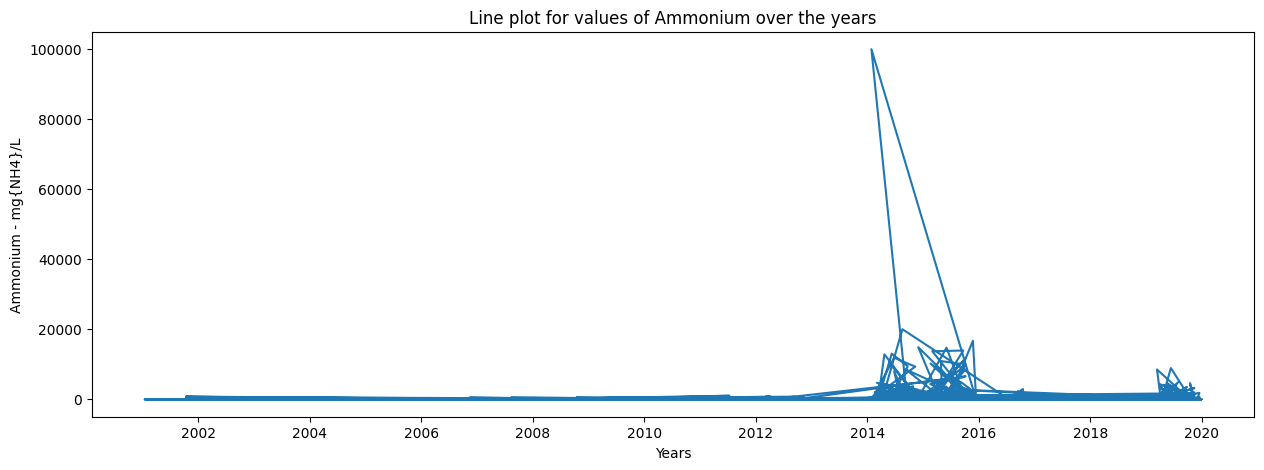

In [24]:
# Plot the values for Ammonium
plot_data(ammonium)

In [25]:
ammonium.describe()

ObservedValue
count    71,039.0000
mean         17.1016
std         446.9285
min           0.0000
25%           0.0256
50%           0.0500
75%           0.2578
max     100,000.0000

From the plot, it's evident that the **Ammonium** data is unevenly distributed and contains numerous outliers, which will be addressed later. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Ammonium** into classes with the following ranges:

1. High: Above 35 mg/L
2. Medium: Between 17.5 and 35 mg/L
3. Low: Below 17.5 mg/L

In [26]:
# Check which observed values are above 1000
errors = ammonium.loc[ammonium['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
110986         IT12-L5_70              Ammonium      mg{NH4}/L   
127058         IT12-L5_70              Ammonium      mg{NH4}/L   
296968         IT12-L5_70              Ammonium      mg{NH4}/L   
585877          IT13SA27P              Ammonium      mg{NH4}/L   
598401           IT13FO3P              Ammonium      mg{NH4}/L   
...                   ...                   ...            ...   
51064385         IT13TR3P              Ammonium      mg{NH4}/L   
51064386         IT13TR3P              Ammonium      mg{NH4}/L   
51065307        IT13TO12P              Ammonium      mg{NH4}/L   
51065784         IT13TR2P              Ammonium      mg{NH4}/L   
51068552        IT13TO12P              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
110986         2016-10-17     2,900.0000  
127058         2016-12-19     1,460.0000  
296968         2016-09-13     2,290.0000  
585877         2015-05-05     1,780.0000  
598401         2015-10-05    11,572.0000  
...                   ...            ...  
51064385       2015-06-16     1,570.0000  
51064386       2015-09-10     1,570.0000  
51065307       2015-09-08     1,290.0000  
51065784       2014-06-09     1,090.0000  
51068552       2015-11-30     1,280.0000  

[165 rows x 5 columns]

In [27]:
# Drop the values that are higher then 1000
ammonium = drop_errors(ammonium)
ammonium

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
299            IT12-L5_70              Ammonium      mg{NH4}/L   
300            IT12-L5_70              Ammonium      mg{NH4}/L   
348            IT12-L5_70              Ammonium      mg{NH4}/L   
350            IT12-L5_70              Ammonium      mg{NH4}/L   
7313             IT10ELM1              Ammonium      mg{NH4}/L   
...                   ...                   ...            ...   
51289978    IT08FPF-23-00              Ammonium      mg{NH4}/L   
51289979    IT08FPF-23-00              Ammonium      mg{NH4}/L   
51291662     IT08RE90-00N              Ammonium      mg{NH4}/L   
51291663     IT08RE90-00N              Ammonium      mg{NH4}/L   
51292185       IT02DBL100              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
299            2016-05-20        80.0000  
300            2016-05-20         0.1400  
348            2016-05-20        50.0000  
350            2016-05-20         0.0600  
7313           2016-11-09         2.0000  
...                   ...            ...  
51289978       2018-10-09         0.0690  
51289979       2018-04-05         0.0200  
51291662       2018-10-31         1.3300  
51291663       2018-05-28         1.0000  
51292185       2018-11-20         0.1030  

[70874 rows x 5 columns]

In [28]:
ammonium.describe()

ObservedValue
count    70,874.0000
mean          7.7861
std          52.7593
min           0.0000
25%           0.0256
50%           0.0500
75%           0.2549
max       1,000.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.

#### **Nitrate**

In [29]:
# Locateing the rows that contain values for Nitrate
nitrate = location_IT.loc[location_IT['ObservedPropertyLabel'] == 'Nitrate']
nitrate.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
298        IT12-L5_70               Nitrate      mg{NO3}/L       2016-05-20   
349        IT12-L5_70               Nitrate      mg{NO3}/L       2016-05-20   
1435     IT0811001800               Nitrate      mg{NO3}/L       2016-10-20   
1436     IT0811001800               Nitrate      mg{NO3}/L       2016-01-13   
1437     IT0811001800               Nitrate      mg{NO3}/L       2016-12-05   

      ObservedValue  
298          0.0600  
349          0.0200  
1435        15.4936  
1436         5.3121  
1437         8.4108

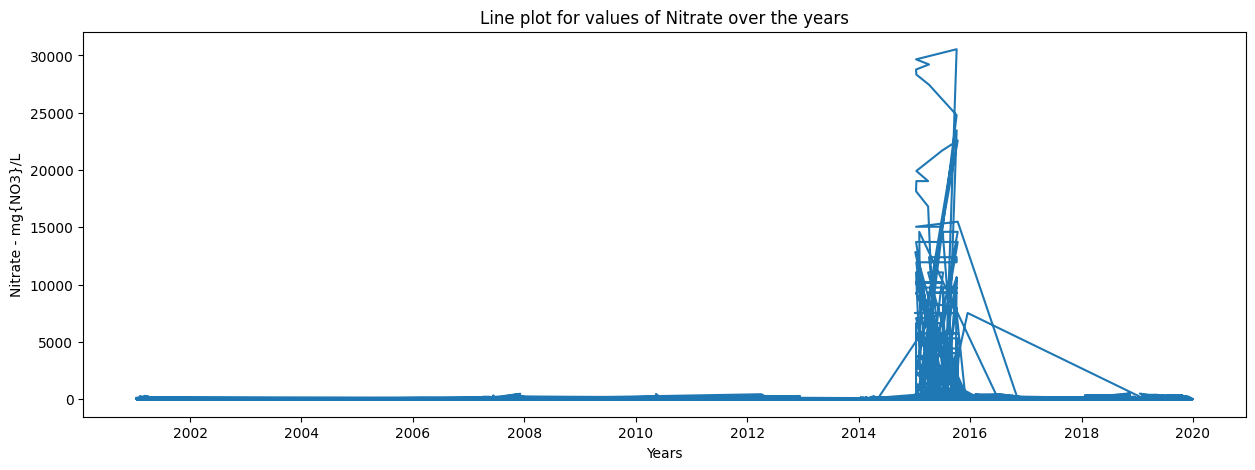

In [30]:
# Plot the values for Nitrate
plot_data(nitrate)

In [31]:
nitrate.describe()

ObservedValue
count    75,213.0000
mean         27.9565
std         456.7548
min           0.0002
25%           0.8852
50%           2.9229
75%          12.6000
max      30,546.0000

From the plot, we observe that the **Nitrate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Nitrate** into classes with the following ranges:

1. High: Above 50 mg/L
2. Medium: Between 25 and 50 mg/L
3. Low: Below 25 mg/L


In [32]:
# Check which observed values are above 1000
errors = nitrate.loc[nitrate['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
836047           IT10ASS1               Nitrate      mg{NO3}/L   
836048           IT10ASS1               Nitrate      mg{NO3}/L   
836049           IT10CAI1               Nitrate      mg{NO3}/L   
836050           IT10CHS2               Nitrate      mg{NO3}/L   
836051           IT10NES3               Nitrate      mg{NO3}/L   
...                   ...                   ...            ...   
50668984         IT10GEN1               Nitrate      mg{NO3}/L   
50674605         IT10LIB1               Nitrate      mg{NO3}/L   
50674613         IT10PIE8               Nitrate      mg{NO3}/L   
50674614         IT10PIE9               Nitrate      mg{NO3}/L   
50674615         IT10ROM0               Nitrate      mg{NO3}/L   

         TimeSamplingDate  ObservedValue  
836047         2015-01-12     6,641.0000  
836048         2015-07-01     6,641.0000  
836049         2015-04-07     6,641.0000  
836050         2015-04-07     6,641.0000  
836051         2015-04-07     6,641.0000  
...                   ...            ...  
50668984       2015-10-05    30,546.0000  
50674605       2015-02-23     2,745.0000  
50674613       2015-02-11     3,674.0000  
50674614       2015-02-11     3,542.0000  
50674615       2015-02-02    14,609.0000  

[121 rows x 5 columns]

In [33]:
# Drop the values that are higher then 1000
nitrate = drop_errors(nitrate)
nitrate

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
298            IT12-L5_70               Nitrate      mg{NO3}/L   
349            IT12-L5_70               Nitrate      mg{NO3}/L   
1435         IT0811001800               Nitrate      mg{NO3}/L   
1436         IT0811001800               Nitrate      mg{NO3}/L   
1437         IT0811001800               Nitrate      mg{NO3}/L   
...                   ...                   ...            ...   
51321627    IT08FPF-31-00               Nitrate      mg{NO3}/L   
51321628    IT08FPF-31-00               Nitrate      mg{NO3}/L   
51321637          IT12S04               Nitrate      mg{NO3}/L   
51321693    IT08FPF-06-00               Nitrate      mg{NO3}/L   
51321694    IT08FPF-06-00               Nitrate      mg{NO3}/L   

         TimeSamplingDate  ObservedValue  
298            2016-05-20         0.0600  
349            2016-05-20         0.0200  
1435           2016-10-20        15.4936  
1436           2016-01-13         5.3121  
1437           2016-12-05         8.4108  
...                   ...            ...  
51321627       2018-10-08         4.5000  
51321628       2018-04-17         8.6000  
51321637       2018-10-10         0.7400  
51321693       2018-10-15        28.0000  
51321694       2018-04-17        12.0000  

[75092 rows x 5 columns]

In [34]:
nitrate.describe()

ObservedValue
count    75,092.0000
mean         13.4156
std          35.2942
min           0.0002
25%           0.8852
50%           2.9000
75%          12.4001
max         982.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Dissolved Oxygen**

In [35]:
# Locateing the rows that contain values for Dissolved Oxygen
dissolved_oxygen = location_IT.loc[location_IT['ObservedPropertyLabel']=='Dissolved oxygen']
dissolved_oxygen.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
1942     IT0801090700      Dissolved oxygen           mg/L       2016-01-19   
1972     IT0801170300      Dissolved oxygen           mg/L       2016-10-25   
1973     IT0801170300      Dissolved oxygen           mg/L       2016-01-12   
2270     IT0801170300      Dissolved oxygen           mg/L       2016-11-09   
2271     IT0801170300      Dissolved oxygen           mg/L       2016-12-12   

      ObservedValue  
1942        13.1000  
1972         5.7000  
1973        10.9000  
2270        10.6000  
2271        11.2000

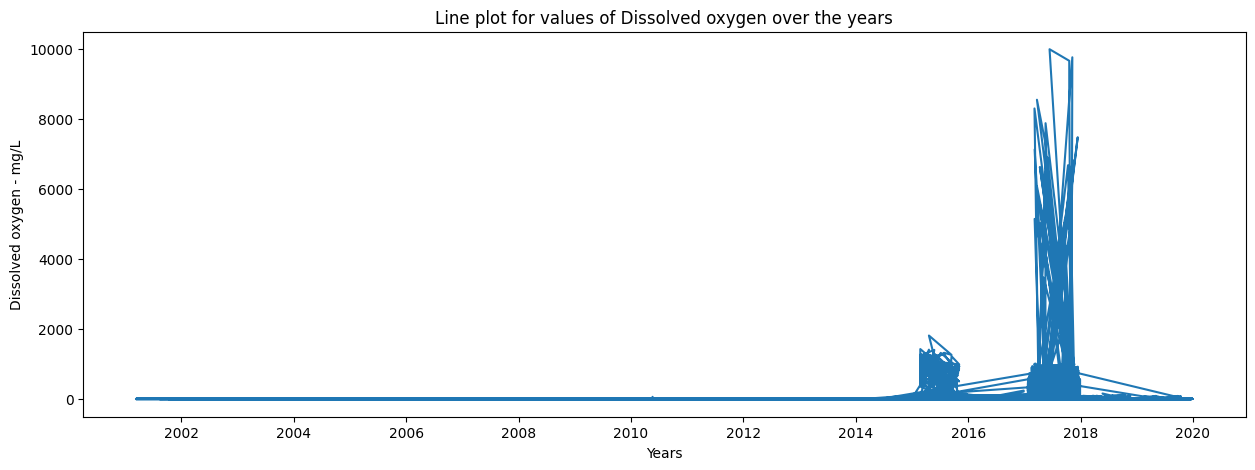

In [36]:
# Plot the values for Dissolved Oxygen
plot_data(dissolved_oxygen)

In [37]:
dissolved_oxygen.describe()

ObservedValue
count    71,634.0000
mean         21.3106
std         153.7947
min           0.0000
25%           5.8000
50%           7.9800
75%           9.9800
max       9,985.0000

Examining the plot, it's apparent that the **Dissolved Oxygen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Dissolved Oxygen** into classes with the following ranges:

1. High: Above 10 mg/L
2. Medium: Between 8 and 6 mg/L
3. Low: Below 4 mg/L and above 10 mg/L


In [38]:
# Check which observed values are above 1000
errors = dissolved_oxygen.loc[dissolved_oxygen['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
934442         IT01208512      Dissolved oxygen           mg/L   
934448         IT01215510      Dissolved oxygen           mg/L   
934451         IT01215540      Dissolved oxygen           mg/L   
936348         IT01205520      Dissolved oxygen           mg/L   
936350         IT01205520      Dissolved oxygen           mg/L   
...                   ...                   ...            ...   
50664634       IT01204512      Dissolved oxygen           mg/L   
50664635       IT01204511      Dissolved oxygen           mg/L   
50664638       IT01209510      Dissolved oxygen           mg/L   
50973131    ITG20_03PO001      Dissolved oxygen           mg/L   
51047130      IT08BOB3-00      Dissolved oxygen           mg/L   

         TimeSamplingDate  ObservedValue  
934442         2015-06-17     1,098.0000  
934448         2015-05-07     1,119.0000  
934451         2015-03-03     1,052.0000  
936348         2015-05-19     1,044.0000  
936350         2015-04-21     1,177.0000  
...                   ...            ...  
50664634       2015-06-09     1,196.0000  
50664635       2015-04-22     1,268.0000  
50664638       2015-02-26     1,275.0000  
50973131       2017-09-06     1,001.0000  
51047130       2017-03-14     1,018.0000  

[80 rows x 5 columns]

In [39]:
# Drop the values that are higher then 1000
dissolved_oxygen = drop_errors(dissolved_oxygen)
dissolved_oxygen

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
1942         IT0801090700      Dissolved oxygen           mg/L   
1972         IT0801170300      Dissolved oxygen           mg/L   
1973         IT0801170300      Dissolved oxygen           mg/L   
2270         IT0801170300      Dissolved oxygen           mg/L   
2271         IT0801170300      Dissolved oxygen           mg/L   
...                   ...                   ...            ...   
51289822       IT02DBL160      Dissolved oxygen           mg/L   
51291508       IT02DBL160      Dissolved oxygen           mg/L   
51292153       IT02DBL100      Dissolved oxygen           mg/L   
51321565    IT08FPF-44-00      Dissolved oxygen           mg/L   
51321566    IT08FPF-44-00      Dissolved oxygen           mg/L   

         TimeSamplingDate  ObservedValue  
1942           2016-01-19        13.1000  
1972           2016-10-25         5.7000  
1973           2016-01-12        10.9000  
2270           2016-11-09        10.6000  
2271           2016-12-12        11.2000  
...                   ...            ...  
51289822       2018-11-26        11.8800  
51291508       2018-02-06        12.2600  
51292153       2018-11-20        12.2500  
51321565       2018-10-10         3.3000  
51321566       2018-04-11         5.9000  

[71554 rows x 5 columns]

In [40]:
dissolved_oxygen.describe()

ObservedValue
count    71,554.0000
mean         17.8635
std          68.6695
min           0.0000
25%           5.8000
50%           7.9800
75%           9.9600
max         999.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Total Nitrogen**

In [41]:
# Locateing the rows that contain values for Total Nitrogen
total_nitrogen = location_IT.loc[location_IT['ObservedPropertyLabel'] == 'Total nitrogen']
total_nitrogen.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
2298     IT0801170300        Total nitrogen        mg{N}/L       2016-10-25   
2299     IT0801170300        Total nitrogen        mg{N}/L       2016-01-12   
2300     IT0801170300        Total nitrogen        mg{N}/L       2016-11-09   
2301     IT0801170300        Total nitrogen        mg{N}/L       2016-12-12   
2302     IT0801170300        Total nitrogen        mg{N}/L       2016-02-17   

      ObservedValue  
2298         1.0000  
2299         1.4000  
2300         1.0000  
2301         1.4000  
2302         3.3000

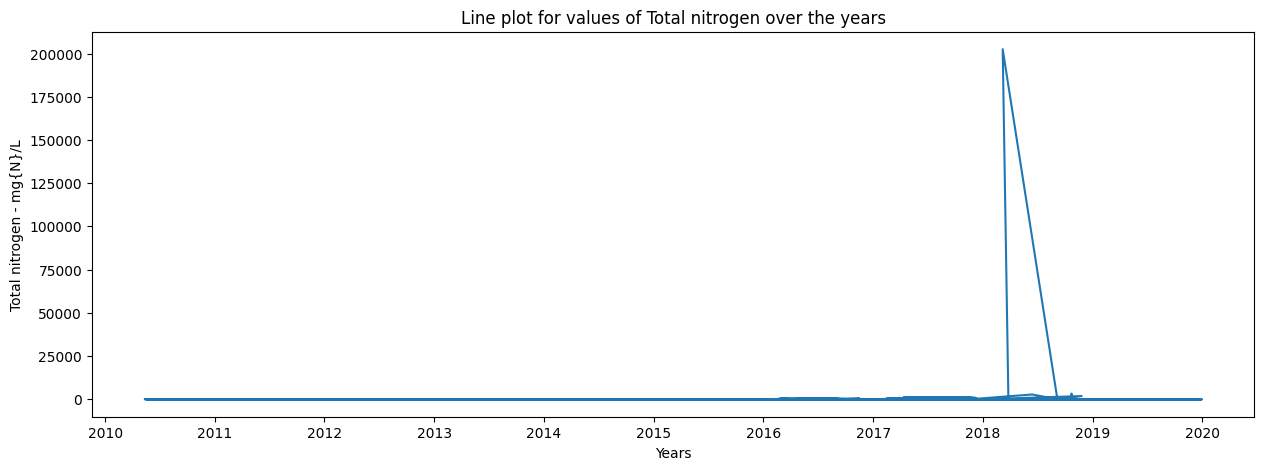

In [42]:
# pPlot the values for Total Nitrogen
plot_data(total_nitrogen)

In [43]:
total_nitrogen.describe()

ObservedValue
count    41,688.0000
mean         11.0522
std         992.8523
min           0.0001
25%           0.3393
50%           1.0000
75%           2.4000
max     202,491.0000

Examining the plot, it's evident that the **Total Nitrogen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Nitrogen** into classes with the following ranges:
1. High: Above 2 mg/L
2. Medium: Between 0.9 and 2 mg/L
3. Low: Below 0.9 mg/L


In [44]:
# Check which observed values are above 1000
errors = total_nitrogen.loc[total_nitrogen['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
48601618        IT12M4_35        Total nitrogen        mg{N}/L   
48754441     IT0899300101        Total nitrogen        mg{N}/L   
48759642     IT0899300101        Total nitrogen        mg{N}/L   
48759644     IT0899300101        Total nitrogen        mg{N}/L   

         TimeSamplingDate  ObservedValue  
48601618       2018-10-23     3,270.0000  
48754441       2018-03-08   202,491.0000  
48759642       2018-06-14     2,736.0000  
48759644       2018-11-26     1,837.0000

In [45]:
# Drop the values that are higher then 1000
total_nitrogen = drop_errors(total_nitrogen)

In [46]:
total_nitrogen.describe()

ObservedValue
count    41,684.0000
mean          6.0074
std          41.7413
min           0.0001
25%           0.3393
50%           1.0000
75%           2.4000
max         998.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Phosphate**

In [47]:
# Locateing the rows that contain values for Phosphate
phosphate = location_IT[location_IT['ObservedPropertyLabel'] == 'Phosphate']
phosphate.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
1419     IT0811001800             Phosphate        mg{P}/L       2016-10-20   
1420     IT0811001800             Phosphate        mg{P}/L       2016-01-13   
1421     IT0811001800             Phosphate        mg{P}/L       2016-12-05   
1422     IT0811001800             Phosphate        mg{P}/L       2016-03-15   
1423     IT0811001800             Phosphate        mg{P}/L       2016-04-27   

      ObservedValue  
1419         0.0100  
1420         0.0200  
1421         0.0400  
1422         0.0100  
1423         0.0300

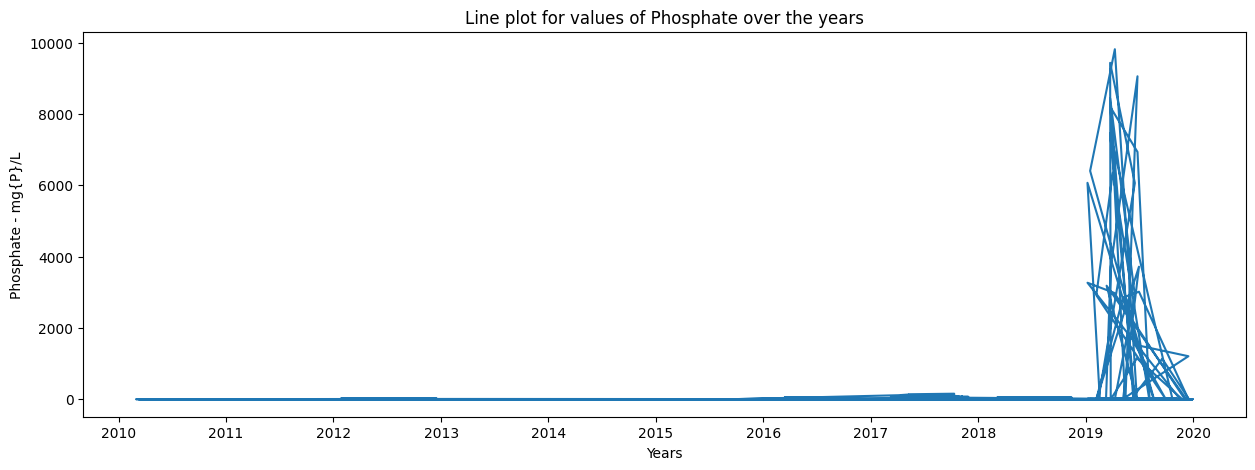

In [48]:
# Plot the values for Phosphate
plot_data(phosphate)

In [49]:
phosphate.describe()

ObservedValue
count    47,716.0000
mean          2.9033
std         126.3871
min           0.0000
25%           0.0070
50%           0.0150
75%           0.0710
max       9,816.0000

Examining the plot, it's clear that the **Phosphate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Phosphate**, into classes with the following ranges:
1. High: Above 0.35 mg/L
2. Medium: Between 0.075 and 0.35 mg/L
3. Low: Below 0.075 mg/L

In [50]:
# Check which observed values are above 1000
errors = phosphate.loc[phosphate['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
48813982           ITCAV1             Phosphate        mg{P}/L   
48813983           ITCAV1             Phosphate        mg{P}/L   
48816647            ITTU3             Phosphate        mg{P}/L   
48816648            ITTU3             Phosphate        mg{P}/L   
48816650            ITTU3             Phosphate        mg{P}/L   
48816651            ITTU3             Phosphate        mg{P}/L   
48871739           ITTES2             Phosphate        mg{P}/L   
48873432            ITTN2             Phosphate        mg{P}/L   
48940867            ITRD1             Phosphate        mg{P}/L   
48940868            ITRD1             Phosphate        mg{P}/L   
48965312            ITAP1             Phosphate        mg{P}/L   
48965313            ITAP1             Phosphate        mg{P}/L   
48969919         ITTN1TER             Phosphate        mg{P}/L   
48969920         ITTN1TER             Phosphate        mg{P}/L   
49009361           ITASM2             Phosphate        mg{P}/L   
49081320             ITR8             Phosphate        mg{P}/L   
49081321             ITR8             Phosphate        mg{P}/L   
49089798            ITT2A             Phosphate        mg{P}/L   
49096868            ITAC2             Phosphate        mg{P}/L   
49096869            ITAC2             Phosphate        mg{P}/L   
49123947           ITFIU1             Phosphate        mg{P}/L   
49156623             ITR6             Phosphate        mg{P}/L   
49175803             ITA2             Phosphate        mg{P}/L   
49175804             ITA2             Phosphate        mg{P}/L   

         TimeSamplingDate  ObservedValue  
48813982       2019-04-08     2,982.0000  
48813983       2019-01-07     3,267.0000  
48816647       2019-12-16     1,206.0000  
48816648       2019-06-18     1,527.0000  
48816650       2019-02-06     2,918.0000  
48816651       2019-04-03     6,353.0000  
48871739       2019-09-18     1,135.0000  
48873432       2019-07-01     3,717.0000  
48940867       2019-03-27     3,712.0000  
48940868       2019-06-26     9,057.0000  
48965312       2019-06-17     2,908.0000  
48965313       2019-03-25     8,442.0000  
48969919       2019-05-08     2,853.0000  
48969920       2019-07-01     3,015.0000  
49009361       2019-01-07     6,069.0000  
49081320       2019-06-17     6,063.0000  
49081321       2019-03-25     9,434.0000  
49089798       2019-03-13     3,184.0000  
49096868       2019-01-16     6,404.0000  
49096869       2019-04-10     9,816.0000  
49123947       2019-06-24     1,148.0000  
49156623       2019-03-25     7,456.0000  
49175803       2019-06-26     6,935.0000  
49175804       2019-03-27     8,177.0000

In [51]:
# Drop the values that are higher then 1000
phosphate = drop_errors(phosphate)
phosphate

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
1419         IT0811001800             Phosphate        mg{P}/L   
1420         IT0811001800             Phosphate        mg{P}/L   
1421         IT0811001800             Phosphate        mg{P}/L   
1422         IT0811001800             Phosphate        mg{P}/L   
1423         IT0811001800             Phosphate        mg{P}/L   
...                   ...                   ...            ...   
51290725    IT08FPF-26-00             Phosphate        mg{P}/L   
51290726    IT08FPF-26-00             Phosphate        mg{P}/L   
51290938       IT02DBL040             Phosphate        mg{P}/L   
51291117       IT02DBL060             Phosphate        mg{P}/L   
51292166       IT02DBL100             Phosphate        mg{P}/L   

         TimeSamplingDate  ObservedValue  
1419           2016-10-20         0.0100  
1420           2016-01-13         0.0200  
1421           2016-12-05         0.0400  
1422           2016-03-15         0.0100  
1423           2016-04-27         0.0300  
...                   ...            ...  
51290725       2018-10-16         0.0900  
51290726       2018-04-11         0.0900  
51290938       2018-08-06         0.0030  
51291117       2018-08-06         0.0030  
51292166       2018-11-20         0.0030  

[47692 rows x 5 columns]

In [52]:
phosphate.describe()

ObservedValue
count    47,692.0000
mean          0.4352
std           3.3083
min           0.0000
25%           0.0070
50%           0.0150
75%           0.0710
max         155.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Total Phospohorus**

In [53]:
# Locateing the rows that contain values for Total Phospohorus
total_phosphorus = location_IT.loc[location_IT['ObservedPropertyLabel'] == 'Total phosphorus']
total_phosphorus.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
301        IT12-L5_70      Total phosphorus        mg{P}/L       2016-05-20   
347        IT12-L5_70      Total phosphorus        mg{P}/L       2016-05-20   
1461     IT0801090700      Total phosphorus        mg{P}/L       2016-01-19   
1462     IT0801090700      Total phosphorus        mg{P}/L       2016-11-09   
1463     IT0801090700      Total phosphorus        mg{P}/L       2016-12-28   

      ObservedValue  
301          0.0050  
347          0.0050  
1461         0.0100  
1462         0.0200  
1463         0.0400

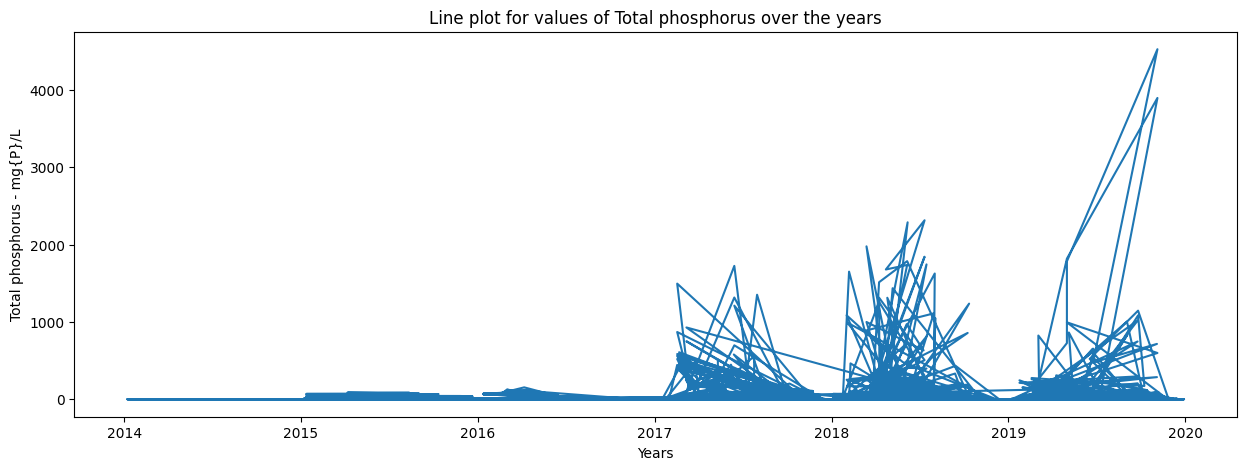

In [54]:
# Plot the values for Total phousphorus
plot_data(total_phosphorus)

In [55]:
total_phosphorus.describe()

ObservedValue
count    43,633.0000
mean          3.4541
std          56.3917
min           0.0000
25%           0.0100
50%           0.0300
75%           0.0900
max       4,525.0000

Examining the plot, it's apparent that the **Total Phosphorus** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Phosphorus** into classes with the following ranges:

1. High: Above 0.7 mg/L
2. Medium: Between 0.35 and 0.7 mg/L
3. Low: Below 0.35 mg/L


In [56]:
# Check which observed values are above 1000
errors = total_phosphorus.loc[total_phosphorus['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
36420939   IT017-BS-P09-F      Total phosphorus        mg{P}/L   
36421152   IT017-BS-P09-F      Total phosphorus        mg{P}/L   
36432864   IT017-SI-P10-F      Total phosphorus        mg{P}/L   
36494943       IT017-BR03      Total phosphorus        mg{P}/L   
36496644       IT017-BR03      Total phosphorus        mg{P}/L   
36498504       IT017-BR04      Total phosphorus        mg{P}/L   
36500432   IT017-BR-P01-F      Total phosphorus        mg{P}/L   
36502136   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
36502149   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
36502202   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
36504029   IT017-BR-P03-F      Total phosphorus        mg{P}/L   
36521918   IT017-BR-P11-F      Total phosphorus        mg{P}/L   
36523575   IT017-BR-P11-F      Total phosphorus        mg{P}/L   
36524955   IT017-BR-P12-F      Total phosphorus        mg{P}/L   
36526411   IT017-BR-P12-F      Total phosphorus        mg{P}/L   
36526437   IT017-BR-P12-F      Total phosphorus        mg{P}/L   
36545273   IT017-BS-P01-F      Total phosphorus        mg{P}/L   
36550501   IT017-OF-P04-F      Total phosphorus        mg{P}/L   
36552502   IT017-BS-P06-F      Total phosphorus        mg{P}/L   
45510949   IT017-BS-P09-F      Total phosphorus        mg{P}/L   
45821775   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
47719131         IT13GU01      Total phosphorus        mg{P}/L   
49614016   IT017-BS-P09-F      Total phosphorus        mg{P}/L   
49697454       IT017-OF04      Total phosphorus        mg{P}/L   
50780860   IT017-BS-P01-F      Total phosphorus        mg{P}/L   
50789883     IT017-BSRR02      Total phosphorus        mg{P}/L   
50804735   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
50804736   IT017-BR-P02-F      Total phosphorus        mg{P}/L   
50805581   IT017-BR-P12-F      Total phosphorus        mg{P}/L   
50805582   IT017-BR-P12-F      Total phosphorus        mg{P}/L   
51009854   IT017-SE-P01-F      Total phosphorus        mg{P}/L   
51057776   IT017-BR-P12-F      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
36420939       2018-07-16     1,742.8000  
36421152       2018-10-12     1,236.0000  
36432864       2018-07-31     1,109.7000  
36494943       2018-05-07     1,435.3000  
36496644       2018-02-06     1,649.3000  
36498504       2018-02-01     1,084.8000  
36500432       2018-04-09     1,257.8000  
36502136       2018-06-06     1,735.9000  
36502149       2018-04-23     1,677.1000  
36502202       2018-07-12     2,313.7000  
36504029       2018-04-09     1,312.6000  
36521918       2018-03-14     1,976.4000  
36523575       2018-06-07     2,287.0000  
36524955       2018-07-12     1,842.1000  
36526411       2018-04-09     1,512.6000  
36526437       2018-06-06     1,785.1000  
36545273       2018-08-03     1,050.6000  
36550501       2018-08-02     1,625.4000  
36552502       2018-04-26     1,311.7000  
45510949       2017-06-14     1,210.0000  
45821775       2017-06-14     1,724.0000  
47719131       2017-02-16     1,494.7000  
49614016       2019-09-26     1,145.0000  
49697454       2019-09-03     1,004.0000  
50780860       2019-09-25     1,016.0000  
50789883       2019-09-26     1,084.0000  
50804735       2019-05-02     1,783.1000  
50804736       2019-11-05     4,525.0000  
50805581       2019-05-02     1,817.4000  
50805582       2019-11-05     3,894.8000  
51009854       2017-07-31     1,351.0000  
51057776       2017-06-14     1,315.0000

In [57]:
# Drop the values that are higher then 1000
total_phosphorus = drop_errors(total_phosphorus)
total_phosphorus

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
301            IT12-L5_70      Total phosphorus        mg{P}/L   
347            IT12-L5_70      Total phosphorus        mg{P}/L   
1461         IT0801090700      Total phosphorus        mg{P}/L   
1462         IT0801090700      Total phosphorus        mg{P}/L   
1463         IT0801090700      Total phosphorus        mg{P}/L   
...                   ...                   ...            ...   
51068216         IT10CHS3      Total phosphorus        mg{P}/L   
51081856     IT22SG000020      Total phosphorus        mg{P}/L   
51082579     IT22SG000006      Total phosphorus        mg{P}/L   
51289828       IT02DBL080      Total phosphorus        mg{P}/L   
51289914           ITL130      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
301            2016-05-20         0.0050  
347            2016-05-20         0.0050  
1461           2016-01-19         0.0100  
1462           2016-11-09         0.0200  
1463           2016-12-28         0.0400  
...                   ...            ...  
51068216       2017-07-03         0.3300  
51081856       2015-07-20         1.0000  
51082579       2015-10-21         1.0000  
51289828       2018-05-15         0.0670  
51289914       2018-10-08         0.0170  

[43601 rows x 5 columns]

In [58]:
total_phosphorus.describe()

ObservedValue
count    43,601.0000
mean          2.2340
std          27.2883
min           0.0000
25%           0.0100
50%           0.0300
75%           0.0900
max         998.8000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Chlorophyll a**

In [59]:
# Locateing the rows that contain values for Chlorophyll a
chlorophyll = location_IT.loc[location_IT['ObservedPropertyLabel'] == 'Chlorophyll a']
chlorophyll.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric TimeSamplingDate  \
296         IT12-L5_70         Chlorophyll a           ug/L       2016-05-20   
354         IT12-L5_70         Chlorophyll a           ug/L       2016-05-20   
30153          IT05369         Chlorophyll a           ug/L       2016-08-09   
30212          IT05371         Chlorophyll a           ug/L       2016-08-09   
30929          IT05374         Chlorophyll a           ug/L       2016-08-09   

       ObservedValue  
296           0.5000  
354           1.8000  
30153         2.7000  
30212         3.0900  
30929         0.4300

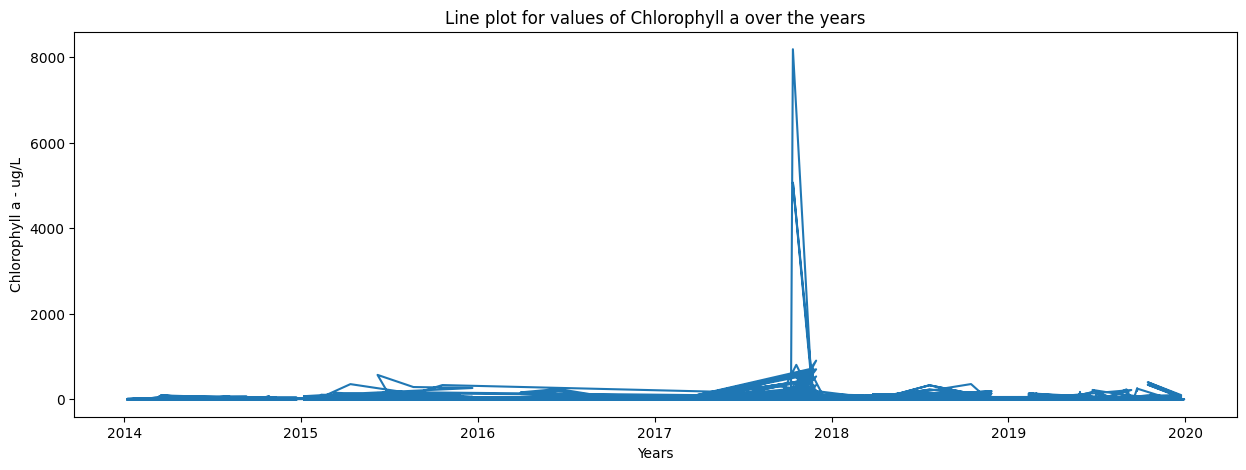

In [60]:
# Plot the values for chlorophyll a
plot_data(chlorophyll)

Examining the plot, it's clear that the **Chlorophyll a** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Chlorophyll a** into classes with the following ranges:

1. High: Above 300 mg/L
2. Medium: Between 150 and 300 mg/L
3. Low: Below 150 mg/L


In [61]:
chlorophyll.describe()

ObservedValue
count    27,220.0000
mean          5.6283
std          62.6761
min           0.0000
25%           0.4700
50%           1.2000
75%           3.2712
max       8,186.0000

In [62]:
# Check which observed values are above 1000
errors = chlorophyll.loc[chlorophyll['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
47732378  ITG-0184-AT50360-0118         Chlorophyll a           ug/L   
47780566  ITG-0184-AT50360-0032         Chlorophyll a           ug/L   

         TimeSamplingDate  ObservedValue  
47732378       2017-10-13     5,066.0000  
47780566       2017-10-13     8,186.0000

In [63]:
# Drop the values that are higher then 1000
chlorophyll = drop_errors(chlorophyll)

In [64]:
chlorophyll.describe()

ObservedValue
count    27,218.0000
mean          5.1419
std          22.9953
min           0.0000
25%           0.4700
50%           1.2000
75%           3.2700
max         902.6000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Merging Data**

Now that we have individual dataframes for each chemical element, we will consolidate all values into one dataframe, grouping them by location and the date they were measured. With each element having its own dataframe, we can modify the columns of 'Observed Value' to the respective 'Property Label' it refers to, along with its measured metric.


In [65]:
def rename_observed_value(dataframe, new_name, metric='-mg/L'):
    """
    Quick function to change the name of the 'Observed Value' to the new name given
    and add the metric of the measured value.

    Parameters:
        - dataframe: The DataFrame to change the column names.
        - new_name: The new name to be assigned to the column.
        - metric: The metric of the measured value. Default is '-mg/L'.
    """
    new_dataframe = dataframe.rename({'ObservedValue': f"{new_name}{metric}"}, axis=1)
    return new_dataframe

In [66]:
def clean_df(dataframe):
    """
    Quick function to drop unnecessary columns, facilitating the merging of data.

    Parameters:
        - dataframe: The DataFrame from which to drop columns ('ObservedPropertyLabel', 'MeasuredMetric').
    """
    new_dataframe = dataframe.drop(['ObservedPropertyLabel', 'MeasuredMetric'], axis=1)
    return new_dataframe


In [67]:
# Rename Observed Value for Ammonium
ammonium = rename_observed_value(ammonium, 'Ammonium')
# Drop the extra columns
ammonium = clean_df(ammonium)
ammonium.head()

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L
299        IT12-L5_70       2016-05-20        80.0000
300        IT12-L5_70       2016-05-20         0.1400
348        IT12-L5_70       2016-05-20        50.0000
350        IT12-L5_70       2016-05-20         0.0600
7313         IT10ELM1       2016-11-09         2.0000

In [68]:
# Rename Obsereved Value to Nitrate
nitrate = rename_observed_value(nitrate, 'Nitrate')
# Drop the extra columns
nitrate = clean_df(nitrate)
nitrate.head()

MonitoringSiteID TimeSamplingDate  Nitrate-mg/L
298        IT12-L5_70       2016-05-20        0.0600
349        IT12-L5_70       2016-05-20        0.0200
1435     IT0811001800       2016-10-20       15.4936
1436     IT0811001800       2016-01-13        5.3121
1437     IT0811001800       2016-12-05        8.4108

In [69]:
# Rename Observed Value for Dissolved Oxygen
dissolved_oxygen = rename_observed_value(dissolved_oxygen, 'DissolvedOxygen')
# Drop the extra columns
dissolved_oxygen = clean_df(dissolved_oxygen)
dissolved_oxygen.head()

MonitoringSiteID TimeSamplingDate  DissolvedOxygen-mg/L
1942     IT0801090700       2016-01-19               13.1000
1972     IT0801170300       2016-10-25                5.7000
1973     IT0801170300       2016-01-12               10.9000
2270     IT0801170300       2016-11-09               10.6000
2271     IT0801170300       2016-12-12               11.2000

In [70]:
# Rename Observed Value for Total Nitrogen
total_nitrogen = rename_observed_value(total_nitrogen, 'TotalNitrogen')
# Drop the extra columns
total_nitrogen = clean_df(total_nitrogen)
total_nitrogen.head()

MonitoringSiteID TimeSamplingDate  TotalNitrogen-mg/L
2298     IT0801170300       2016-10-25              1.0000
2299     IT0801170300       2016-01-12              1.4000
2300     IT0801170300       2016-11-09              1.0000
2301     IT0801170300       2016-12-12              1.4000
2302     IT0801170300       2016-02-17              3.3000

In [71]:
# Rename Observed Value for Phosphate
phosphate = rename_observed_value(phosphate, 'Phosphate')
# Drop the extra columns
phosphate = clean_df(phosphate)
phosphate.head()

MonitoringSiteID TimeSamplingDate  Phosphate-mg/L
1419     IT0811001800       2016-10-20          0.0100
1420     IT0811001800       2016-01-13          0.0200
1421     IT0811001800       2016-12-05          0.0400
1422     IT0811001800       2016-03-15          0.0100
1423     IT0811001800       2016-04-27          0.0300

In [72]:
# Rename Observed Values for Total Phosphorus
total_phosphorus = rename_observed_value(total_phosphorus, 'TotalPhosphorus')
# Drop the extra columns
total_phosphorus = clean_df(total_phosphorus)
total_phosphorus.head()

MonitoringSiteID TimeSamplingDate  TotalPhosphorus-mg/L
301        IT12-L5_70       2016-05-20                0.0050
347        IT12-L5_70       2016-05-20                0.0050
1461     IT0801090700       2016-01-19                0.0100
1462     IT0801090700       2016-11-09                0.0200
1463     IT0801090700       2016-12-28                0.0400

In [73]:
# Rename Observed Value for Chlorophyll a
chlorophyll = rename_observed_value(chlorophyll, 'Chlorophyll')
# Drop the extra columns
chlorophyll = clean_df(chlorophyll)
chlorophyll.head()

MonitoringSiteID TimeSamplingDate  Chlorophyll-mg/L
296         IT12-L5_70       2016-05-20            0.5000
354         IT12-L5_70       2016-05-20            1.8000
30153          IT05369       2016-08-09            2.7000
30212          IT05371       2016-08-09            3.0900
30929          IT05374       2016-08-09            0.4300

In [74]:
def merge_data():
  """This function will merge all the dataframes toghether and will return the final dataframe
    dataframes_to_merge = [ammonium, nitrate,
            dissolved_oxygen, total_nitrogen,
            phosphate, total_phosphorus, chlorophyll]

    df_merge = reduce(lambda left, right:
                      pd.merge(left, right, on=['MonitoringSiteID', 'TimeSamplingDate'],
                              how='outer'), dataframes_to_merge)
    return df_merge
  """
  merge = [ammonium, nitrate,
          dissolved_oxygen, total_nitrogen,
          phosphate, total_phosphorus, chlorophyll]

  df_merge = reduce(lambda left, right:
                    pd.merge(left, right, on=['MonitoringSiteID', 'TimeSamplingDate'],
                            how='outer'), merge)
  return df_merge

In [75]:
# Merge the data for Italy
df_IT = merge_data()
# Check shape of the newly merged data
df_IT.shape

(17871407, 9)

The final shape of the dataframe for Italy is 17871407 rows and 9 columns, which we will furter explore and preocess

### 1.2.2 Create Custom Dataset form Sweden Data and Deal with Errors

Similar to the previous dataframe, we will select rows that contain values for each chemical element, plot their values, and then merge them together into one dataframe. This merging will be based on the location and the time they were measured.

Additionally, we will perform data cleaning by dropping values that appear to be human errors or sensor malfunctions.

#### **Ammonium**

In [76]:
# Locateing the rows that contain values for Ammonium
ammonium = location_SW.loc[location_SW['ObservedPropertyLabel']== 'Ammonium']
ammonium

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3292216   SE662925-154156              Ammonium      mg{NH4}/L   
4935035   SE627500-151900              Ammonium      mg{NH4}/L   
4935915   SE627500-151900              Ammonium      mg{NH4}/L   
4938142   SE637654-150206              Ammonium      mg{NH4}/L   
4938152   SE642900-144100              Ammonium      mg{NH4}/L   
...                   ...                   ...            ...   
50831195  SE647447-127032              Ammonium      mg{NH4}/L   
50831196  SE647447-127032              Ammonium      mg{NH4}/L   
50831197  SE640109-125429              Ammonium      mg{NH4}/L   
50970231  SE647582-127369              Ammonium      mg{NH4}/L   
50970232  SE647582-127369              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
3292216        2012-08-09         0.0330  
4935035        2008-08-12         0.0080  
4935915        2012-04-20         0.0050  
4938142        2010-04-13         0.1540  
4938152        2009-09-08         0.0060  
...                   ...            ...  
50831195       2020-01-06       115.3200  
50831196       2020-01-06       133.3000  
50831197       2020-01-06         1.9600  
50970231       2018-09-12         0.0480  
50970232       2018-10-29         0.0400  

[14494 rows x 5 columns]

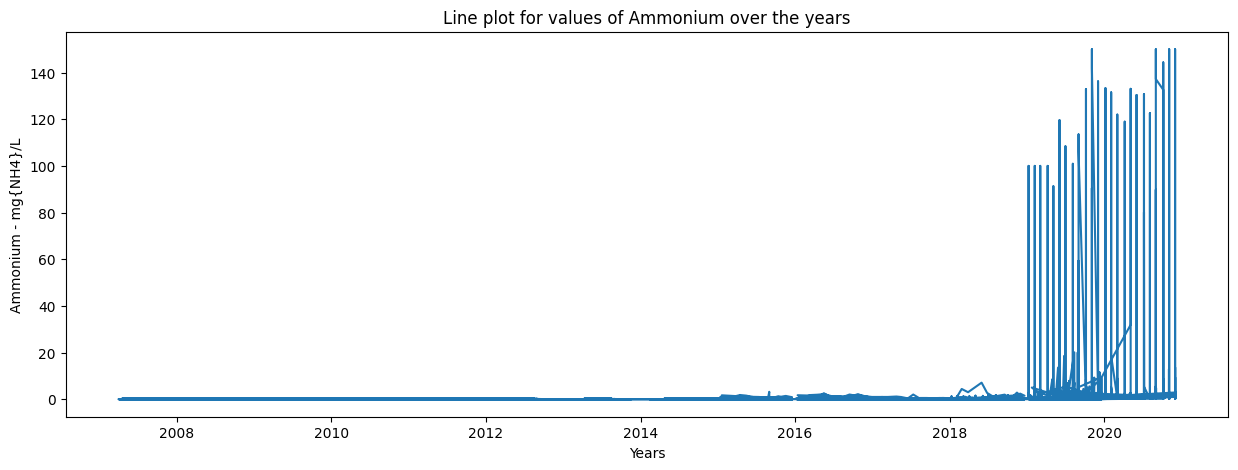

In [77]:
# Plot the values for Ammonium
plot_data(ammonium)

In [78]:
ammonium.describe()

ObservedValue
count    14,494.0000
mean          0.7618
std           7.4623
min           0.0010
25%           0.0092
50%           0.0240
75%           0.0980
max         150.0000

From the plot, it's evident that the **Ammonium** data is unevenly distributed and contains numerous outliers, which will be addressed later. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Ammonium** into classes with the following ranges:

1. High: Above 35 mg/L
2. Medium: Between 17.5 and 35 mg/L
3. Low: Below 17.5 mg/L

In [79]:
# Check which observed values are above 1000
errors = ammonium.loc[ammonium['ObservedValue'] > 1000]
errors

Empty DataFrame
Columns: [MonitoringSiteID, ObservedPropertyLabel, MeasuredMetric, TimeSamplingDate, ObservedValue]
Index: []

Here we can see that there are no errors for **Ammonium**

#### **Nitrate**

In [80]:
# Locateing the rows that contain values for Nitrate
nitrate = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Nitrate']
nitrate.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3292214  SE662925-154156               Nitrate      mg{NO3}/L   
3292215  SE662925-154156               Nitrate      mg{NO3}/L   
3353863       SE40000_60               Nitrate      mg{NO3}/L   
3353865       SE40000_67               Nitrate      mg{NO3}/L   
3364228  SE658709-154912               Nitrate      mg{NO3}/L   

        TimeSamplingDate  ObservedValue  
3292214       2010-05-12         0.0040  
3292215       2011-09-05         0.0040  
3353863       2012-11-29         1.3197  
3353865       2012-11-29         5.7572  
3364228       2010-05-06        10.0970

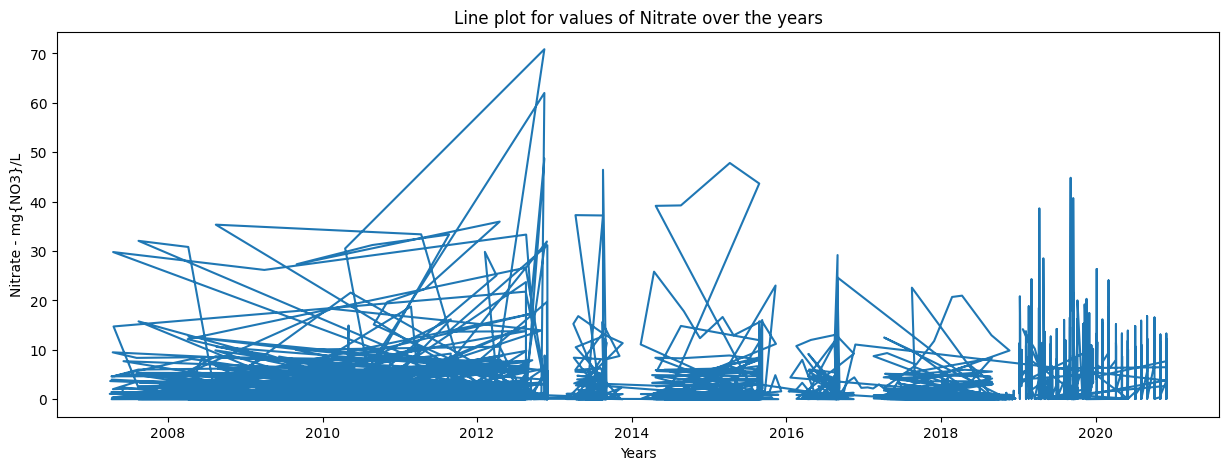

In [81]:
# Plot the values for Nitrate
plot_data(nitrate)

In [82]:
nitrate.describe()

ObservedValue
count     4,752.0000
mean          2.7054
std           4.8495
min           0.0010
25%           0.1000
50%           0.5410
75%           3.6605
max          70.8576

From the plot, we observe that the **Nitrate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Nitrate** into classes with the following ranges:

1. High: Above 50 mg/L
2. Medium: Between 25 and 50 mg/L
3. Low: Below 25 mg/L


Additionally, from the **max** we can see that there are no errors for **Nitrate**.

#### **Dissolved Oxygen**

In [83]:
# Locateing the rows that contain values for Dissolved Oxygen
dissolved_oxygen = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Dissolved oxygen']
dissolved_oxygen

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
4938147   SE637654-150206      Dissolved oxygen           mg/L   
4945876   SE661093-139154      Dissolved oxygen           mg/L   
4945877   SE661093-139154      Dissolved oxygen           mg/L   
4953581   SE662925-154156      Dissolved oxygen           mg/L   
4953582   SE662925-154156      Dissolved oxygen           mg/L   
...                   ...                   ...            ...   
50786400  SE628120-132365      Dissolved oxygen           mg/L   
50786401  SE628120-132365      Dissolved oxygen           mg/L   
50786452  SE663116-160415      Dissolved oxygen           mg/L   
50825368  SE705438-167938      Dissolved oxygen           mg/L   
50825369  SE705438-167938      Dissolved oxygen           mg/L   

         TimeSamplingDate  ObservedValue  
4938147        2010-04-13         0.3200  
4945876        2007-08-22         8.8000  
4945877        2010-08-09         6.6900  
4953581        2010-05-12         2.0700  
4953582        2010-09-02         1.9200  
...                   ...            ...  
50786400       2019-01-14        12.6400  
50786401       2019-02-14        12.5400  
50786452       2019-01-14        11.6600  
50825368       2019-10-15        21.7000  
50825369       2019-11-14        16.9000  

[4775 rows x 5 columns]

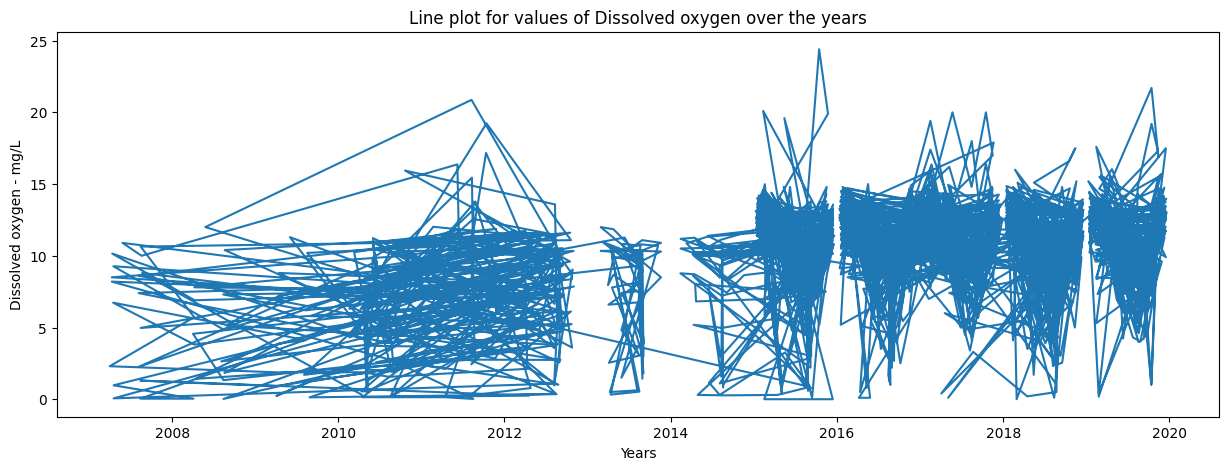

In [84]:
# Plot the values for Dissolved Oxygen
plot_data(dissolved_oxygen)

In [85]:
dissolved_oxygen.describe()

ObservedValue
count     4,775.0000
mean         10.0907
std           2.6421
min           0.0000
25%           8.9000
50%          10.3000
75%          11.8000
max          24.4000

Examining the plot, it's apparent that the **Dissolved Oxygen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Dissolved Oxygen** into classes with the following ranges:

1. High: Above 10 mg/L
2. Medium: Between 8 and 6 mg/L
3. Low: Below 4 mg/L and above 10 mg/L


No errors for **Dissolved Oxygen**

#### **Total Nitrogen**

In [86]:
# Locateing the rows that contain values for Total Nitrogen
total_nitrogen = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Total nitrogen']
total_nitrogen

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3353864        SE40000_63        Total nitrogen        mg{N}/L   
4935028   SE622700-136100        Total nitrogen        mg{N}/L   
4935029   SE622700-136100        Total nitrogen        mg{N}/L   
4940345   SE642900-144100        Total nitrogen        mg{N}/L   
4940346   SE642900-144100        Total nitrogen        mg{N}/L   
...                   ...                   ...            ...   
50831157  SE647447-127032        Total nitrogen        mg{N}/L   
50831158  SE647447-127032        Total nitrogen        mg{N}/L   
50831159  SE647447-127032        Total nitrogen        mg{N}/L   
50831160  SE647447-127032        Total nitrogen        mg{N}/L   
50831161  SE647447-127032        Total nitrogen        mg{N}/L   

         TimeSamplingDate  ObservedValue  
3353864        2012-11-28         1.5900  
4935028        2011-08-19         1.2970  
4935029        2012-08-16         1.2850  
4940345        2009-04-14         2.0090  
4940346        2011-04-07         1.8200  
...                   ...            ...  
50831157       2020-11-30        19.3000  
50831158       2020-11-30        58.6000  
50831159       2020-11-30       119.0000  
50831160       2020-11-30       120.2000  
50831161       2020-11-30       185.0000  

[14714 rows x 5 columns]

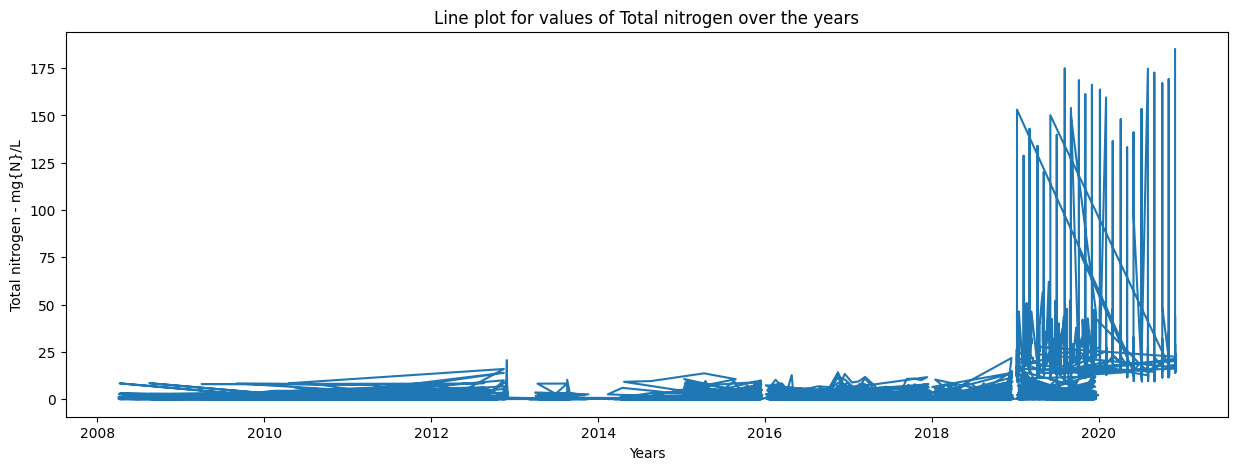

In [87]:
# Plot the values for Total Nitrogen
plot_data(total_nitrogen)

In [88]:
total_nitrogen.describe()

ObservedValue
count    14,714.0000
mean          4.9531
std          11.9941
min           0.0200
25%           0.2840
50%           0.5600
75%           2.2400
max         185.0000

Examining the plot, it's evident that the **Total Nitrogen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Nitrogen** into classes with the following ranges:

1. High: Above 2 mg/L
2. Medium: Between 0.9 and 2 mg/L
3. Low: Below 0.9 mg/L


No errors for **Total Nitrogen**

#### **Total Phosporus**

In [89]:
# Locateing the rows that contain values for Total Phospours
total_phosphorus = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Total phosphorus']
total_phosphorus

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
16479040  SE693100-140600      Total phosphorus        mg{P}/L   
16479070  SE693400-150200      Total phosphorus        mg{P}/L   
16479092  SE693400-150200      Total phosphorus        mg{P}/L   
16479119  SE702300-139100      Total phosphorus        mg{P}/L   
16480266  SE702300-139100      Total phosphorus        mg{P}/L   
...                   ...                   ...            ...   
50964765  SE695220-143383      Total phosphorus        mg{P}/L   
50970264  SE730224-165025      Total phosphorus        mg{P}/L   
50970265  SE730224-165025      Total phosphorus        mg{P}/L   
50970266  SE730224-165025      Total phosphorus        mg{P}/L   
50970267  SE730224-165025      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
16479040       2013-08-29         0.0060  
16479070       2013-06-12         0.0010  
16479092       2013-08-14         0.0050  
16479119       2013-06-11         0.0010  
16480266       2013-08-28         0.0010  
...                   ...            ...  
50964765       2015-11-04         0.0090  
50970264       2018-09-17         0.0037  
50970265       2018-10-20         0.0040  
50970266       2018-11-12         0.0045  
50970267       2018-12-17         0.0018  

[14286 rows x 5 columns]

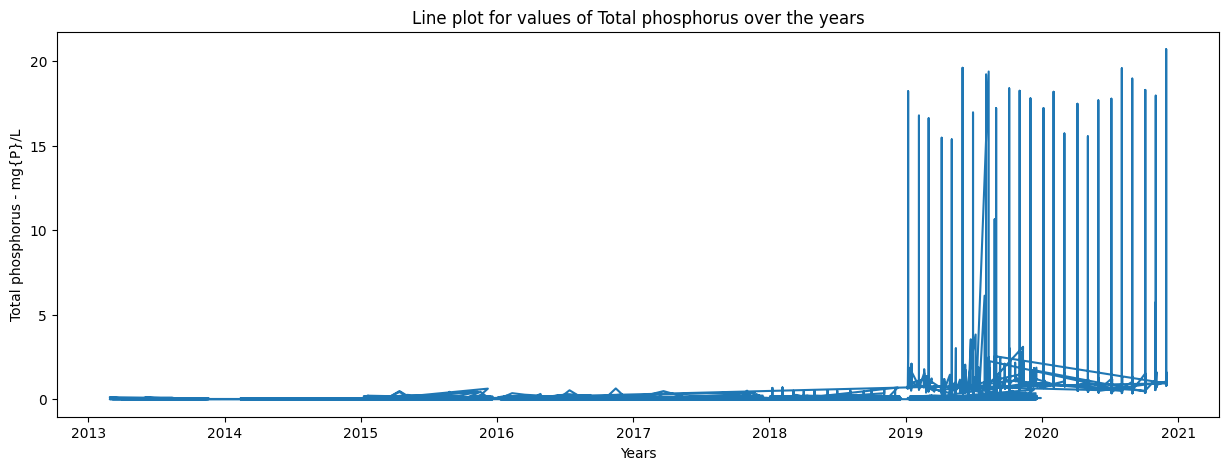

In [90]:
# Plot the values for Total Phosphorus
plot_data(total_phosphorus)

In [91]:
total_phosphorus.describe()

ObservedValue
count    14,286.0000
mean          0.2669
std           1.2024
min           0.0003
25%           0.0085
50%           0.0210
75%           0.0700
max          20.7200

Examining the plot, it's apparent that the **Total Phosphorus** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Phosphorus** into classes with the following ranges:

1. High: Above 0.7 mg/L
2. Medium: Between 0.35 and 0.7 mg/L
3. Low: Below 0.35 mg/L


No errors for **Total Phospours**

#### **Phosphate**

In [92]:
# Locateing the rows that contain values for Phosphate
phosphate = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Phosphate']
phosphate

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
16479063  SE693100-140600             Phosphate        mg{P}/L   
16479083  SE693400-150200             Phosphate        mg{P}/L   
16479112  SE693400-150200             Phosphate        mg{P}/L   
16479132  SE702300-139100             Phosphate        mg{P}/L   
16480286  SE702300-139100             Phosphate        mg{P}/L   
...                   ...                   ...            ...   
50831163  SE646416-125107             Phosphate        mg{P}/L   
50831164  SE646416-125107             Phosphate        mg{P}/L   
50831165  SE646416-125107             Phosphate        mg{P}/L   
50831166  SE646416-125107             Phosphate        mg{P}/L   
50831167  SE646416-125107             Phosphate        mg{P}/L   

         TimeSamplingDate  ObservedValue  
16479063       2013-08-29         0.0069  
16479083       2013-06-12         0.0039  
16479112       2013-08-14         0.0029  
16479132       2013-06-11         0.0029  
16480286       2013-08-28         0.0020  
...                   ...            ...  
50831163       2019-01-08         0.9200  
50831164       2019-01-08         2.0400  
50831165       2019-01-08         2.6200  
50831166       2019-01-08         3.3600  
50831167       2019-01-08         3.5700  

[13988 rows x 5 columns]

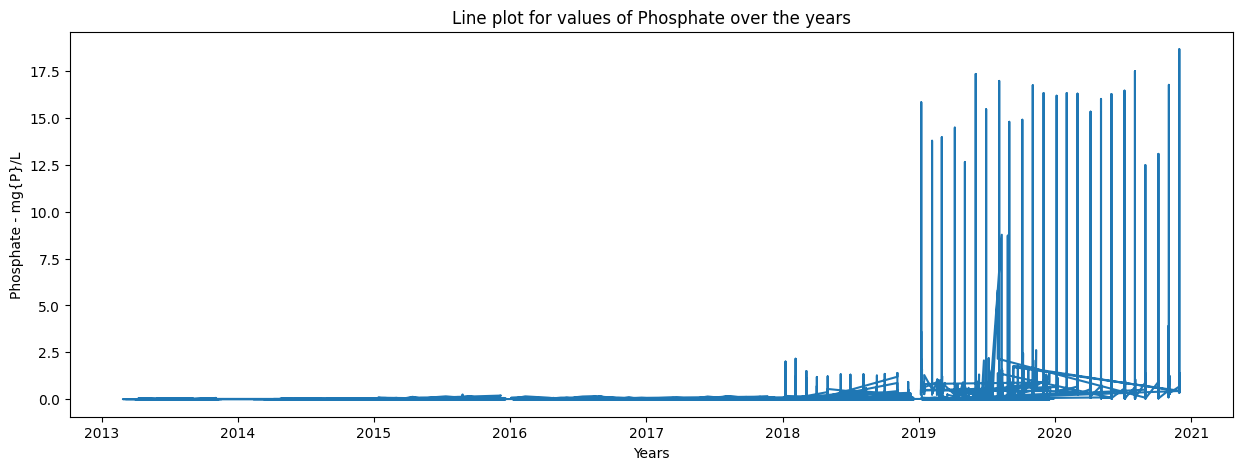

In [93]:
# Plot the values for Phosphate
plot_data(phosphate)

In [94]:
phosphate.describe()

ObservedValue
count    13,988.0000
mean          0.1751
std           1.0298
min           0.0003
25%           0.0010
50%           0.0040
75%           0.0475
max          18.6600

Examining the plot, it's clear that the **Phosphate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Phosphate**, into classes with the following ranges:
1. High: Above 0.35 mg/L
2. Medium: Between 0.075 and 0.35 mg/L
3. Low: Below 0.075 mg/L

No errors for **Phosphate**

#### **Chlorophyll a**

In [95]:
# Locateing the rows that contain values for Chlorophyll a
chlorophyll = location_SW.loc[location_SW['ObservedPropertyLabel'] == 'Chlorophyll a']
chlorophyll

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
26988971  SE615375-137087         Chlorophyll a           ug/L   
26988972  SE615375-137087         Chlorophyll a           ug/L   
26988973  SE615375-137087         Chlorophyll a           ug/L   
26988974  SE615375-137087         Chlorophyll a           ug/L   
26988975  SE617797-135339         Chlorophyll a           ug/L   
...                   ...                   ...            ...   
48839430  SE632231-136476         Chlorophyll a           ug/L   
48840513  SE633989-140731         Chlorophyll a           ug/L   
48840514  SE633989-140731         Chlorophyll a           ug/L   
48840515  SE633989-140731         Chlorophyll a           ug/L   
48840516  SE633989-140731         Chlorophyll a           ug/L   

         TimeSamplingDate  ObservedValue  
26988971       2015-02-26        29.0000  
26988972       2015-04-14        17.0000  
26988973       2015-08-13        57.0000  
26988974       2015-10-22        22.0000  
26988975       2015-02-26        29.0000  
...                   ...            ...  
48839430       2019-10-09         4.9000  
48840513       2019-02-13         1.4000  
48840514       2019-04-08         3.4000  
48840515       2019-08-20         6.5000  
48840516       2019-10-08         7.6000  

[2640 rows x 5 columns]

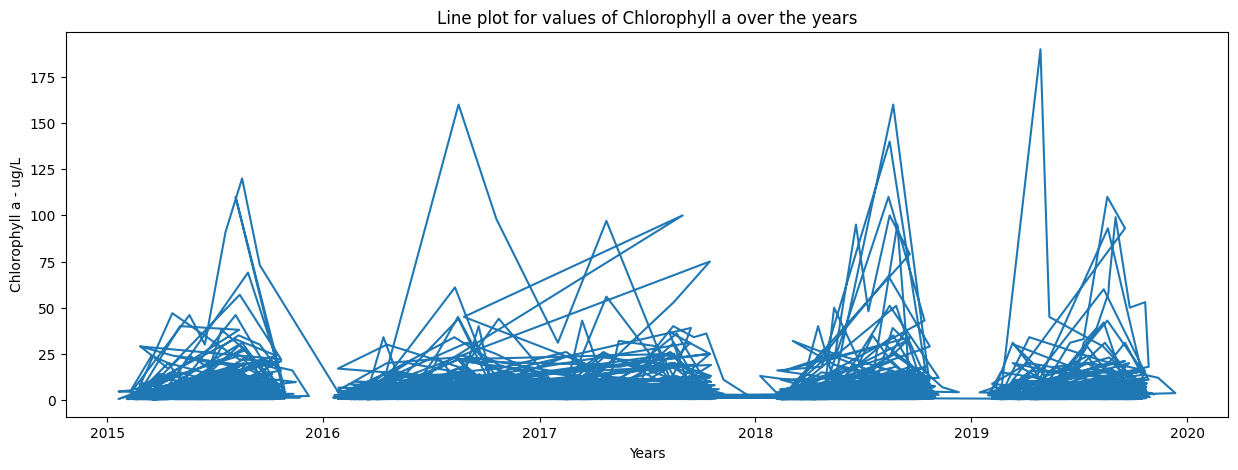

In [96]:
# Plot the values for Chlorophyll
plot_data(chlorophyll)

In [97]:
chlorophyll.describe()

ObservedValue
count     2,640.0000
mean          6.2153
std          12.2730
min           0.4000
25%           1.5000
50%           2.9000
75%           5.6000
max         190.0000

Examining the plot, it's clear that the **Chlorophyll a** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Chlorophyll a** into classes with the following ranges:

1. High: Above 300 mg/L
2. Medium: Between 150 and 300 mg/L
3. Low: Below 150 mg/L


No errors for **Chlorophyll**

#### **Merging Data**

Now that we have individual dataframes for each chemical element, we will consolidate all values into one dataframe, grouping them by location and the date they were measured. With each element having its own dataframe, we can modify the columns of 'Observed Value' to the respective 'Property Label' it refers to, along with its measured metric.


In [98]:
# Rename Observed Value to Ammonium
ammonium = rename_observed_value(ammonium, 'Ammonium')
# Drop the extra columns
ammonium = clean_df(ammonium)
ammonium.head()

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L
3292216  SE662925-154156       2012-08-09         0.0330
4935035  SE627500-151900       2008-08-12         0.0080
4935915  SE627500-151900       2012-04-20         0.0050
4938142  SE637654-150206       2010-04-13         0.1540
4938152  SE642900-144100       2009-09-08         0.0060

In [99]:
# Rename Observed Value to Nitrate
nitrate = rename_observed_value(nitrate, 'Nitrate')
# Drop the extra columns
nitrate = clean_df(nitrate)
nitrate.head()

MonitoringSiteID TimeSamplingDate  Nitrate-mg/L
3292214  SE662925-154156       2010-05-12        0.0040
3292215  SE662925-154156       2011-09-05        0.0040
3353863       SE40000_60       2012-11-29        1.3197
3353865       SE40000_67       2012-11-29        5.7572
3364228  SE658709-154912       2010-05-06       10.0970

In [100]:
# Rename Observed Value to Dissolved Oxygen
dissolved_oxygen = rename_observed_value(dissolved_oxygen, 'DissolvedOxygen')
# Drop the extra column
dissolved_oxygen = clean_df(dissolved_oxygen)
dissolved_oxygen.head()

MonitoringSiteID TimeSamplingDate  DissolvedOxygen-mg/L
4938147  SE637654-150206       2010-04-13                0.3200
4945876  SE661093-139154       2007-08-22                8.8000
4945877  SE661093-139154       2010-08-09                6.6900
4953581  SE662925-154156       2010-05-12                2.0700
4953582  SE662925-154156       2010-09-02                1.9200

In [101]:
# Rename Observed Value to Total Nitrogen
total_nitrogen = rename_observed_value(total_nitrogen, 'TotalNitrogen')
# Drop extra columns
total_nitrogen = clean_df(total_nitrogen)
total_nitrogen.head()

MonitoringSiteID TimeSamplingDate  TotalNitrogen-mg/L
3353864       SE40000_63       2012-11-28              1.5900
4935028  SE622700-136100       2011-08-19              1.2970
4935029  SE622700-136100       2012-08-16              1.2850
4940345  SE642900-144100       2009-04-14              2.0090
4940346  SE642900-144100       2011-04-07              1.8200

In [102]:
# Rename Observed Value to Total Phosphorus
total_phosphorus = rename_observed_value(total_phosphorus, 'TotalPhosphorus')
# Drop extra columns
total_phosphorus = clean_df(total_phosphorus)
total_phosphorus.head()

MonitoringSiteID TimeSamplingDate  TotalPhosphorus-mg/L
16479040  SE693100-140600       2013-08-29                0.0060
16479070  SE693400-150200       2013-06-12                0.0010
16479092  SE693400-150200       2013-08-14                0.0050
16479119  SE702300-139100       2013-06-11                0.0010
16480266  SE702300-139100       2013-08-28                0.0010

In [103]:
# Renam Observer Value to Phosphate
phosphate = rename_observed_value(phosphate, 'Phosphate')
# Drop extra columns
phosphate = clean_df(phosphate)
phosphate.head()

MonitoringSiteID TimeSamplingDate  Phosphate-mg/L
16479063  SE693100-140600       2013-08-29          0.0069
16479083  SE693400-150200       2013-06-12          0.0039
16479112  SE693400-150200       2013-08-14          0.0029
16479132  SE702300-139100       2013-06-11          0.0029
16480286  SE702300-139100       2013-08-28          0.0020

In [104]:
# Rename Observed Value to Chlorphyll a
chlorophyll = rename_observed_value(chlorophyll, 'Chlorophyll')
# Drop extra columns
chlorophyll = clean_df(chlorophyll)
chlorophyll.head()

MonitoringSiteID TimeSamplingDate  Chlorophyll-mg/L
26988971  SE615375-137087       2015-02-26           29.0000
26988972  SE615375-137087       2015-04-14           17.0000
26988973  SE615375-137087       2015-08-13           57.0000
26988974  SE615375-137087       2015-10-22           22.0000
26988975  SE617797-135339       2015-02-26           29.0000

In [105]:
# Merge the data for Sweden
df_SW = merge_data()
# Check shape of the newly merged data
df_SW.shape

(15183887, 9)

The final shape for the Sweden Data is 15 183 887 rows and 9 columns

### 1.2.3 Create Custom Dataset for Estonia Data and Deal with Errors

Finally, we are going to select the rows that contain measured values for the chosen chemical elements. Then, we will merge all of them together into one dataframe, grouped by measuring location, time, and the name of the chemical element, respectively. Additionally, we will drop all the values that we identify as human errors and sensor malfunctions.

#### **Ammonium**

In [106]:
# Locateing the rows that contain values for Ammonium
ammonium = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Ammonium']
ammonium

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3056584           EE12356              Ammonium      mg{NH4}/L   
3056594       EE1254_9463              Ammonium      mg{NH4}/L   
3056595       EE1254_9463              Ammonium      mg{NH4}/L   
3056596       EE1254_9463              Ammonium      mg{NH4}/L   
3056597       EE1254_9463              Ammonium      mg{NH4}/L   
...                   ...                   ...            ...   
51313220     EESJA9721000              Ammonium      mg{NH4}/L   
51313221     EESJA2616000              Ammonium      mg{NH4}/L   
51313222     EESJA1268000              Ammonium      mg{NH4}/L   
51321701            EE158              Ammonium      mg{NH4}/L   
51321702            EE158              Ammonium      mg{NH4}/L   

         TimeSamplingDate  ObservedValue  
3056584        2012-07-08         0.2000  
3056594        1976-08-20         0.1000  
3056595        1979-10-11         0.1000  
3056596        1983-04-28         0.5000  
3056597        1984-08-28         0.1000  
...                   ...            ...  
51313220       2015-10-13         0.0700  
51313221       2015-09-30         0.0700  
51313222       2015-09-22         0.0700  
51321701       2013-07-24         0.6800  
51321702       2014-10-28         0.7700  

[26397 rows x 5 columns]

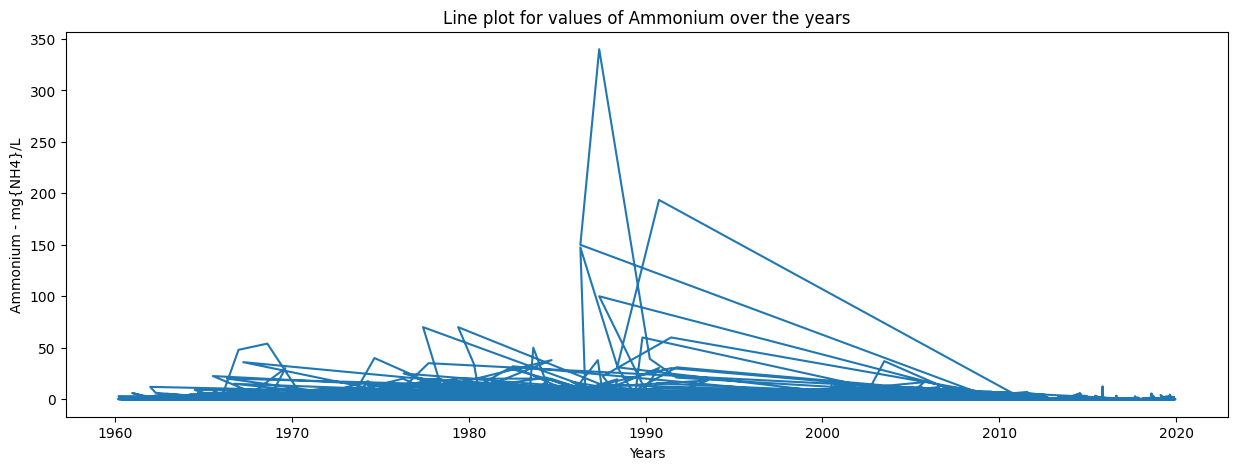

In [107]:
# Plot the values for Ammonium
plot_data(ammonium)

In [108]:
ammonium.describe()

ObservedValue
count    26,397.0000
mean          0.3538
std           3.2221
min           0.0000
25%           0.0500
50%           0.0700
75%           0.1500
max         340.0000

From the plot, it's evident that the **Ammonium** data is unevenly distributed and contains numerous outliers, which will be addressed later. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Ammonium** into classes with the following ranges:

1. High: Above 35 mg/L
2. Medium: Between 17.5 and 35 mg/L
3. Low: Below 17.5 mg/L

No error values for **Ammonium**

#### **Nitrate**

In [109]:
# Locateing the rows that contain values for Nitrate
nitrate = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Nitrate']
nitrate.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3056587      EE1254_9463               Nitrate      mg{NO3}/L   
3056588      EE1254_9463               Nitrate      mg{NO3}/L   
3056589      EE1254_9463               Nitrate      mg{NO3}/L   
3056590      EE1254_9463               Nitrate      mg{NO3}/L   
3056599      EE1257_8864               Nitrate      mg{NO3}/L   

        TimeSamplingDate  ObservedValue  
3056587       1977-04-11         0.4000  
3056588       1978-09-07         2.0000  
3056589       1982-04-20         0.4000  
3056590       1984-04-18         0.4000  
3056599       1982-04-20        30.0000

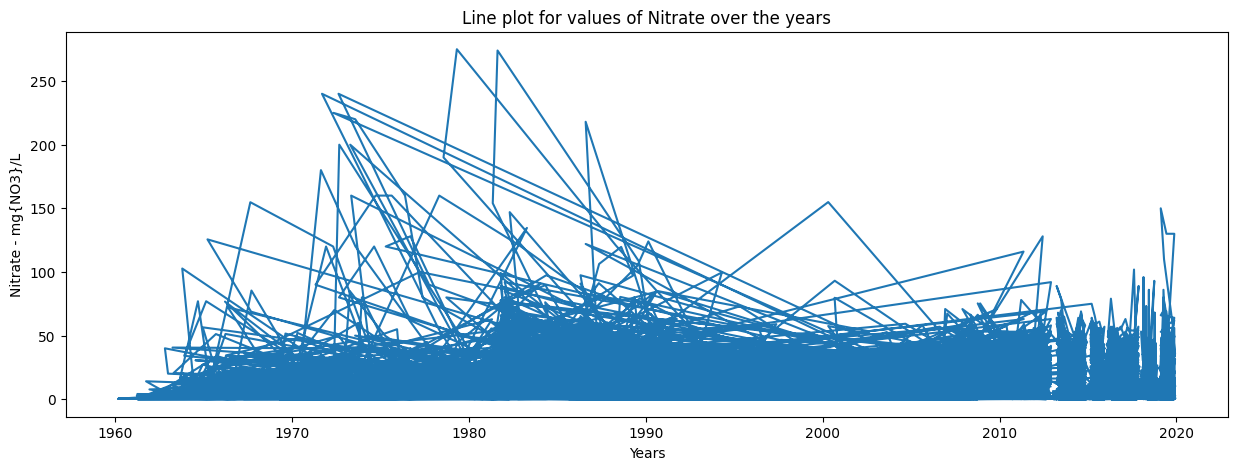

In [110]:
# Plot the values for Nitrate
plot_data(nitrate)

In [111]:
nitrate.describe()

ObservedValue
count    26,206.0000
mean          6.3077
std          13.2854
min           0.0050
25%           0.4000
50%           0.4000
75%           5.0000
max         275.0000

From the plot, we observe that the **Nitrate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Nitrate** into classes with the following ranges:

1. High: Above 50 mg/L
2. Medium: Between 25 and 50 mg/L
3. Low: Below 25 mg/L


No error values for **Nitrate**

#### **Dissolved Oxygen**

In [112]:
# Locateing the rows that contain values for Dissolved Oxygen
dissolved_oxygen = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Dissolved oxygen']
dissolved_oxygen.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
3059421          EE12597      Dissolved oxygen           mg/L   
3073689           EE1146      Dissolved oxygen           mg/L   
3088081           EE5191      Dissolved oxygen           mg/L   
3094784           EE5436      Dissolved oxygen           mg/L   
3103703           EE9418      Dissolved oxygen           mg/L   

        TimeSamplingDate  ObservedValue  
3059421       2008-09-30         0.0800  
3073689       2006-08-18         0.0200  
3088081       2008-07-29         0.3400  
3094784       2008-08-14         1.0900  
3103703       2006-08-28         0.2400

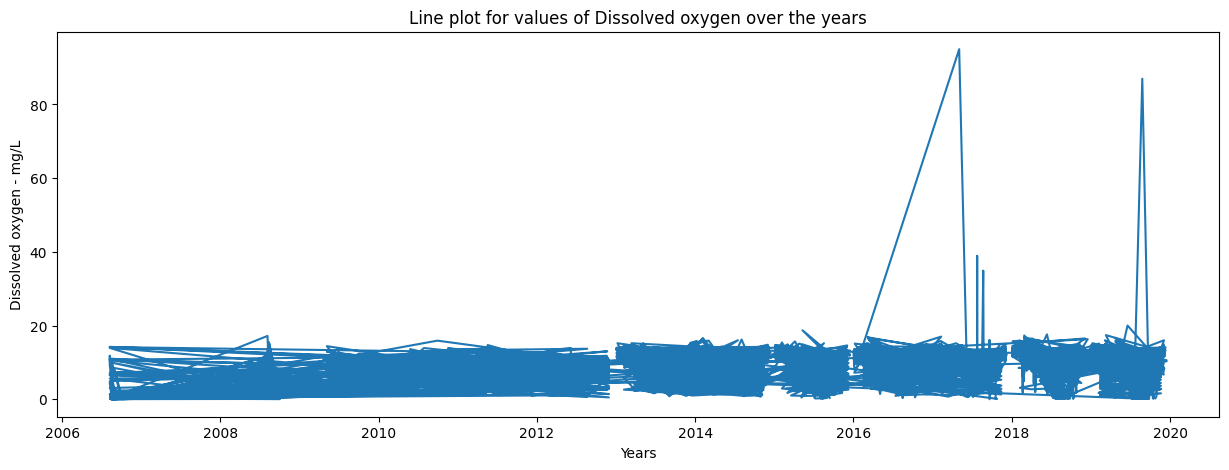

In [113]:
# Plot values for Dissolved Oxygen
plot_data(dissolved_oxygen)

In [114]:
dissolved_oxygen.describe()

ObservedValue
count     8,055.0000
mean          8.6562
std           3.8960
min           0.0000
25%           6.9000
50%           9.2000
75%          11.2000
max          95.0000

Examining the plot, it's apparent that the **Dissolved Oxygen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. For error handling, values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors.

To further refine the data, we will categorize **Dissolved Oxygen** into classes with the following ranges:

1. High: Above 10 mg/L
2. Medium: Between 8 and 6 mg/L
3. Low: Below 4 mg/L and above 10 mg/L


No error values for **Dissolved Oxygen**

#### **Total Nitrogen**

In [115]:
# Locateing the rows that contain values for Total Nitrogen
total_nitrogen = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Total nitrogen']
total_nitrogen.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20099490     EESJA0301000        Total nitrogen        mg{N}/L   
20099491     EESJA0301000        Total nitrogen        mg{N}/L   
20099492     EESJA0301000        Total nitrogen        mg{N}/L   
20099493     EESJA0301000        Total nitrogen        mg{N}/L   
20099494     EESJA0301000        Total nitrogen        mg{N}/L   

         TimeSamplingDate  ObservedValue  
20099490       2013-02-06         3.8000  
20099491       2013-04-03         3.0000  
20099492       2013-06-05         2.5000  
20099493       2013-08-05         2.1000  
20099494       2013-10-03         1.7000

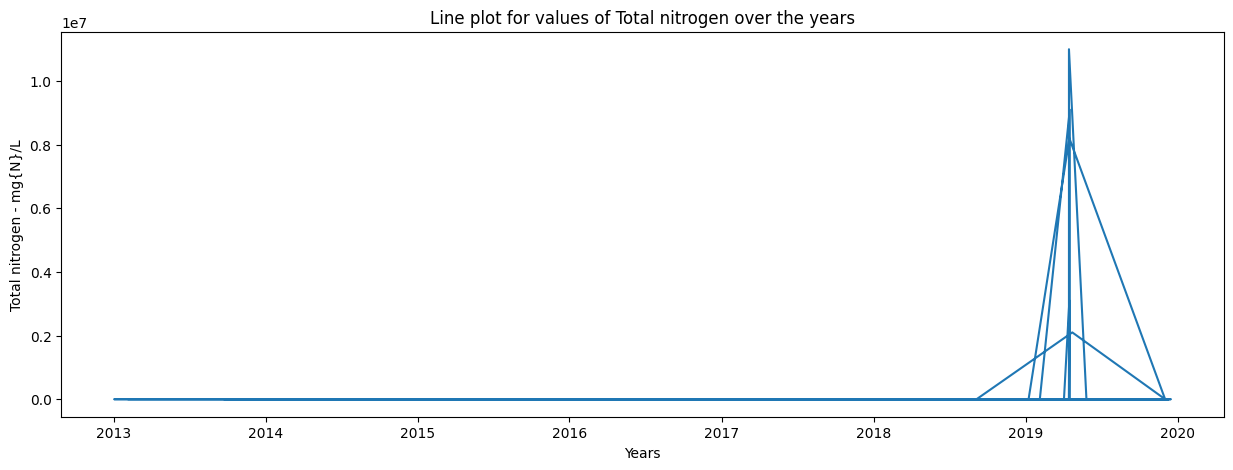

In [116]:
# Plot values for Total Nitrogen
plot_data(total_nitrogen)

In [117]:
total_nitrogen.describe()

ObservedValue
count      5,296.0000
mean       6,327.4506
std      231,942.9638
min            0.1100
25%            0.7300
50%            1.3000
75%            2.5000
max   11,000,000.0000

Examining the plot, it's evident that the **Total Nitrogen** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Nitrogen** into classes with the following ranges:
1. High: Above 2 mg/L
2. Medium: Between 0.9 and 2 mg/L
3. Low: Below 0.9 mg/L


In [118]:
# Check which observed values are above 1000
errors = total_nitrogen.loc[total_nitrogen['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
45630421     EESJA2741000        Total nitrogen          ug/kg   
45684336     EESJA9900000        Total nitrogen          ug/kg   
45712659     EESJA0476000        Total nitrogen          ug/kg   
50818378     EESJA2145000        Total nitrogen          ug/kg   
50819467     EESJA1971000        Total nitrogen          ug/kg   

         TimeSamplingDate   ObservedValue  
45630421       2019-04-17  9,100,000.0000  
45684336       2019-04-23  2,100,000.0000  
45712659       2019-04-16  8,200,000.0000  
50818378       2019-04-15 11,000,000.0000  
50819467       2019-04-16  3,100,000.0000

In [119]:
# Drop the values that are higher then 1000
total_nitrogen = drop_errors(total_nitrogen)
total_nitrogen

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20099490     EESJA0301000        Total nitrogen        mg{N}/L   
20099491     EESJA0301000        Total nitrogen        mg{N}/L   
20099492     EESJA0301000        Total nitrogen        mg{N}/L   
20099493     EESJA0301000        Total nitrogen        mg{N}/L   
20099494     EESJA0301000        Total nitrogen        mg{N}/L   
...                   ...                   ...            ...   
51244379     EESJA6896000        Total nitrogen        mg{N}/L   
51244380     EESJA6896000        Total nitrogen        mg{N}/L   
51246738     EESJA9087000        Total nitrogen        mg{N}/L   
51312627     EESJB1560000        Total nitrogen        mg{N}/L   
51313176     EESJB1564000        Total nitrogen        mg{N}/L   

         TimeSamplingDate  ObservedValue  
20099490       2013-02-06         3.8000  
20099491       2013-04-03         3.0000  
20099492       2013-06-05         2.5000  
20099493       2013-08-05         2.1000  
20099494       2013-10-03         1.7000  
...                   ...            ...  
51244379       2014-10-08         2.0200  
51244380       2014-12-08         2.6900  
51246738       2014-11-05         1.3000  
51312627       2015-08-18         1.2000  
51313176       2015-08-18         0.5900  

[5291 rows x 5 columns]

In [120]:
total_nitrogen.describe()

ObservedValue
count     5,291.0000
mean          1.9238
std           4.9665
min           0.1100
25%           0.7300
50%           1.3000
75%           2.5000
max         341.0000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Phosphate**

In [121]:
# Locateing the rows that contain values for Phosphate
phosphate = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Phosphate']
phosphate.head()


MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20099502     EESJA0307000             Phosphate        mg{P}/L   
20099503     EESJA0307000             Phosphate        mg{P}/L   
20099504     EESJA0307000             Phosphate        mg{P}/L   
20099505     EESJA0307000             Phosphate        mg{P}/L   
20100216     EESJA0430000             Phosphate        mg{P}/L   

         TimeSamplingDate  ObservedValue  
20099502       2014-05-09         0.0070  
20099503       2014-07-03         0.0330  
20099504       2014-09-09         0.0270  
20099505       2014-11-13         0.0090  
20100216       2013-02-06         0.0370

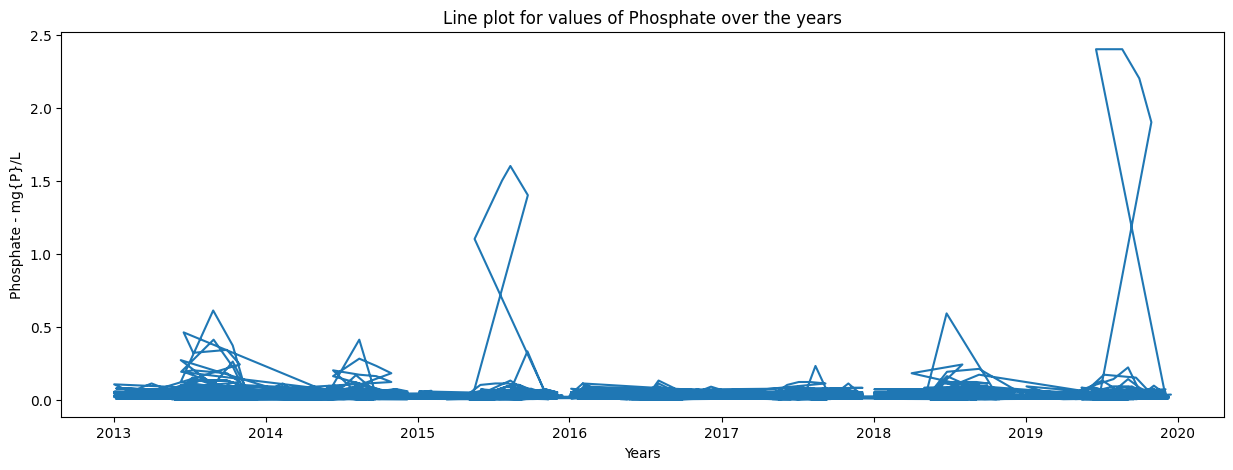

In [122]:
# Plot the values for Phosphate
plot_data(phosphate)

In [123]:
phosphate.describe()

ObservedValue
count     5,138.0000
mean          0.0250
std           0.0783
min           0.0020
25%           0.0080
50%           0.0160
75%           0.0270
max           2.4000

Examining the plot, it's clear that the **Phosphate** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Phosphate**, into classes with the following ranges:
1. High: Above 0.35 mg/L
2. Medium: Between 0.075 and 0.35 mg/L
3. Low: Below 0.075 mg/L

No errors for **Phosphate**

#### **Total Phosporus**

In [124]:
# Locateing the rows that contain values for Total Phospohorus
total_phosphorus  = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Total phosphorus']
total_phosphorus.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20098786     EESJA0301000      Total phosphorus        mg{P}/L   
20098787     EESJA0301000      Total phosphorus        mg{P}/L   
20098788     EESJA0301000      Total phosphorus        mg{P}/L   
20098789     EESJA0301000      Total phosphorus        mg{P}/L   
20098790     EESJA0301000      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
20098786       2013-02-06         0.0250  
20098787       2013-04-03         0.0260  
20098788       2013-06-05         0.0390  
20098789       2013-08-05         0.0220  
20098790       2013-10-03         0.0210

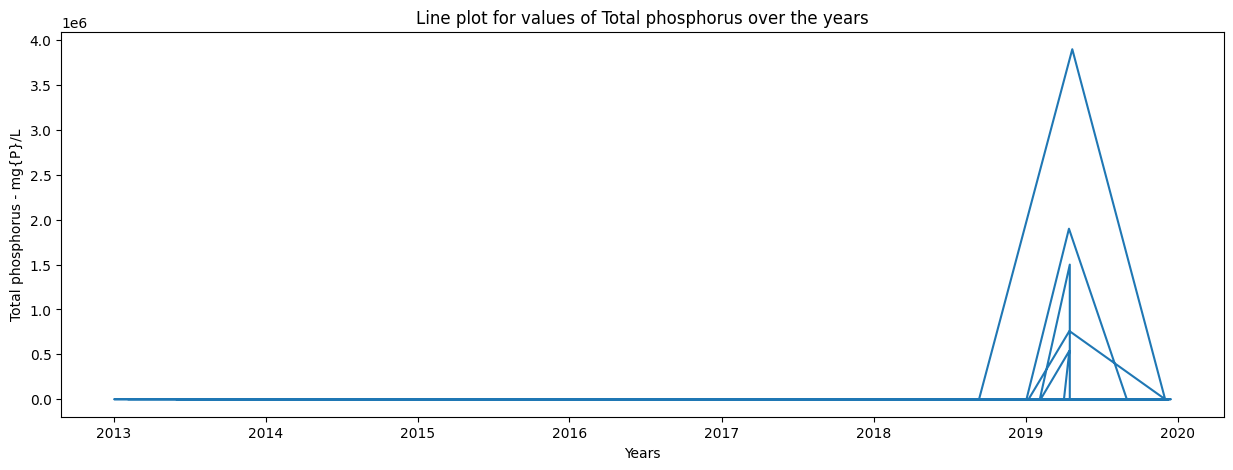

In [125]:
# Plot the values for Total Phousphorus
plot_data(total_phosphorus)

In [126]:
total_phosphorus.describe()

ObservedValue
count     5,299.0000
mean      1,622.9960
std      64,330.3951
min           0.0050
25%           0.0250
50%           0.0375
75%           0.0540
max   3,900,000.0000

Examining the plot, it's apparent that the **Total Phosphorus** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Total Phosphorus** into classes with the following ranges:

1. High: Above 0.7 mg/L
2. Medium: Between 0.35 and 0.7 mg/L
3. Low: Below 0.35 mg/L


In [127]:
# Check which observed values are above 1000
errors = total_phosphorus.loc[total_phosphorus['ObservedValue'] > 1000]
errors

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
45630419     EESJA2741000      Total phosphorus          ug/kg   
45684449     EESJA9900000      Total phosphorus          ug/kg   
45696643     EESJA2145000      Total phosphorus          ug/kg   
45712658     EESJA0476000      Total phosphorus          ug/kg   
50819466     EESJA1971000      Total phosphorus          ug/kg   

         TimeSamplingDate  ObservedValue  
45630419       2019-04-17 1,500,000.0000  
45684449       2019-04-23 3,900,000.0000  
45696643       2019-04-15 1,900,000.0000  
45712658       2019-04-16   760,000.0000  
50819466       2019-04-16   540,000.0000

In [128]:
# Drop the values that are higher then 1000
total_phosphorus = drop_errors(total_phosphorus)
total_phosphorus

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20098786     EESJA0301000      Total phosphorus        mg{P}/L   
20098787     EESJA0301000      Total phosphorus        mg{P}/L   
20098788     EESJA0301000      Total phosphorus        mg{P}/L   
20098789     EESJA0301000      Total phosphorus        mg{P}/L   
20098790     EESJA0301000      Total phosphorus        mg{P}/L   
...                   ...                   ...            ...   
51247483     EESJA9950000      Total phosphorus        mg{P}/L   
51247484     EESJA9950000      Total phosphorus        mg{P}/L   
51251434     EESJA8634000      Total phosphorus        mg{P}/L   
51251435     EESJA8634000      Total phosphorus        mg{P}/L   
51312633     EESJB1561000      Total phosphorus        mg{P}/L   

         TimeSamplingDate  ObservedValue  
20098786       2013-02-06         0.0250  
20098787       2013-04-03         0.0260  
20098788       2013-06-05         0.0390  
20098789       2013-08-05         0.0220  
20098790       2013-10-03         0.0210  
...                   ...            ...  
51247483       2013-10-15         0.0230  
51247484       2013-11-19         0.0290  
51251434       2015-05-18         0.0240  
51251435       2015-09-10         0.0120  
51312633       2015-08-18         0.0750  

[5294 rows x 5 columns]

In [129]:
total_phosphorus.describe()

ObservedValue
count     5,294.0000
mean          0.0483
std           0.0840
min           0.0050
25%           0.0250
50%           0.0370
75%           0.0540
max           2.5000

After dropping the errors, we observe that the `mean` and `std` are now closer together. This indicates a reduction in the impact of extreme values on the central tendency and dispersion of the data.


#### **Chlorophyll a**

In [130]:
# Locateing the rows that contain values for Chlorophyll a
chlorophyll = location_ES.loc[location_ES['ObservedPropertyLabel'] == 'Chlorophyll a']
chlorophyll.head()

MonitoringSiteID ObservedPropertyLabel MeasuredMetric  \
20111349     EESJA4328000         Chlorophyll a           ug/L   
20111350     EESJA4328000         Chlorophyll a           ug/L   
20111351     EESJA4328000         Chlorophyll a           ug/L   
20111352     EESJA4328000         Chlorophyll a           ug/L   
20111353     EESJA4328000         Chlorophyll a           ug/L   

         TimeSamplingDate  ObservedValue  
20111349       2013-05-16        15.5000  
20111350       2013-06-20        17.4000  
20111351       2013-07-18        12.9000  
20111352       2013-08-19        13.6000  
20111353       2013-09-16        21.3000

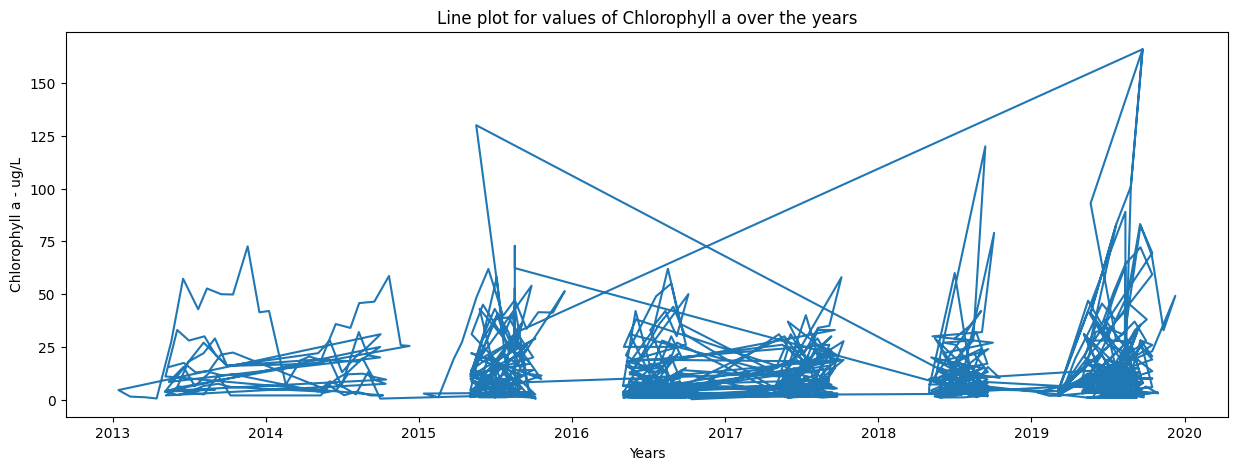

In [131]:
# Plot the values for chlorophyll
plot_data(chlorophyll)

In [132]:
chlorophyll.describe()

ObservedValue
count       866.0000
mean         15.5718
std          18.0740
min           0.2000
25%           3.9000
50%           9.3000
75%          21.2250
max         166.0000

Examining the plot, it's clear that the **Chlorophyll a** data is unevenly distributed and contains outliers, which will be addressed in subsequent steps. Values above 1000 mg/L will be considered as potential instances of device malfunctioning or human errors during error handling.

To further refine the data, we will categorize **Chlorophyll a** into classes with the following ranges:

1. High: Above 300 mg/L
2. Medium: Between 150 and 300 mg/L
3. Low: Below 150 mg/L


No errors fro **Chlorophyll**

#### **Merging Data**

Now that we have individual dataframes for each chemical element, we will consolidate all values into one dataframe, grouping them by location and the date they were measured. With each element having its own dataframe, we can modify the columns of 'Observed Value' to the respective 'Property Label' it refers to, along with its measured metric.

In [133]:
# Rename Observed Value to Ammonium
ammonium = rename_observed_value(ammonium, 'Ammonium')
# Drop the extra columns
ammonium = clean_df(ammonium)
ammonium.head()

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L
3056584          EE12356       2012-07-08         0.2000
3056594      EE1254_9463       1976-08-20         0.1000
3056595      EE1254_9463       1979-10-11         0.1000
3056596      EE1254_9463       1983-04-28         0.5000
3056597      EE1254_9463       1984-08-28         0.1000

In [134]:
# Rename Observed Value to Nitrate
nitrate = rename_observed_value(nitrate, 'Nitrate')
# Drop the extra columns we will not use
nitrate = clean_df(nitrate)
nitrate.head()

MonitoringSiteID TimeSamplingDate  Nitrate-mg/L
3056587      EE1254_9463       1977-04-11        0.4000
3056588      EE1254_9463       1978-09-07        2.0000
3056589      EE1254_9463       1982-04-20        0.4000
3056590      EE1254_9463       1984-04-18        0.4000
3056599      EE1257_8864       1982-04-20       30.0000

In [135]:
# Rename Observed Value to Dissolved Oxygen
dissolved_oxygen = rename_observed_value(dissolved_oxygen, 'DissolvedOxygen')
# Drop the extra columns we will not use
dissolved_oxygen = clean_df(dissolved_oxygen)
dissolved_oxygen.head()

MonitoringSiteID TimeSamplingDate  DissolvedOxygen-mg/L
3059421          EE12597       2008-09-30                0.0800
3073689           EE1146       2006-08-18                0.0200
3088081           EE5191       2008-07-29                0.3400
3094784           EE5436       2008-08-14                1.0900
3103703           EE9418       2006-08-28                0.2400

In [136]:
# Rename Observed Value to Total Nitrogen
total_nitrogen = rename_observed_value(total_nitrogen, 'TotalNitrogen')
# Drop the extra columns
total_nitrogen = clean_df(total_nitrogen)
total_nitrogen.head()

MonitoringSiteID TimeSamplingDate  TotalNitrogen-mg/L
20099490     EESJA0301000       2013-02-06              3.8000
20099491     EESJA0301000       2013-04-03              3.0000
20099492     EESJA0301000       2013-06-05              2.5000
20099493     EESJA0301000       2013-08-05              2.1000
20099494     EESJA0301000       2013-10-03              1.7000

In [137]:
# Rename Observed Value to Phosphate
phosphate = rename_observed_value(phosphate, 'Phosphate')
# Drop the e4xtra column we will not use
phosphate = clean_df(phosphate)
phosphate.head()

MonitoringSiteID TimeSamplingDate  Phosphate-mg/L
20099502     EESJA0307000       2014-05-09          0.0070
20099503     EESJA0307000       2014-07-03          0.0330
20099504     EESJA0307000       2014-09-09          0.0270
20099505     EESJA0307000       2014-11-13          0.0090
20100216     EESJA0430000       2013-02-06          0.0370

In [138]:
# Rename Observed Value to Total Phosphorus
total_phosphorus = rename_observed_value(total_phosphorus, 'TotalPhosphorus' )
# Drop the extra columns we will not use anymore
total_phosphorus = clean_df(total_phosphorus)
total_phosphorus.head()

MonitoringSiteID TimeSamplingDate  TotalPhosphorus-mg/L
20098786     EESJA0301000       2013-02-06                0.0250
20098787     EESJA0301000       2013-04-03                0.0260
20098788     EESJA0301000       2013-06-05                0.0390
20098789     EESJA0301000       2013-08-05                0.0220
20098790     EESJA0301000       2013-10-03                0.0210

In [139]:
# Rename Observed Value for Chlorophyll a
chlorophyll = rename_observed_value(chlorophyll, 'Chlorophyll')
# Drop the extra columns we will not use anymore
chlorophyll = clean_df(chlorophyll)
chlorophyll.head()

MonitoringSiteID TimeSamplingDate  Chlorophyll-mg/L
20111349     EESJA4328000       2013-05-16           15.5000
20111350     EESJA4328000       2013-06-20           17.4000
20111351     EESJA4328000       2013-07-18           12.9000
20111352     EESJA4328000       2013-08-19           13.6000
20111353     EESJA4328000       2013-09-16           21.3000

In [140]:
# Merge the data for Estonia
df_ES = merge_data()
# Check shape of the newly merged data
df_ES.shape

(26781, 9)

# Step 2 - Data Preprocessing

In the second step, we will address the outliers identified in the previous step. Next, we will calculate the Water Quality Index (WQI) using assigned weights for the parameters, create the target variable, and finally, scale the data to ensure non-dominant values.

1. Handling Outliers:
- We will implement strategies to handle outliers detected in the exploratory data analysis phase, ensuring a more robust dataset for further analysis.

2. Calculating Water Quality Index (WQI)

- Utilizing assigned weights for the parameters, we will calculate the Water Quality Index (WQI), providing a comprehensive measure of water quality based on multiple factors.

- We will define the target variable based on the calculated WQI, categorizing water quality into different classes for effective analysis.

3. Data Scaling

- To ensure balanced contributions from all parameters, we will scale the data, mitigating the impact of dominant values and fostering a more equitable analysis environment.


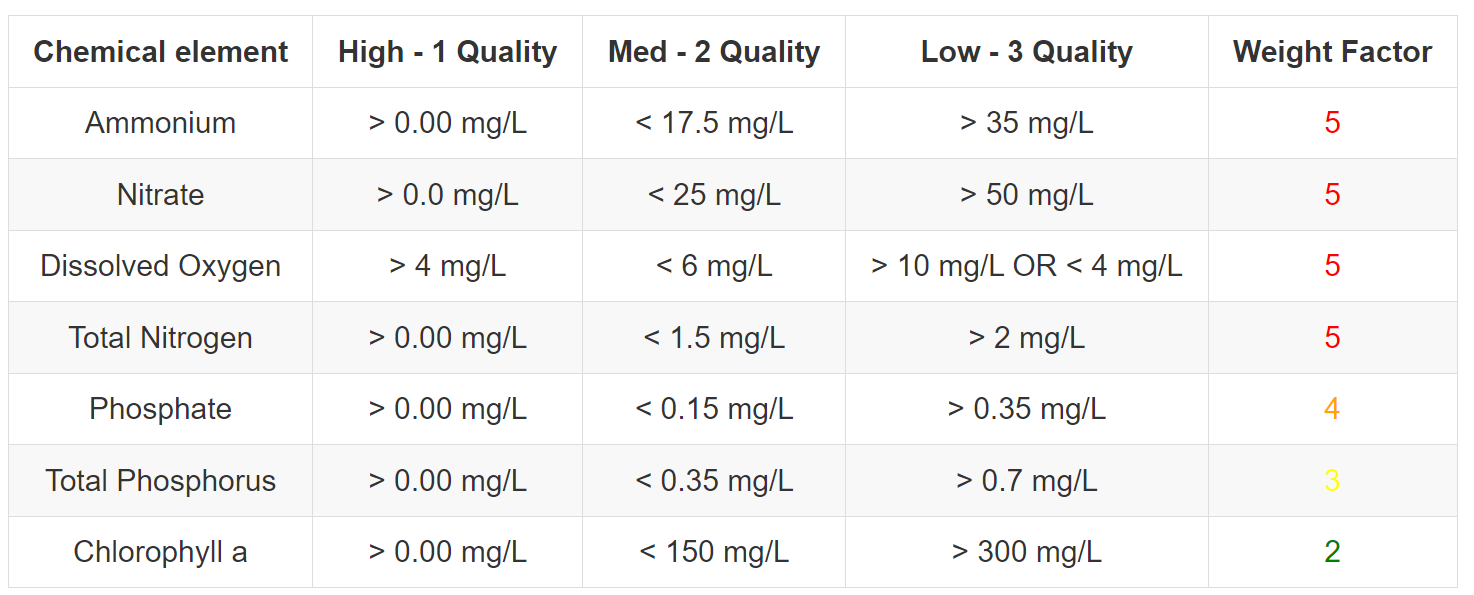

## 2.1 Deal with Duplicate, NaN, and Outliers

Since we have created three different datasets, it's important to handle missing values consistently across all of them. The following approach will be taken:


1. **Handle Duplicated Values:**
   - Check for and remove any duplicated rows to ensure data integrity.

2. **Drop Rows with Missing Values:**
   - Remove rows where three or more elements are missing.

2. **Fill Missing Values:**
   - Fill the remaining missing values with the median value of their respective columns.


This step ensures uniformity in handling missing data and duplicates across the three datasets.


### 2.1.1 Italy's dataframe

In [141]:
def data_info(df):
    """
    Quick function to display information about missing values and data types.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze. (Note: No parameters for this function.)

    Returns:
    pd.DataFrame: A DataFrame containing information about null values, data types, and total counts.
    """
    null_data = pd.DataFrame(df.isnull().sum(), columns=['Null_Values'])
    type_data = pd.DataFrame(df.dtypes, columns=['Data_Type'])
    len_data = pd.DataFrame(df.count(), columns=['Total'])
    data = pd.concat([null_data, type_data, len_data], axis=1)
    return data

In [142]:
data_info(df_IT)

Null_Values       Data_Type     Total
MonitoringSiteID                0          object  17871407
TimeSamplingDate                0  datetime64[ns]  17871407
Ammonium-mg/L              295893         float64  17575514
Nitrate-mg/L               120772         float64  17750635
DissolvedOxygen-mg/L        82465         float64  17788942
TotalNitrogen-mg/L         297758         float64  17573649
Phosphate-mg/L              84877         float64  17786530
TotalPhosphorus-mg/L        78337         float64  17793070
Chlorophyll-mg/L          3792459         float64  14078948

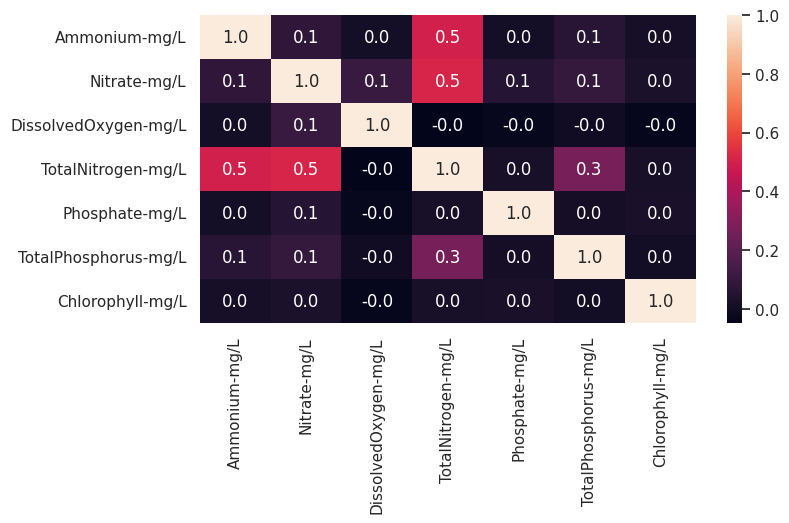

In [143]:
# Correlation matrix to see how the data is correlated
corr_IT_raw = df_IT.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_IT_raw, annot=True, fmt='.1f')
plt.show()

The positive correlations between **Ammonium** and **Total Nitrogen (0.5)** and **Nitrate** and **Total Nitrogen (0.5)** suggest that as one variable increases, the other tends to increase too. This makes sense chemically as **Ammonium** and **Nitrate** are nitrogen compounds found in water, and **Total Nitrogen** includes them. The strong positive correlation indicates higher **Ammonium** and **Nitrate** concentrations contribute to increased **Total Nitrogen**. These correlations might indicate nitrogen pollution sources like agriculture or wastewater, but further analysis is needed for definitive conclusions.

#### Deal with Duplicated Values

In [144]:
# Count all duplicated rows
df_IT.duplicated(keep=False).sum()

16720120

In [145]:
# Drop the duplicated rows
df_IT = df_IT.drop_duplicates(ignore_index=True)
df_IT

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
0             IT12-L5_70       2016-05-20        80.0000        0.0600   
1             IT12-L5_70       2016-05-20        80.0000        0.0600   
2             IT12-L5_70       2016-05-20        80.0000        0.0600   
3             IT12-L5_70       2016-05-20        80.0000        0.0200   
4             IT12-L5_70       2016-05-20        80.0000        0.0200   
...                  ...              ...            ...           ...   
2397655          IT05348       2019-08-19            NaN           NaN   
2397656          IT05349       2019-08-19            NaN           NaN   
2397657          IT05369       2019-01-15            NaN           NaN   
2397658          IT05371       2019-01-15            NaN           NaN   
2397659         IT10PIE9       2015-08-21            NaN           NaN   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
0                         NaN                 NaN             NaN   
1                         NaN                 NaN             NaN   
2                         NaN                 NaN             NaN   
3                         NaN                 NaN             NaN   
4                         NaN                 NaN             NaN   
...                       ...                 ...             ...   
2397655                   NaN                 NaN             NaN   
2397656                   NaN                 NaN             NaN   
2397657                   NaN                 NaN             NaN   
2397658                   NaN                 NaN             NaN   
2397659                   NaN                 NaN             NaN   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
0                      0.0050            0.5000  
1                      0.0050            1.8000  
2                      0.0050            0.2000  
3                      0.0050            0.5000  
4                      0.0050            1.8000  
...                       ...               ...  
2397655                   NaN            4.5000  
2397656                   NaN           11.5300  
2397657                   NaN            1.2000  
2397658                   NaN            1.4700  
2397659                   NaN          285.0000  

[2397660 rows x 9 columns]

In [146]:
data_info(df_IT)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  2397660
TimeSamplingDate                0  datetime64[ns]  2397660
Ammonium-mg/L               36113         float64  2361547
Nitrate-mg/L                26658         float64  2371002
DissolvedOxygen-mg/L        49279         float64  2348381
TotalNitrogen-mg/L          67792         float64  2329868
Phosphate-mg/L              55094         float64  2342566
TotalPhosphorus-mg/L        59018         float64  2338642
Chlorophyll-mg/L           171734         float64  2225926

After removing duplicate values, the dataset contains 2,397,660 rows. The next steps involve addressing missing values and handling outliers. The process includes:

1. Handle Missing Values

- **Drop High-Weight Factor Features:** Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.

- **Fill NaN Values:** Fill the remaining missing values with the median value of the respective columns.

2. Deal with Outliers

- **Calculate classes** After addressing missing values and ensuring the data's integrity, the next step is to deal with outliers. One approach is to categorize the numerical values into classes. Each feature will be transformed into classes, and these classes will be utilized in further analysis, such as calculating the Water Quality Index (WQI).

These steps aim to ensure data integrity and prepare the dataset for subsequent analysis.

#### Handle Missing Values

In [147]:
# Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.
df_IT = df_IT.dropna(subset=['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L','TotalNitrogen-mg/L'],
                     thresh=3)
data_info(df_IT)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  2342490
TimeSamplingDate                0  datetime64[ns]  2342490
Ammonium-mg/L                4515         float64  2337975
Nitrate-mg/L                  874         float64  2341616
DissolvedOxygen-mg/L        11768         float64  2330722
TotalNitrogen-mg/L          23365         float64  2319125
Phosphate-mg/L              14827         float64  2327663
TotalPhosphorus-mg/L        18145         float64  2324345
Chlorophyll-mg/L           125404         float64  2217086

- Next after droping the rows where the most of the high factor features were missing, we going to check for other missing values in the dataframe for Italy and fill them with the median values for their chemical elements respectivly.

In [148]:
df_IT.describe()

Ammonium-mg/L   Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count 2,337,975.0000 2,341,616.0000        2,330,722.0000      2,319,125.0000   
mean          0.3443         1.6246                6.4646              0.8853   
std           8.9033         3.5040                5.6893              2.4884   
min           0.0000         0.0002                0.0000              0.0001   
25%           0.0090         0.1505                3.9501              0.4320   
50%           0.0171         0.8568                6.9000              0.7130   
75%           0.0514         2.8509                8.9000              1.0770   
max       1,000.0000       753.0000              999.0000            681.7000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count  2,327,663.0000        2,324,345.0000    2,217,086.0000  
mean           0.1232                0.0991            4.6798  
std            2.2533                3.4399            8.1246  
min            0.0000                0.0001            0.0000  
25%            0.0040                0.0160            0.8600  
50%            0.0070                0.0230            2.3700  
75%            0.0180                0.0500            5.1200  
max           96.0000              998.8000          902.6000

In [149]:
def fill_missing_with_median(df):
    """
    This function will fill in the missing data with the median value for all the columns in the dataframe.
    ---
    Parameters: dataframe we want to fill in the missing values for.
    """
    columns_to_fill = ['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L',
                       'TotalNitrogen-mg/L', 'Phosphate-mg/L', 'TotalPhosphorus-mg/L', 'Chlorophyll-mg/L']

    for column in columns_to_fill:
        mask = df[column].isnull()
        df.loc[mask, column] = df[column].median()

    return df


In [150]:
fill_missing_with_median(df_IT)

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
63              IT10GEN1       2016-10-03         5.0000        5.0000   
64              IT10TVR7       2016-07-04         5.0000        7.0830   
66           ITR110199CH       2016-12-15         0.0300        2.0000   
67          ITR110074ACE       2016-06-14         0.1000       24.0000   
68          ITR110074ACE       2016-11-10         0.0500       14.0000   
...                  ...              ...            ...           ...   
2374414    IT0806002150A       2016-04-05         0.0171        0.8853   
2374415    IT0806002150A       2016-05-09         0.0171        0.8853   
2374416    IT0806002150A       2016-06-06         0.0171        0.8853   
2374417    IT0806002150A       2016-07-05         0.0171        0.8853   
2374418    IT0806002150A       2016-09-27         0.0171        0.8853   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
63                     6.9000              6.0000          0.0070   
64                     6.9000              5.0000          0.0070   
66                    13.0000              0.7130          0.0500   
67                     8.6000              0.7130          0.0070   
68                    10.1000              0.7130          0.0070   
...                       ...                 ...             ...   
2374414                9.2000              1.0000          0.0100   
2374415                7.8400              1.0000          0.0100   
2374416                7.2000              1.0000          0.0100   
2374417                7.9000              1.0000          0.0200   
2374418                8.6100              1.0000          0.0100   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
63                     1.5000            2.3700  
64                     1.0000            2.3700  
66                     0.0230            2.3700  
67                     0.0230            2.3700  
68                     0.0230            2.3700  
...                       ...               ...  
2374414                0.0100            2.3700  
2374415                0.0200            2.3700  
2374416                0.1100            2.3700  
2374417                0.0600            2.3700  
2374418                0.0400            2.3700  

[2342490 rows x 9 columns]

In [151]:
data_info(df_IT)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  2342490
TimeSamplingDate                0  datetime64[ns]  2342490
Ammonium-mg/L                   0         float64  2342490
Nitrate-mg/L                    0         float64  2342490
DissolvedOxygen-mg/L            0         float64  2342490
TotalNitrogen-mg/L              0         float64  2342490
Phosphate-mg/L                  0         float64  2342490
TotalPhosphorus-mg/L            0         float64  2342490
Chlorophyll-mg/L                0         float64  2342490

In [152]:
df_IT.describe()

Ammonium-mg/L   Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count 2,342,490.0000 2,342,490.0000        2,342,490.0000      2,342,490.0000   
mean          0.3437         1.6243                6.4668              0.8836   
std           8.8947         3.5033                5.6751              2.4760   
min           0.0000         0.0002                0.0000              0.0001   
25%           0.0090         0.1505                3.9701              0.4364   
50%           0.0171         0.8568                6.9000              0.7130   
75%           0.0514         2.8509                8.9000              1.0760   
max       1,000.0000       753.0000              999.0000            681.7000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count  2,342,490.0000        2,342,490.0000    2,342,490.0000  
mean           0.1225                0.0985            4.5562  
std            2.2462                3.4265            7.9212  
min            0.0000                0.0001            0.0000  
25%            0.0040                0.0160            0.8700  
50%            0.0070                0.0230            2.3700  
75%            0.0180                0.0500            5.1100  
max           96.0000              998.8000          902.6000

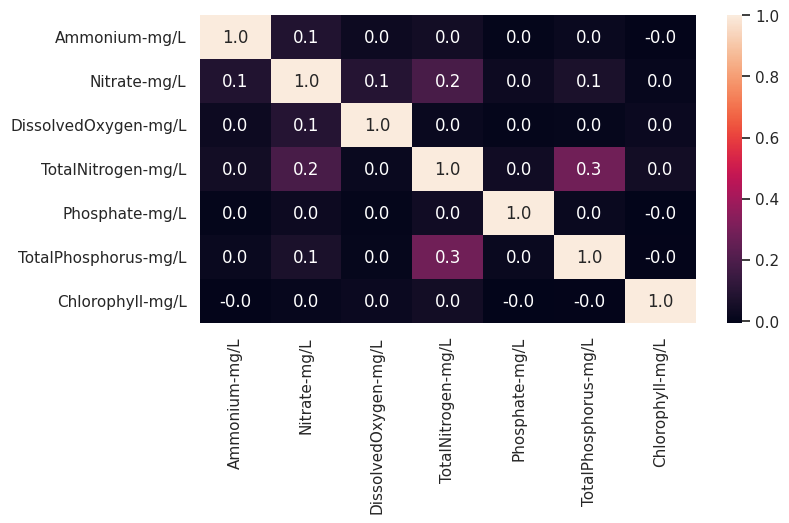

In [153]:
# Correlation matrix to see how the data is correlated after the data is cleand and preprocessed
corr_IT = df_IT.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_IT, annot=True, fmt='.1f')
plt.show()

The correlation got lower after preprocessing the data, which is a positive outcome. Data preprocessing involves handling missing values and removing duplicates, which enhances data quality and reduces noise in the analysis. A lower correlation may indicate that the cleaned data now reflects more accurate and independent relationships between variables, making it a more reliable basis for subsequent analyses, such as water quality classification using the **Water Quality Index (WQI)**.

#### Deal with Outliers

- Next after drooping the rows where the most of the high factor features were missing, and filling the rest of missing values with the columns median value, we going to check for outliers in the dataframe for Italy, we are going to do that by first by plotting the data and getting the idea of what kind of data we are dealing with

In [154]:
def plot_all_elements_level(df, country=''):
    """
    Plots the levels of various chemical elements over time for a specific country.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - country (str): The name of the country for which the data is being visualized.

    Returns:
    - None

    Plots:
    - Subplots for each chemical element (Ammonium, Nitrate, Dissolved Oxygen, Total Nitrogen,
      Phosphate, Total Phosphorus, Chlorophyll) over time.

    Example:
    plot_all_elements_level(df_IT, country='Italy')
    """
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4,
                                                                         ncols=2,
                                                                         figsize=(14,25))
    fig.suptitle(f'Chemical Elements Level Analysis for {country}', fontsize=16, fontweight='bold' )
    # plot 1
    ax1.plot(df['TimeSamplingDate'], df['Ammonium-mg/L'])
    ax1.set(title='Ammonium Level over perdiods of time',
            xlabel='Sampling Date',
            ylabel='Ammonium Level mg/L')
    # plot 2
    ax2.plot(df['TimeSamplingDate'], df['Nitrate-mg/L'])
    ax2.set(title='Nitrate Level over periods of time',
            xlabel='Sampling Date',
            ylabel='Nitrate Level mg/L')

    # plot 3
    ax3.plot(df['TimeSamplingDate'], df['DissolvedOxygen-mg/L'])
    ax3.set(title='Dissolved Oxygen Levels over periods of time',
            xlabel='Sampling Date',
            ylabel='Dissolved Oxygen Level mg/L')
    # plot 4
    ax4.plot(df['TimeSamplingDate'], df['TotalNitrogen-mg/L'])
    ax4.set(title='Total Nitrogen Level over periods of time',
            xlabel='Sampling Date',
            ylabel='Total Nitrogen mg/L')
    # plot 5
    ax5.plot(df['TimeSamplingDate'], df['Phosphate-mg/L'])
    ax5.set(title='Phosphate Levels over periods of time',
            xlabel='Sampling Date',
            ylabel='Phosphate mg/L')
    # plot 6
    ax6.plot(df['TimeSamplingDate'], df['TotalPhosphorus-mg/L'])
    ax6.set(title='Total Phosphorus Levels over period of time',
            xlabel='Sampling Date',
            ylabel='Total Phosphorus mg/L')
    # plot 7
    ax7.plot(df['TimeSamplingDate'],df['Chlorophyll-mg/L'])
    ax7.set(xlabel='Sampling Date',
            ylabel='Chlorophyll mg/L')

    plt.show()

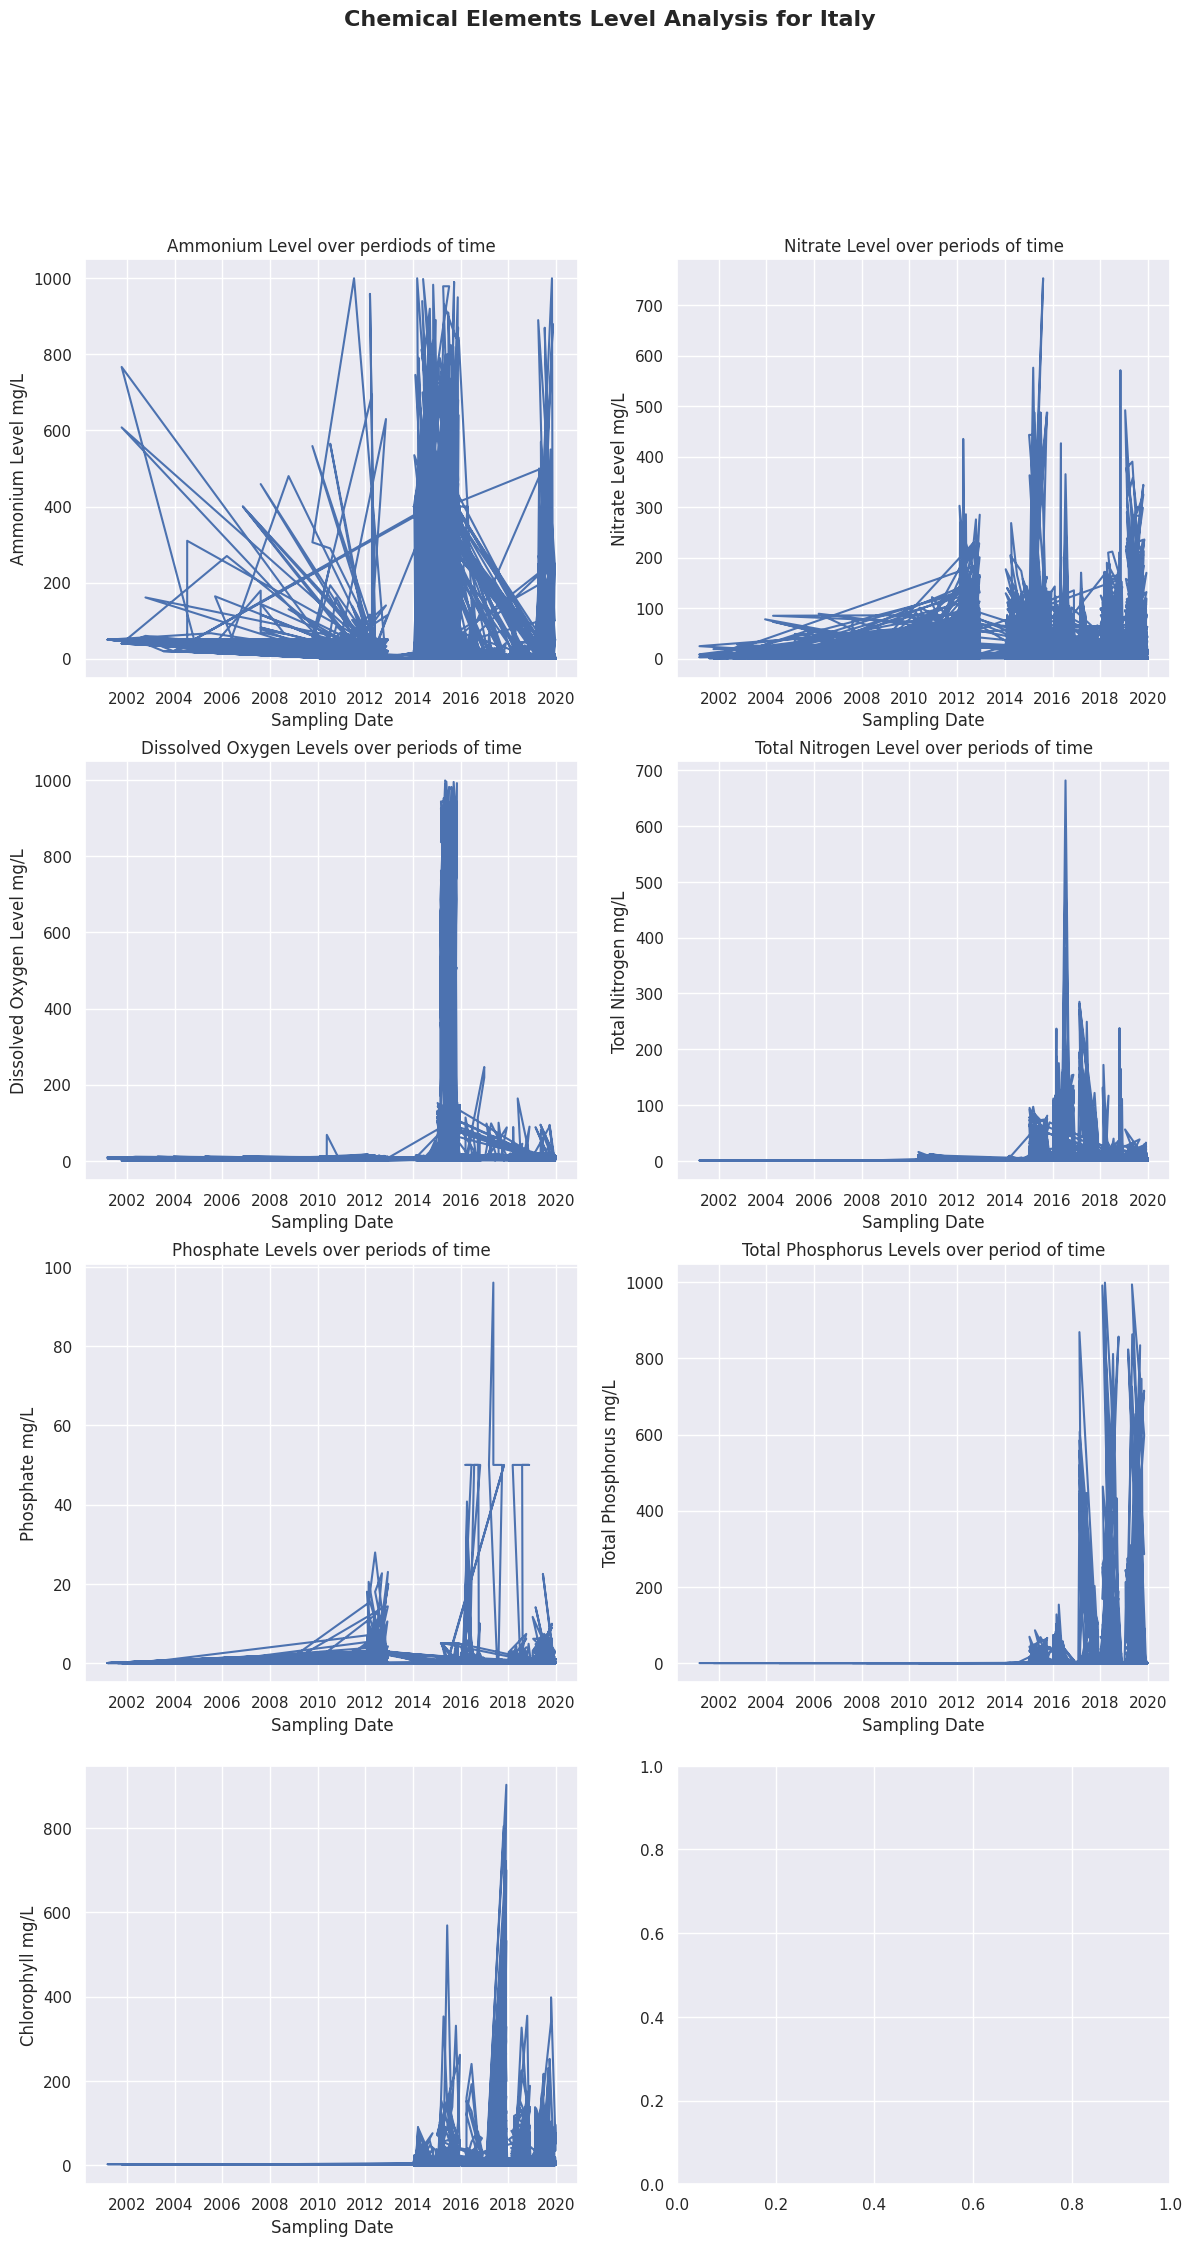

In [155]:
plot_all_elements_level(df_IT, 'Italy')

Now since we have a bit more cleaner data and we can see some patterns is time to create classes for the chemical values.

In [156]:
def create_classes(df):
    """
    This function creates classes for chemical values based on specified criteria.

    Parameters:
    - df: DataFrame containing chemical values.

    Returns:
    DataFrame with classes assigned to chemical values.
    """

    # Ammonium
    df.loc[(df['Ammonium-mg/L'] >= 0.0) & (df['Ammonium-mg/L'] <= 17.5), 'Ammonium-mg/L'] = 1
    df.loc[(df['Ammonium-mg/L'] > 17.5) & (df['Ammonium-mg/L'] <= 35), 'Ammonium-mg/L'] = 2
    df.loc[df['Ammonium-mg/L'] >= 35, 'Ammonium-mg/L'] = 3

    # Nitrate
    df.loc[(df['Nitrate-mg/L'] >= 0.0) & (df['Nitrate-mg/L'] <= 25), 'Nitrate-mg/L'] = 1
    df.loc[(df['Nitrate-mg/L'] > 25) & (df['Nitrate-mg/L'] <= 50), 'Nitrate-mg/L'] = 2
    df.loc[df['Nitrate-mg/L'] > 50] = 3

    # Dissolved Oxygen
    df.loc[df['DissolvedOxygen-mg/L'] >= 10, 'DissolvedOxygen-mg/L'] = 3
    df.loc[df['DissolvedOxygen-mg/L'] < 4, 'DissolvedOxygen-mg/L'] = 3
    df.loc[(df['DissolvedOxygen-mg/L'] >= 8) & (df['DissolvedOxygen-mg/L'] < 10), 'DissolvedOxygen-mg/L'] = 2
    df.loc[(df['DissolvedOxygen-mg/L'] >= 4) & (df['DissolvedOxygen-mg/L'] < 10), 'DissolvedOxygen-mg/L'] = 1

    # Total Nitrogen
    df.loc[df['TotalNitrogen-mg/L'] > 2, 'TotalNitrogen-mg/L'] = 3
    df.loc[(df['TotalNitrogen-mg/L'] > 0.9) & (df['TotalNitrogen-mg/L'] <= 2), 'TotalNitrogen-mg/L'] = 2
    df.loc[(df['TotalNitrogen-mg/L'] >= 0.0) & (df['TotalNitrogen-mg/L'] <= 0.9), 'TotalNitrogen-mg/L'] = 1

    # Total Phosphorus
    df.loc[df['TotalPhosphorus-mg/L'] > 0.7, 'TotalPhosphorus-mg/L'] = 3
    df.loc[(df['TotalPhosphorus-mg/L'] > 0.35) & (df['TotalPhosphorus-mg/L'] <= 0.7), 'TotalPhosphorus-mg/L'] = 2
    df.loc[(df['TotalPhosphorus-mg/L'] >= 0.0) & (df['TotalPhosphorus-mg/L'] <= 0.35), 'TotalPhosphorus-mg/L'] = 1

    # Phosphate
    df.loc[df['Phosphate-mg/L'] > 0.35, 'Phosphate-mg/L'] = 3
    df.loc[(df['Phosphate-mg/L'] > 0.075) & (df['Phosphate-mg/L'] <= 0.35), 'Phosphate-mg/L'] = 2
    df.loc[(df['Phosphate-mg/L'] >= 0.0) & (df['Phosphate-mg/L'] <= 0.075), 'Phosphate-mg/L'] = 1

    # Chlorophyll
    df.loc[(df['Chlorophyll-mg/L'] >= 0.0) & (df['Chlorophyll-mg/L'] <= 159), 'Chlorophyll-mg/L'] = 1
    df.loc[(df['Chlorophyll-mg/L'] > 150) & (df['Chlorophyll-mg/L'] <= 300), 'Chlorophyll-mg/L'] = 2
    df.loc[df['Chlorophyll-mg/L'] > 300, 'Chlorophyll-mg/L'] = 3

    return df

In [157]:
create_classes(df_IT)
df_IT

MonitoringSiteID     TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
63              IT10GEN1  2016-10-03 00:00:00         1.0000        1.0000   
64              IT10TVR7  2016-07-04 00:00:00         1.0000        1.0000   
66           ITR110199CH  2016-12-15 00:00:00         1.0000        1.0000   
67          ITR110074ACE  2016-06-14 00:00:00         1.0000        1.0000   
68          ITR110074ACE  2016-11-10 00:00:00         1.0000        1.0000   
...                  ...                  ...            ...           ...   
2374414    IT0806002150A  2016-04-05 00:00:00         1.0000        1.0000   
2374415    IT0806002150A  2016-05-09 00:00:00         1.0000        1.0000   
2374416    IT0806002150A  2016-06-06 00:00:00         1.0000        1.0000   
2374417    IT0806002150A  2016-07-05 00:00:00         1.0000        1.0000   
2374418    IT0806002150A  2016-09-27 00:00:00         1.0000        1.0000   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
63                     1.0000              3.0000          1.0000   
64                     1.0000              3.0000          1.0000   
66                     3.0000              1.0000          1.0000   
67                     2.0000              1.0000          1.0000   
68                     3.0000              1.0000          1.0000   
...                       ...                 ...             ...   
2374414                2.0000              2.0000          1.0000   
2374415                1.0000              2.0000          1.0000   
2374416                1.0000              2.0000          1.0000   
2374417                1.0000              2.0000          1.0000   
2374418                2.0000              2.0000          1.0000   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
63                     3.0000            1.0000  
64                     3.0000            1.0000  
66                     1.0000            1.0000  
67                     1.0000            1.0000  
68                     1.0000            1.0000  
...                       ...               ...  
2374414                1.0000            1.0000  
2374415                1.0000            1.0000  
2374416                1.0000            1.0000  
2374417                1.0000            1.0000  
2374418                1.0000            1.0000  

[2342490 rows x 9 columns]

In [158]:
def calculate_and_display_class_counts_for_all_elements(dataset):
    """
    Calculate and display class counts for all elements in the dataset.

    Parameters:
    - dataset: DataFrame containing chemical values with assigned classes.

    Returns:
    None (prints the resulting DataFrame).
    """
    result_data = []

    for column in dataset.columns:
        if column != ['MonitoringSiteID','TimeSamplingDate']:  # Exclude columns you don't want to process
            class_counts = dataset[column].astype(str).value_counts().sort_index()

            # Append the results to the list
            result_data.append({
                'Element': column,
                'Class 1': class_counts.get(0),
                'Class 2': class_counts.get(1),
                'Class 3': class_counts.get(2)
            })

    # Create a DataFrame from the list of dictionaries
    result_dataframe = pd.DataFrame(result_data)

    # Display the resulting DataFrame
    print(result_dataframe[2:])

In [159]:
calculate_and_display_class_counts_for_all_elements(df_IT)

                Element  Class 1  Class 2  Class 3
2         Ammonium-mg/L  2337923     1352     3215
3          Nitrate-mg/L  2337652     3116     1722
4  DissolvedOxygen-mg/L   833481   600045   908964
5    TotalNitrogen-mg/L  1442755   785792   113943
6        Phosphate-mg/L  2072353   238583    31554
7  TotalPhosphorus-mg/L  2302513    27493    12484
8      Chlorophyll-mg/L  2341934      524       32


### 2.1.2 Sweden's dataframe

In [160]:
data_info(df_SW)

Null_Values       Data_Type     Total
MonitoringSiteID                0          object  15183887
TimeSamplingDate                0  datetime64[ns]  15183887
Ammonium-mg/L                 518         float64  15183369
Nitrate-mg/L               424987         float64  14758900
DissolvedOxygen-mg/L     15179077         float64      4810
TotalNitrogen-mg/L             93         float64  15183794
Phosphate-mg/L               1000         float64  15182887
TotalPhosphorus-mg/L          550         float64  15183337
Chlorophyll-mg/L         15181213         float64      2674

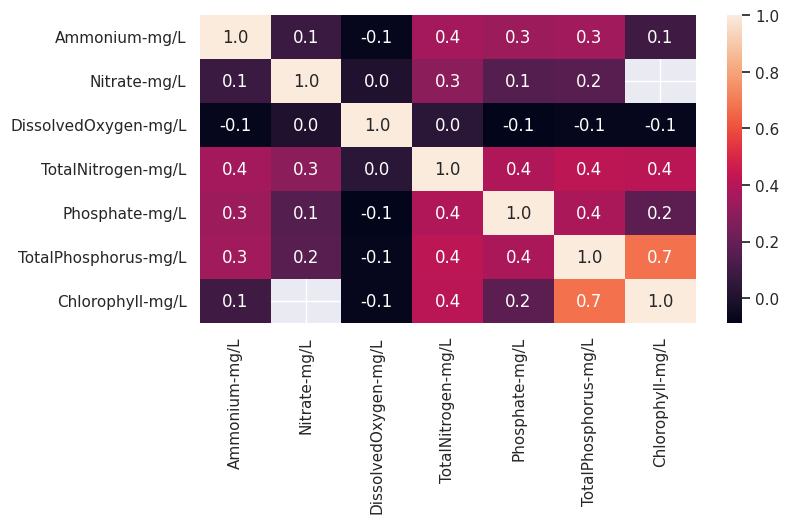

In [161]:
# Correlation matrix to see how the data is correlated
corr_SW_raw = df_SW.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_SW_raw, annot=True, fmt='.1f')
plt.show()

#### Deal with Duplicated Values

In [162]:
# Count all duplicated rows
df_SW.duplicated(keep=False).sum()

11658090

In [163]:
# Drop the duplicated rows
df_SW = df_SW.drop_duplicates(ignore_index=True)
df_SW

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
0        SE662925-154156       2012-08-09         0.0330        0.0270   
1        SE627500-151900       2008-08-12         0.0080        2.4530   
2        SE627500-151900       2012-04-20         0.0050        6.1160   
3        SE637654-150206       2010-04-13         0.1540        0.0710   
4        SE642900-144100       2009-09-08         0.0060        5.6770   
...                  ...              ...            ...           ...   
6110925  SE653690-122887       2020-02-03            NaN           NaN   
6110926  SE653690-122887       2020-02-03            NaN           NaN   
6110927  SE653690-122887       2020-02-03            NaN           NaN   
6110928  SE653690-122887       2020-02-03            NaN           NaN   
6110929  SE666592-155943       2019-09-16            NaN           NaN   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
0                         NaN              0.0920             NaN   
1                         NaN              1.2420             NaN   
2                         NaN              1.4470             NaN   
3                      0.3200              0.2430             NaN   
4                         NaN              1.6230             NaN   
...                       ...                 ...             ...   
6110925                   NaN             17.6000             NaN   
6110926                   NaN             17.6000             NaN   
6110927                   NaN             17.6000             NaN   
6110928                   NaN             17.6000             NaN   
6110929                   NaN                 NaN          0.0003   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
0                         NaN               NaN  
1                         NaN               NaN  
2                         NaN               NaN  
3                         NaN               NaN  
4                         NaN               NaN  
...                       ...               ...  
6110925                0.7700               NaN  
6110926                0.7900               NaN  
6110927                0.7600               NaN  
6110928                1.4000               NaN  
6110929                0.0060               NaN  

[6110930 rows x 9 columns]

In [164]:
data_info(df_SW)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  6110930
TimeSamplingDate                0  datetime64[ns]  6110930
Ammonium-mg/L                 464         float64  6110466
Nitrate-mg/L               150414         float64  5960516
DissolvedOxygen-mg/L      6106120         float64     4810
TotalNitrogen-mg/L             93         float64  6110837
Phosphate-mg/L                946         float64  6109984
TotalPhosphorus-mg/L          550         float64  6110380
Chlorophyll-mg/L          6108256         float64     2674

After removing duplicate values, the dataset contains 6,110,930 rows. The next steps involve addressing missing values and handling outliers. The process includes:

1. Handle Missing Values

- **Drop High-Weight Factor Features:** Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.

- **Fill NaN Values:** Fill the remaining missing values with the median value of the respective columns.

2. Deal with Outliers

- **Calculate classes** After addressing missing values and ensuring the data's integrity, the next step is to deal with outliers. One approach is to categorize the numerical values into classes. Each feature will be transformed into classes, and these classes will be utilized in further analysis, such as calculating the Water Quality Index (WQI).

These steps aim to ensure data integrity and prepare the dataset for subsequent analysis.

#### Handle Missing Values

In [165]:
# Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.
df_SW = df_SW.dropna(subset=['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L','TotalNitrogen-mg/L'],
                     thresh=3)
data_info(df_SW)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  5964390
TimeSamplingDate                0  datetime64[ns]  5964390
Ammonium-mg/L                  39         float64  5964351
Nitrate-mg/L                 3989         float64  5960401
DissolvedOxygen-mg/L      5959748         float64     4642
TotalNitrogen-mg/L             19         float64  5964371
Phosphate-mg/L                619         float64  5963771
TotalPhosphorus-mg/L          461         float64  5963929
Chlorophyll-mg/L          5963060         float64     1330

- Next after droping the rows where the most of the high factor features were missing, we going to check for other missing values in the dataframe for **Sweden** and fill them with the median values for their chemical elements respectivly.

In [166]:
df_SW.describe()

Ammonium-mg/L   Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count 5,964,351.0000 5,960,401.0000            4,642.0000      5,964,371.0000   
mean          4.7382         3.3351               10.0880             16.4191   
std          19.7041         3.9886                2.6416             23.3124   
min           0.0010         0.0010                0.0000              0.0300   
25%           0.0375         0.3069                8.9000              0.3306   
50%           0.5300         1.2600               10.2800             14.8000   
75%           1.4700         5.5100               11.8000             19.4000   
max         150.0000        47.8290               24.4000            185.0000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count  5,963,771.0000        5,963,929.0000        1,330.0000  
mean           0.8995                1.1673            7.5455  
std            2.5604                2.8626           13.9349  
min            0.0003                0.0003            0.4000  
25%            0.0636                0.0400            1.9000  
50%            0.2800                0.6400            3.4000  
75%            0.5800                0.8900            6.6000  
max           18.6600               20.7200          160.0000

In [167]:
fill_missing_with_median(df_SW)

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
0        SE662925-154156       2012-08-09         0.0330        0.0270   
1        SE627500-151900       2008-08-12         0.0080        2.4530   
2        SE627500-151900       2012-04-20         0.0050        6.1160   
3        SE637654-150206       2010-04-13         0.1540        0.0710   
4        SE642900-144100       2009-09-08         0.0060        5.6770   
...                  ...              ...            ...           ...   
6110584  SE646970-129665       2019-03-20         0.5300       10.1900   
6110585  SE646970-129665       2019-05-22         0.5300        0.0440   
6110586  SE646970-129665       2019-07-22         0.5300        0.1460   
6110587  SE646970-129665       2019-09-24         0.5300        1.5500   
6110588  SE646970-129665       2019-11-20         0.5300        8.8600   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
0                     10.2800              0.0920          0.2800   
1                     10.2800              1.2420          0.2800   
2                     10.2800              1.4470          0.2800   
3                      0.3200              0.2430          0.2800   
4                     10.2800              1.6230          0.2800   
...                       ...                 ...             ...   
6110584               12.0000              3.6000          0.2800   
6110585                8.9000              1.1000          0.2800   
6110586                6.7000              1.1000          0.2800   
6110587                4.3000              3.7000          0.2800   
6110588                9.8000              2.5000          0.2800   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
0                      0.6400            3.4000  
1                      0.6400            3.4000  
2                      0.6400            3.4000  
3                      0.6400            3.4000  
4                      0.6400            3.4000  
...                       ...               ...  
6110584                0.2200            3.4000  
6110585                0.1500            3.4000  
6110586                0.1600            3.4000  
6110587                0.2100            3.4000  
6110588                0.3800            3.4000  

[5964390 rows x 9 columns]

In [168]:
data_info(df_SW)

Null_Values       Data_Type    Total
MonitoringSiteID                0          object  5964390
TimeSamplingDate                0  datetime64[ns]  5964390
Ammonium-mg/L                   0         float64  5964390
Nitrate-mg/L                    0         float64  5964390
DissolvedOxygen-mg/L            0         float64  5964390
TotalNitrogen-mg/L              0         float64  5964390
Phosphate-mg/L                  0         float64  5964390
TotalPhosphorus-mg/L            0         float64  5964390
Chlorophyll-mg/L                0         float64  5964390

In [169]:
df_SW.describe()

Ammonium-mg/L   Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count 5,964,390.0000 5,964,390.0000        5,964,390.0000      5,964,390.0000   
mean          4.7382         3.3338               10.2799             16.4191   
std          19.7040         3.9877                0.0739             23.3124   
min           0.0010         0.0010                0.0000              0.0300   
25%           0.0375         0.3082               10.2800              0.3306   
50%           0.5300         1.2600               10.2800             14.8000   
75%           1.4700         5.5000               10.2800             19.4000   
max         150.0000        47.8290               24.4000            185.0000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count  5,964,390.0000        5,964,390.0000    5,964,390.0000  
mean           0.8994                1.1673            3.4009  
std            2.5603                2.8625            0.2170  
min            0.0003                0.0003            0.4000  
25%            0.0636                0.0400            3.4000  
50%            0.2800                0.6400            3.4000  
75%            0.5800                0.8900            3.4000  
max           18.6600               20.7200          160.0000

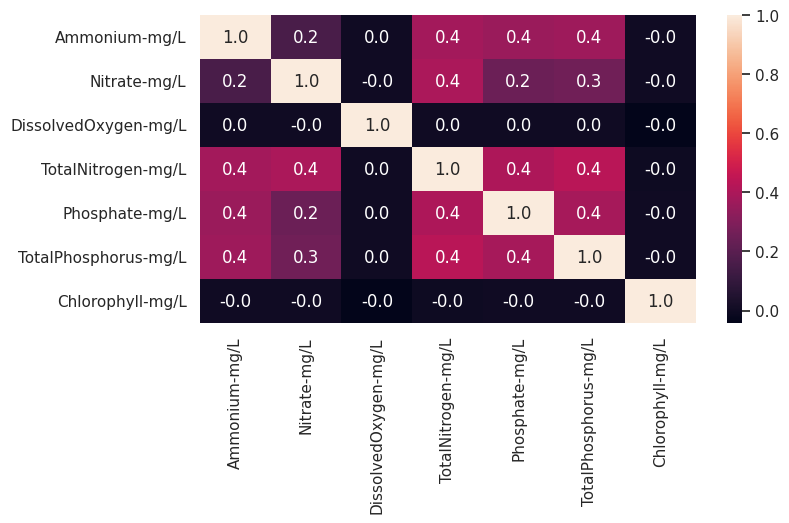

In [170]:
# Correlation matrix to see how the data is correlated after the data is cleand and preprocessed
corr_IT = df_SW.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_IT, annot=True, fmt='.1f')
plt.show()

The correlation got lower after preprocessing the data, which is a positive outcome. Data preprocessing involves handling missing values and removing duplicates, which enhances data quality and reduces noise in the analysis. A lower correlation may indicate that the cleaned data now reflects more accurate and independent relationships between variables, making it a more reliable basis for subsequent analyses, such as water quality classification using the **Water Quality Index (WQI)**.

#### Deal with Outliers

- Next after drooping the rows where the most of the high factor features were missing, and filling the rest of missing values with the columns median value, we going to check for outliers in the dataframe for Italy, we are going to do that by first by plotting the data and getting the idea of what kind of data we are dealing with

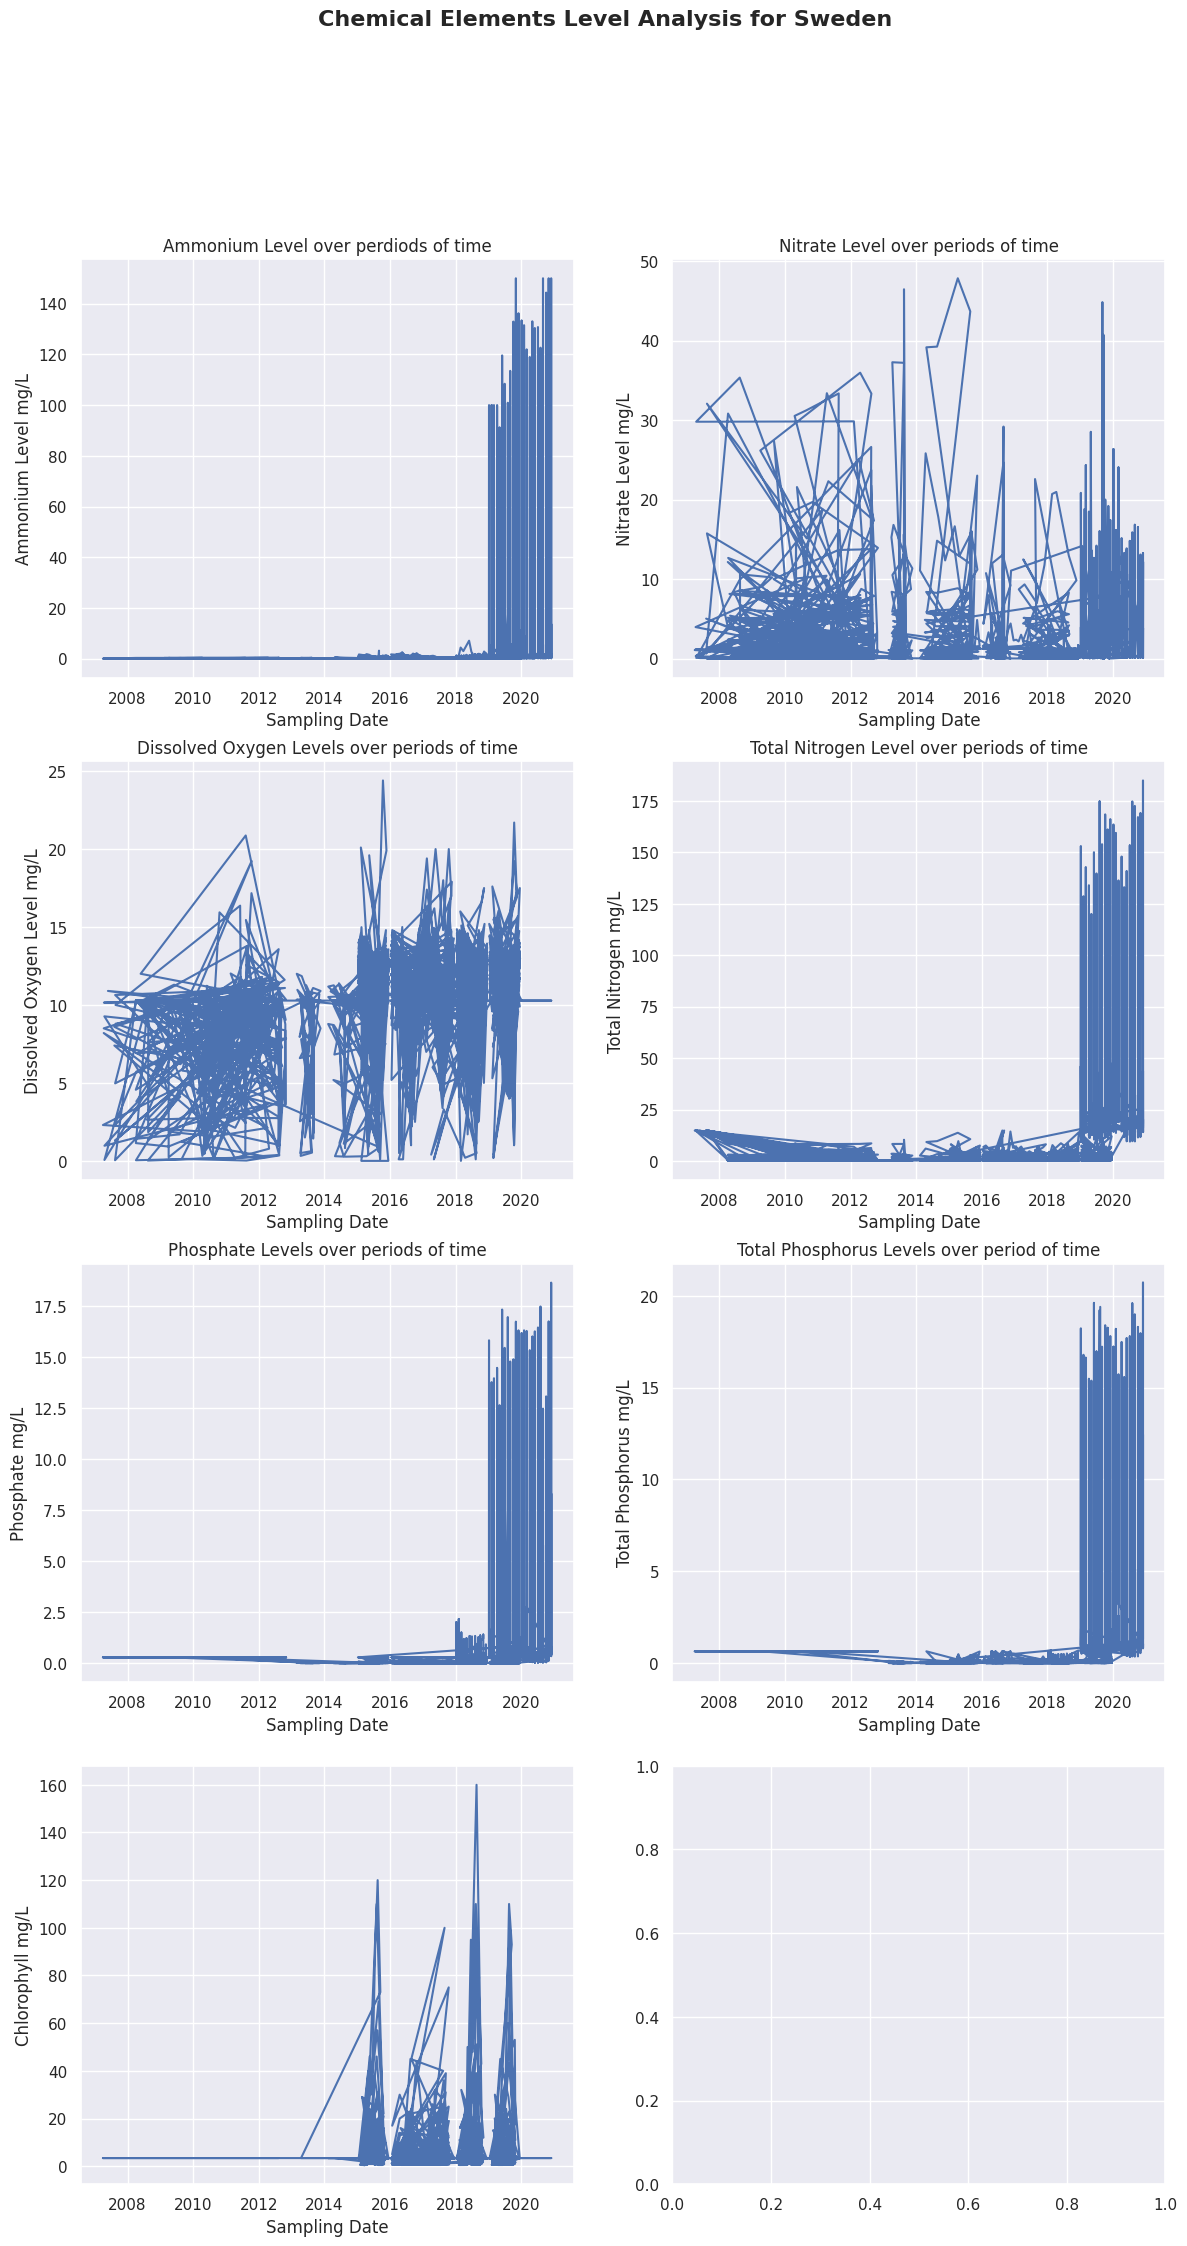

In [171]:
plot_all_elements_level(df_SW, 'Sweden')

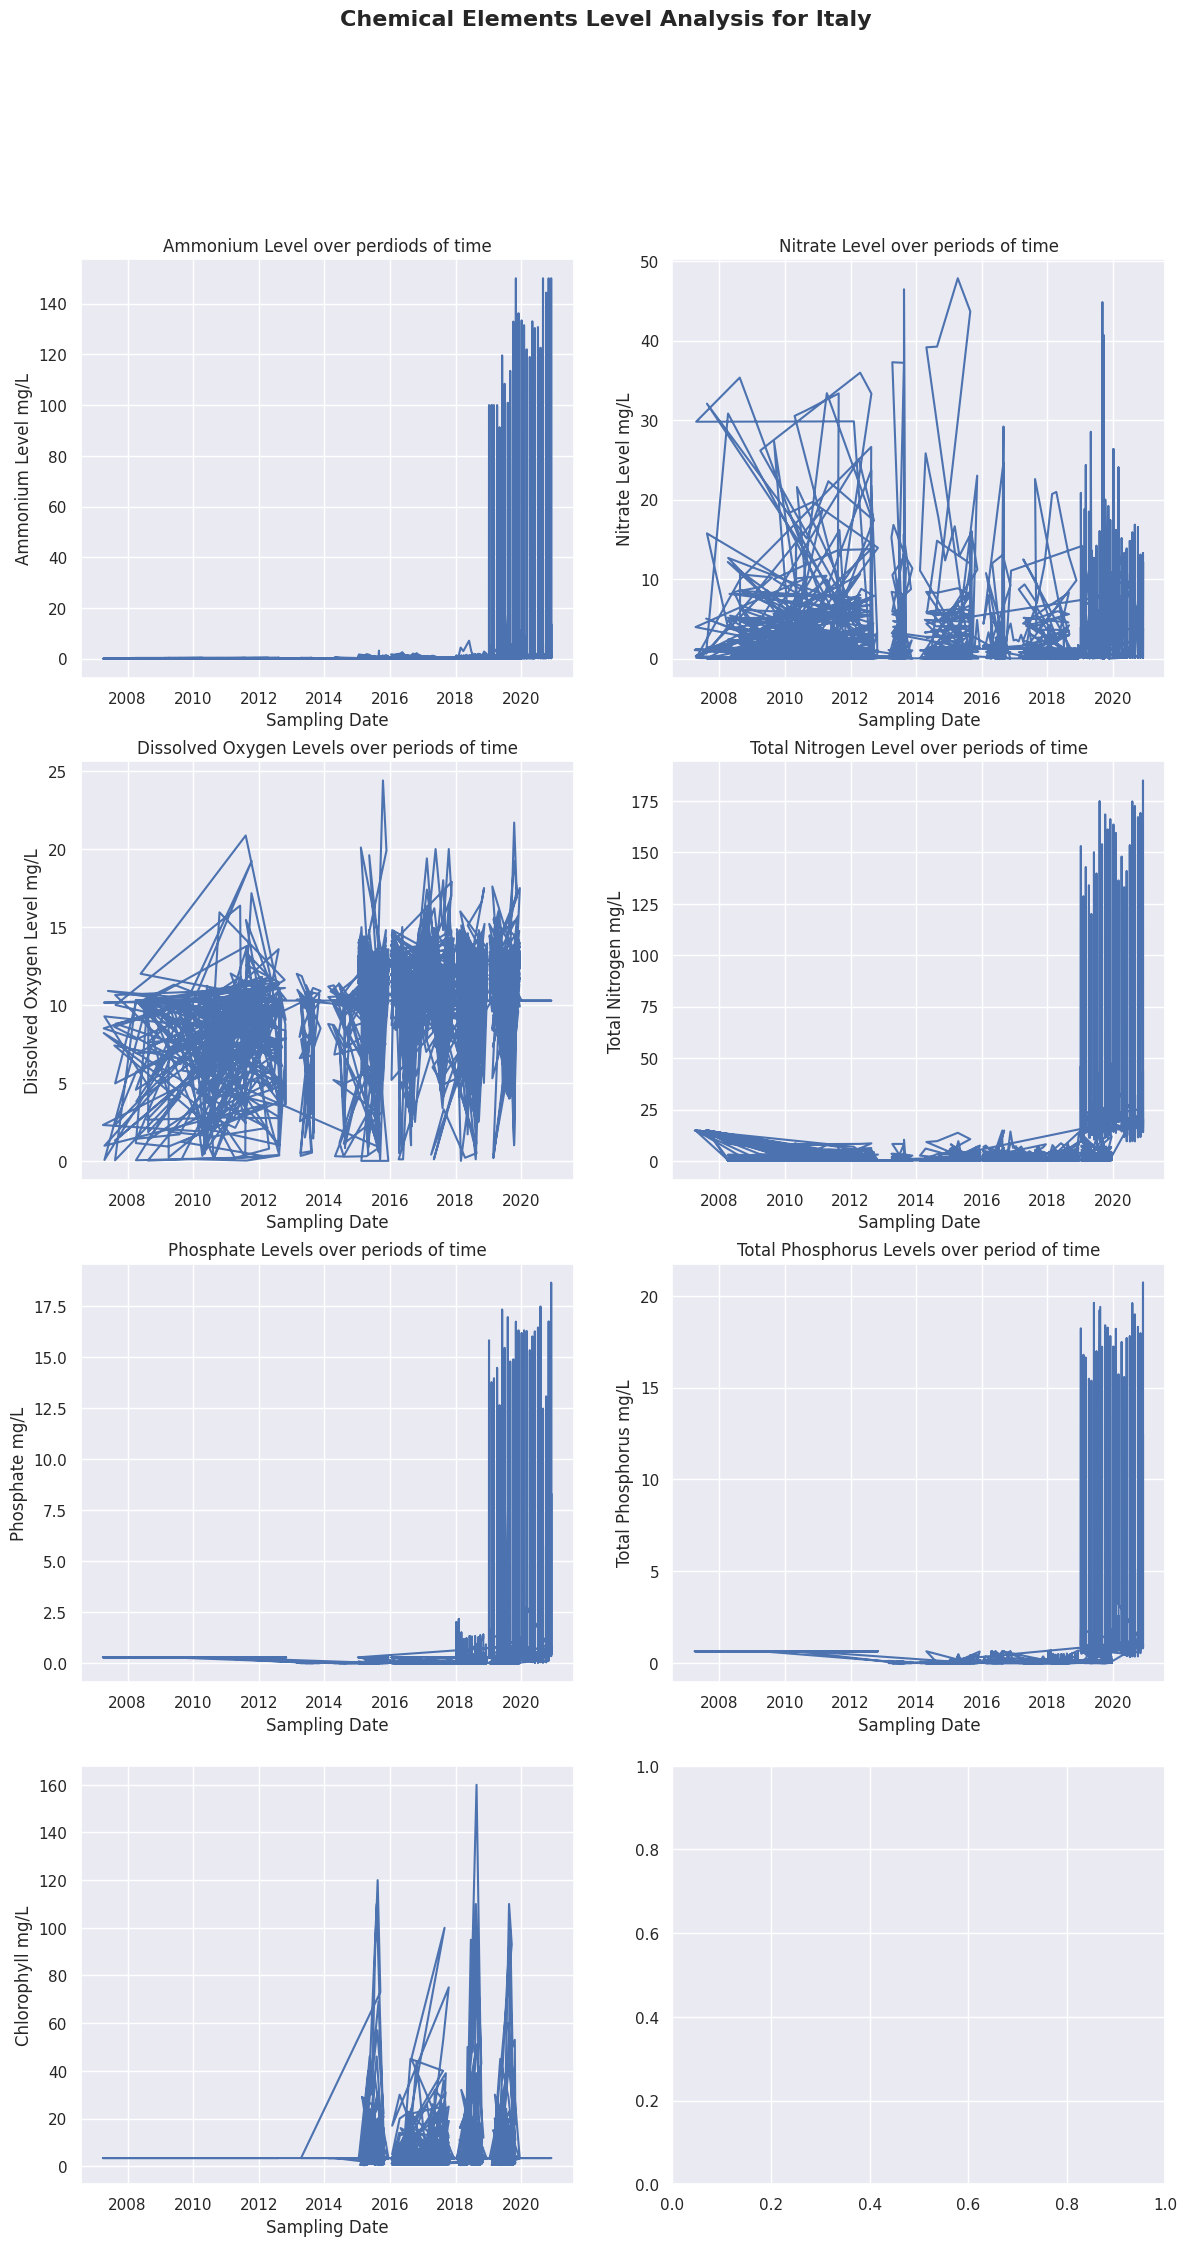

In [172]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4,
                                                                     ncols=2,
                                                                     figsize=(14,25))

fig.suptitle('Chemical Elements Level Analysis for Italy', fontsize=16, fontweight='bold' )
# plot 1
ax1.plot(df_SW['TimeSamplingDate'], df_SW['Ammonium-mg/L'])
ax1.set(title='Ammonium Level over perdiods of time',
        xlabel='Sampling Date',
        ylabel='Ammonium Level mg/L')
# plot 2
ax2.plot(df_SW['TimeSamplingDate'], df_SW['Nitrate-mg/L'])
ax2.set(title='Nitrate Level over periods of time',
        xlabel='Sampling Date',
        ylabel='Nitrate Level mg/L')

# plot 3
ax3.plot(df_SW['TimeSamplingDate'], df_SW['DissolvedOxygen-mg/L'])
ax3.set(title='Dissolved Oxygen Levels over periods of time',
        xlabel='Sampling Date',
        ylabel='Dissolved Oxygen Level mg/L')
# plot 4
ax4.plot(df_SW['TimeSamplingDate'], df_SW['TotalNitrogen-mg/L'])
ax4.set(title='Total Nitrogen Level over periods of time',
        xlabel='Sampling Date',
        ylabel='Total Nitrogen mg/L')
# plot 5
ax5.plot(df_SW['TimeSamplingDate'], df_SW['Phosphate-mg/L'])
ax5.set(title='Phosphate Levels over periods of time',
        xlabel='Sampling Date',
        ylabel='Phosphate mg/L')
# plot 6
ax6.plot(df_SW['TimeSamplingDate'], df_SW['TotalPhosphorus-mg/L'])
ax6.set(title='Total Phosphorus Levels over period of time',
        xlabel='Sampling Date',
        ylabel='Total Phosphorus mg/L')
# plot 7
ax7.plot(df_SW['TimeSamplingDate'],df_SW['Chlorophyll-mg/L'])
ax7.set(xlabel='Sampling Date',
        ylabel='Chlorophyll mg/L')

plt.show()

Now since we have a bit more cleaner data and we can see some patterns is time to create classes for the chemical values.

In [173]:
create_classes(df_SW)
df_SW

MonitoringSiteID     TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
0        SE662925-154156  2012-08-09 00:00:00         1.0000        1.0000   
1        SE627500-151900  2008-08-12 00:00:00         1.0000        1.0000   
2        SE627500-151900  2012-04-20 00:00:00         1.0000        1.0000   
3        SE637654-150206  2010-04-13 00:00:00         1.0000        1.0000   
4        SE642900-144100  2009-09-08 00:00:00         1.0000        1.0000   
...                  ...                  ...            ...           ...   
6110584  SE646970-129665  2019-03-20 00:00:00         1.0000        1.0000   
6110585  SE646970-129665  2019-05-22 00:00:00         1.0000        1.0000   
6110586  SE646970-129665  2019-07-22 00:00:00         1.0000        1.0000   
6110587  SE646970-129665  2019-09-24 00:00:00         1.0000        1.0000   
6110588  SE646970-129665  2019-11-20 00:00:00         1.0000        1.0000   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
0                      3.0000              1.0000          2.0000   
1                      3.0000              2.0000          2.0000   
2                      3.0000              2.0000          2.0000   
3                      3.0000              1.0000          2.0000   
4                      3.0000              2.0000          2.0000   
...                       ...                 ...             ...   
6110584                3.0000              3.0000          2.0000   
6110585                2.0000              2.0000          2.0000   
6110586                1.0000              2.0000          2.0000   
6110587                1.0000              3.0000          2.0000   
6110588                2.0000              3.0000          2.0000   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
0                      2.0000            1.0000  
1                      2.0000            1.0000  
2                      2.0000            1.0000  
3                      2.0000            1.0000  
4                      2.0000            1.0000  
...                       ...               ...  
6110584                1.0000            1.0000  
6110585                1.0000            1.0000  
6110586                1.0000            1.0000  
6110587                1.0000            1.0000  
6110588                2.0000            1.0000  

[5964390 rows x 9 columns]

In [174]:
df_SW['DissolvedOxygen-mg/L'].value_counts()

3.0000    5962477
2.0000       1401
1.0000        512
Name: DissolvedOxygen-mg/L, dtype: int64

In [175]:
df_SW

MonitoringSiteID     TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
0        SE662925-154156  2012-08-09 00:00:00         1.0000        1.0000   
1        SE627500-151900  2008-08-12 00:00:00         1.0000        1.0000   
2        SE627500-151900  2012-04-20 00:00:00         1.0000        1.0000   
3        SE637654-150206  2010-04-13 00:00:00         1.0000        1.0000   
4        SE642900-144100  2009-09-08 00:00:00         1.0000        1.0000   
...                  ...                  ...            ...           ...   
6110584  SE646970-129665  2019-03-20 00:00:00         1.0000        1.0000   
6110585  SE646970-129665  2019-05-22 00:00:00         1.0000        1.0000   
6110586  SE646970-129665  2019-07-22 00:00:00         1.0000        1.0000   
6110587  SE646970-129665  2019-09-24 00:00:00         1.0000        1.0000   
6110588  SE646970-129665  2019-11-20 00:00:00         1.0000        1.0000   

         DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
0                      3.0000              1.0000          2.0000   
1                      3.0000              2.0000          2.0000   
2                      3.0000              2.0000          2.0000   
3                      3.0000              1.0000          2.0000   
4                      3.0000              2.0000          2.0000   
...                       ...                 ...             ...   
6110584                3.0000              3.0000          2.0000   
6110585                2.0000              2.0000          2.0000   
6110586                1.0000              2.0000          2.0000   
6110587                1.0000              3.0000          2.0000   
6110588                2.0000              3.0000          2.0000   

         TotalPhosphorus-mg/L  Chlorophyll-mg/L  
0                      2.0000            1.0000  
1                      2.0000            1.0000  
2                      2.0000            1.0000  
3                      2.0000            1.0000  
4                      2.0000            1.0000  
...                       ...               ...  
6110584                1.0000            1.0000  
6110585                1.0000            1.0000  
6110586                1.0000            1.0000  
6110587                1.0000            1.0000  
6110588                2.0000            1.0000  

[5964390 rows x 9 columns]

In [176]:
calculate_and_display_class_counts_for_all_elements(df_SW)

                Element  Class 1  Class 2        Class 3
2         Ammonium-mg/L  5705252    37744   221,394.0000
3          Nitrate-mg/L  5963737      653            NaN
4  DissolvedOxygen-mg/L      512     1401 5,962,477.0000
5    TotalNitrogen-mg/L  1819475    81196 4,063,719.0000
6        Phosphate-mg/L  1740576  1559740 2,664,074.0000
7  TotalPhosphorus-mg/L  1849699  1558552 2,556,139.0000
8      Chlorophyll-mg/L  5964389        1            NaN


### 2.1.3 Estonia's dataframe

In [177]:
data_info(df_ES)

Null_Values       Data_Type  Total
MonitoringSiteID                0          object  26781
TimeSamplingDate                0  datetime64[ns]  26781
Ammonium-mg/L                 384         float64  26397
Nitrate-mg/L                  575         float64  26206
DissolvedOxygen-mg/L        18726         float64   8055
TotalNitrogen-mg/L          21490         float64   5291
Phosphate-mg/L              21643         float64   5138
TotalPhosphorus-mg/L        21487         float64   5294
Chlorophyll-mg/L            25915         float64    866

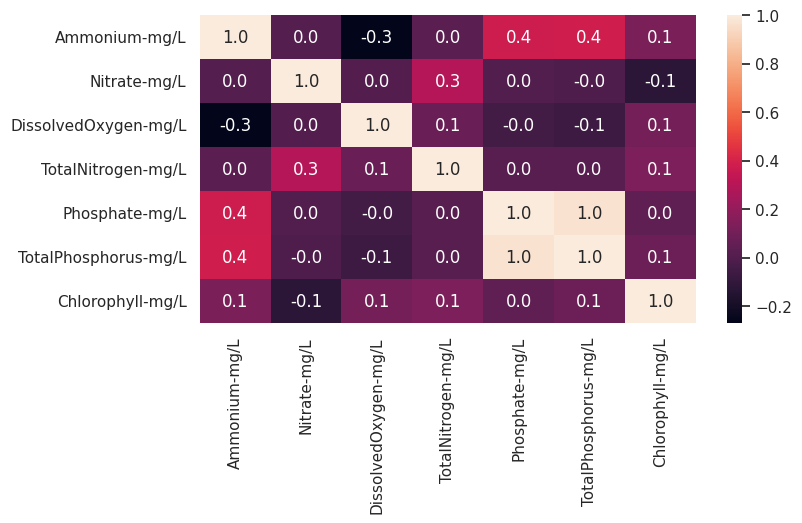

In [178]:
# correlation matrix to see how the data is correlated
corr_ES_raw = df_ES.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_ES_raw, annot=True, fmt='.1f')
plt.show()

#### Deal with Duplicated Valus

In [179]:
# Count all duplicated rows
df_ES.duplicated(keep=False).sum()

0

In this dataframe there is no duplicated values

After removing duplicate values, the dataset contains 26,781 rows. The next steps involve addressing missing values and handling outliers. The process includes:

1. Handle Missing Values

- **Drop High-Weight Factor Features:** Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.

- **Fill NaN Values:** Fill the remaining missing values with the median value of the respective columns.

2. Deal with Outliers

- **Calculate classes** After addressing missing values and ensuring the data's integrity, the next step is to deal with outliers. One approach is to categorize the numerical values into classes. Each feature will be transformed into classes, and these classes will be utilized in further analysis, such as calculating the Water Quality Index (WQI).

These steps aim to ensure data integrity and prepare the dataset for subsequent analysis.

#### Handle Missing Values

In [180]:
# Drop rows with missing values in features with a high weight factor, as they significantly impact target calculation.
df_ES = df_ES.dropna(subset=['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L','TotalNitrogen-mg/L'],
                     thresh=3)
data_info(df_ES)

Null_Values       Data_Type  Total
MonitoringSiteID                0          object   8020
TimeSamplingDate                0  datetime64[ns]   8020
Ammonium-mg/L                   4         float64   8016
Nitrate-mg/L                  198         float64   7822
DissolvedOxygen-mg/L          315         float64   7705
TotalNitrogen-mg/L           2791         float64   5229
Phosphate-mg/L               2886         float64   5134
TotalPhosphorus-mg/L         2790         float64   5230
Chlorophyll-mg/L             7208         float64    812

- Next after droping the rows where the most of the high factor features were missing, we going to check for other missing values in the dataframe for **Estonia** and fill them with the median values for their chemical elements respectivly.

In [181]:
df_ES.describe()

Ammonium-mg/L  Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count     8,016.0000    7,822.0000            7,705.0000          5,229.0000   
mean          0.0861        9.5867                8.6197              1.9409   
std           0.2875       14.4346                3.8246              4.9932   
min           0.0000        0.0050                0.0000              0.1100   
25%           0.0129        0.3511                6.8000              0.7400   
50%           0.0290        2.2000                9.2000              1.3000   
75%           0.0700       14.6190               11.2000              2.5000   
max          11.4400      150.0000               95.0000            341.0000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count      5,134.0000            5,230.0000          812.0000  
mean           0.0250                0.0486           15.3131  
std            0.0783                0.0845           17.0303  
min            0.0020                0.0050            0.2000  
25%            0.0080                0.0250            3.9000  
50%            0.0160                0.0380            9.4500  
75%            0.0270                0.0540           21.0750  
max            2.4000                2.5000          166.0000

In [182]:
fill_missing_with_median(df_ES)

MonitoringSiteID TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
20             EE12597       2008-09-30         0.0700        0.4000   
222            EE11875       2008-08-14         0.0700        6.2000   
278             EE5191       2008-07-29         2.4700        0.4000   
388             EE9418       2008-09-18         0.0700        0.4000   
533              EEA02       2009-07-01         0.0100       26.6000   
...                ...              ...            ...           ...   
26391     EESJB1561000       2015-08-18         0.0200        0.0190   
26403     EESJA9117000       2017-04-06         0.0290        6.2020   
26433     EESJA0195000       2019-06-21         0.0290        0.0093   
26434     EESJA0094000       2019-10-15         0.0290        0.1643   
26435     EESJA7026000       2019-10-15         0.0290        0.1259   

       DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
20                   0.0800              1.3000          0.0160   
222                  6.0700              1.3000          0.0160   
278                  0.3400              1.3000          0.0160   
388                  0.7300              1.3000          0.0160   
533                  9.2000              1.3000          0.0160   
...                     ...                 ...             ...   
26391               15.2000              1.2000          0.0270   
26403               11.5000              2.2000          0.0130   
26433               11.3400              0.2921          0.0046   
26434               10.2700              0.3508          0.0129   
26435               10.1200              0.3656          0.0133   

       TotalPhosphorus-mg/L  Chlorophyll-mg/L  
20                   0.0380            9.4500  
222                  0.0380            9.4500  
278                  0.0380            9.4500  
388                  0.0380            9.4500  
533                  0.0380            9.4500  
...                     ...               ...  
26391                0.0750           62.3200  
26403                0.0350            9.4500  
26433                0.0143            9.4500  
26434                0.0257            9.4500  
26435                0.0236            9.4500  

[8020 rows x 9 columns]

In [183]:
data_info(df_ES)

Null_Values       Data_Type  Total
MonitoringSiteID                0          object   8020
TimeSamplingDate                0  datetime64[ns]   8020
Ammonium-mg/L                   0         float64   8020
Nitrate-mg/L                    0         float64   8020
DissolvedOxygen-mg/L            0         float64   8020
TotalNitrogen-mg/L              0         float64   8020
Phosphate-mg/L                  0         float64   8020
TotalPhosphorus-mg/L            0         float64   8020
Chlorophyll-mg/L                0         float64   8020

In [184]:
df_ES.describe()

Ammonium-mg/L  Nitrate-mg/L  DissolvedOxygen-mg/L  TotalNitrogen-mg/L  \
count     8,020.0000    8,020.0000            8,020.0000          8,020.0000   
mean          0.0860        9.4043                8.6425              1.7179   
std           0.2875       14.3013                3.7504              4.0432   
min           0.0000        0.0050                0.0000              0.1100   
25%           0.0129        0.3800                6.9000              0.9900   
50%           0.0290        2.2000                9.2000              1.3000   
75%           0.0700       14.0000               11.1000              1.7000   
max          11.4400      150.0000               95.0000            341.0000   

       Phosphate-mg/L  TotalPhosphorus-mg/L  Chlorophyll-mg/L  
count      8,020.0000            8,020.0000        8,020.0000  
mean           0.0218                0.0449           10.0436  
std            0.0628                0.0684            5.6974  
min            0.0020                0.0050            0.2000  
25%            0.0120                0.0310            9.4500  
50%            0.0160                0.0380            9.4500  
75%            0.0200                0.0440            9.4500  
max            2.4000                2.5000          166.0000

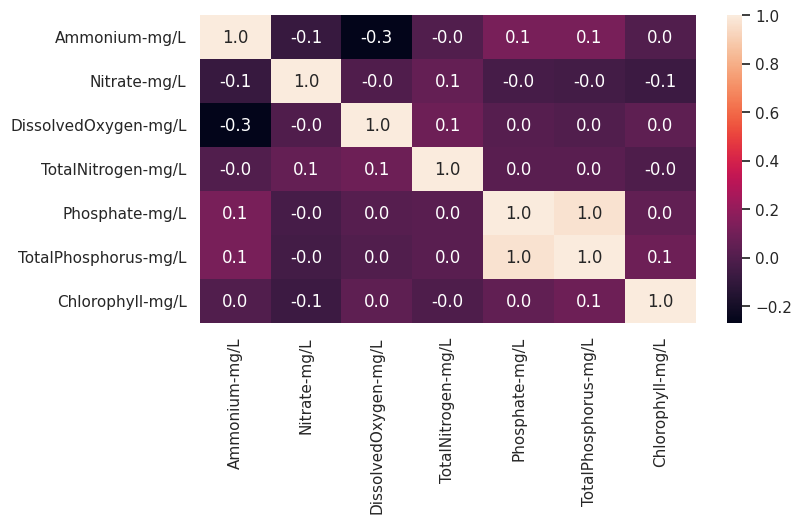

In [185]:
# correlation matrix to see how the data is correlated after the data is cleand and preprocessed
corr_ES = df_ES.corr(numeric_only=True)

sns.set()
plt.figure(figsize=(8,4))
sns.heatmap(corr_ES, annot=True, fmt='.1f')
plt.show()

The correlation got lower after preprocessing the data, which is a positive outcome. Data preprocessing involves handling missing values and removing duplicates, which enhances data quality and reduces noise in the analysis. A lower correlation may indicate that the cleaned data now reflects more accurate and independent relationships between variables, making it a more reliable basis for subsequent analyses, such as water quality classification using the **Water Quality Index (WQI)**.

#### Deal with Outliers

- Next after drooping the rows where the most of the high factor features were missing, and filling the rest of missing values with the columns median value, we going to check for outliers in the dataframe for Italy, we are going to do that by first by plotting the data and getting the idea of what kind of data we are dealing with

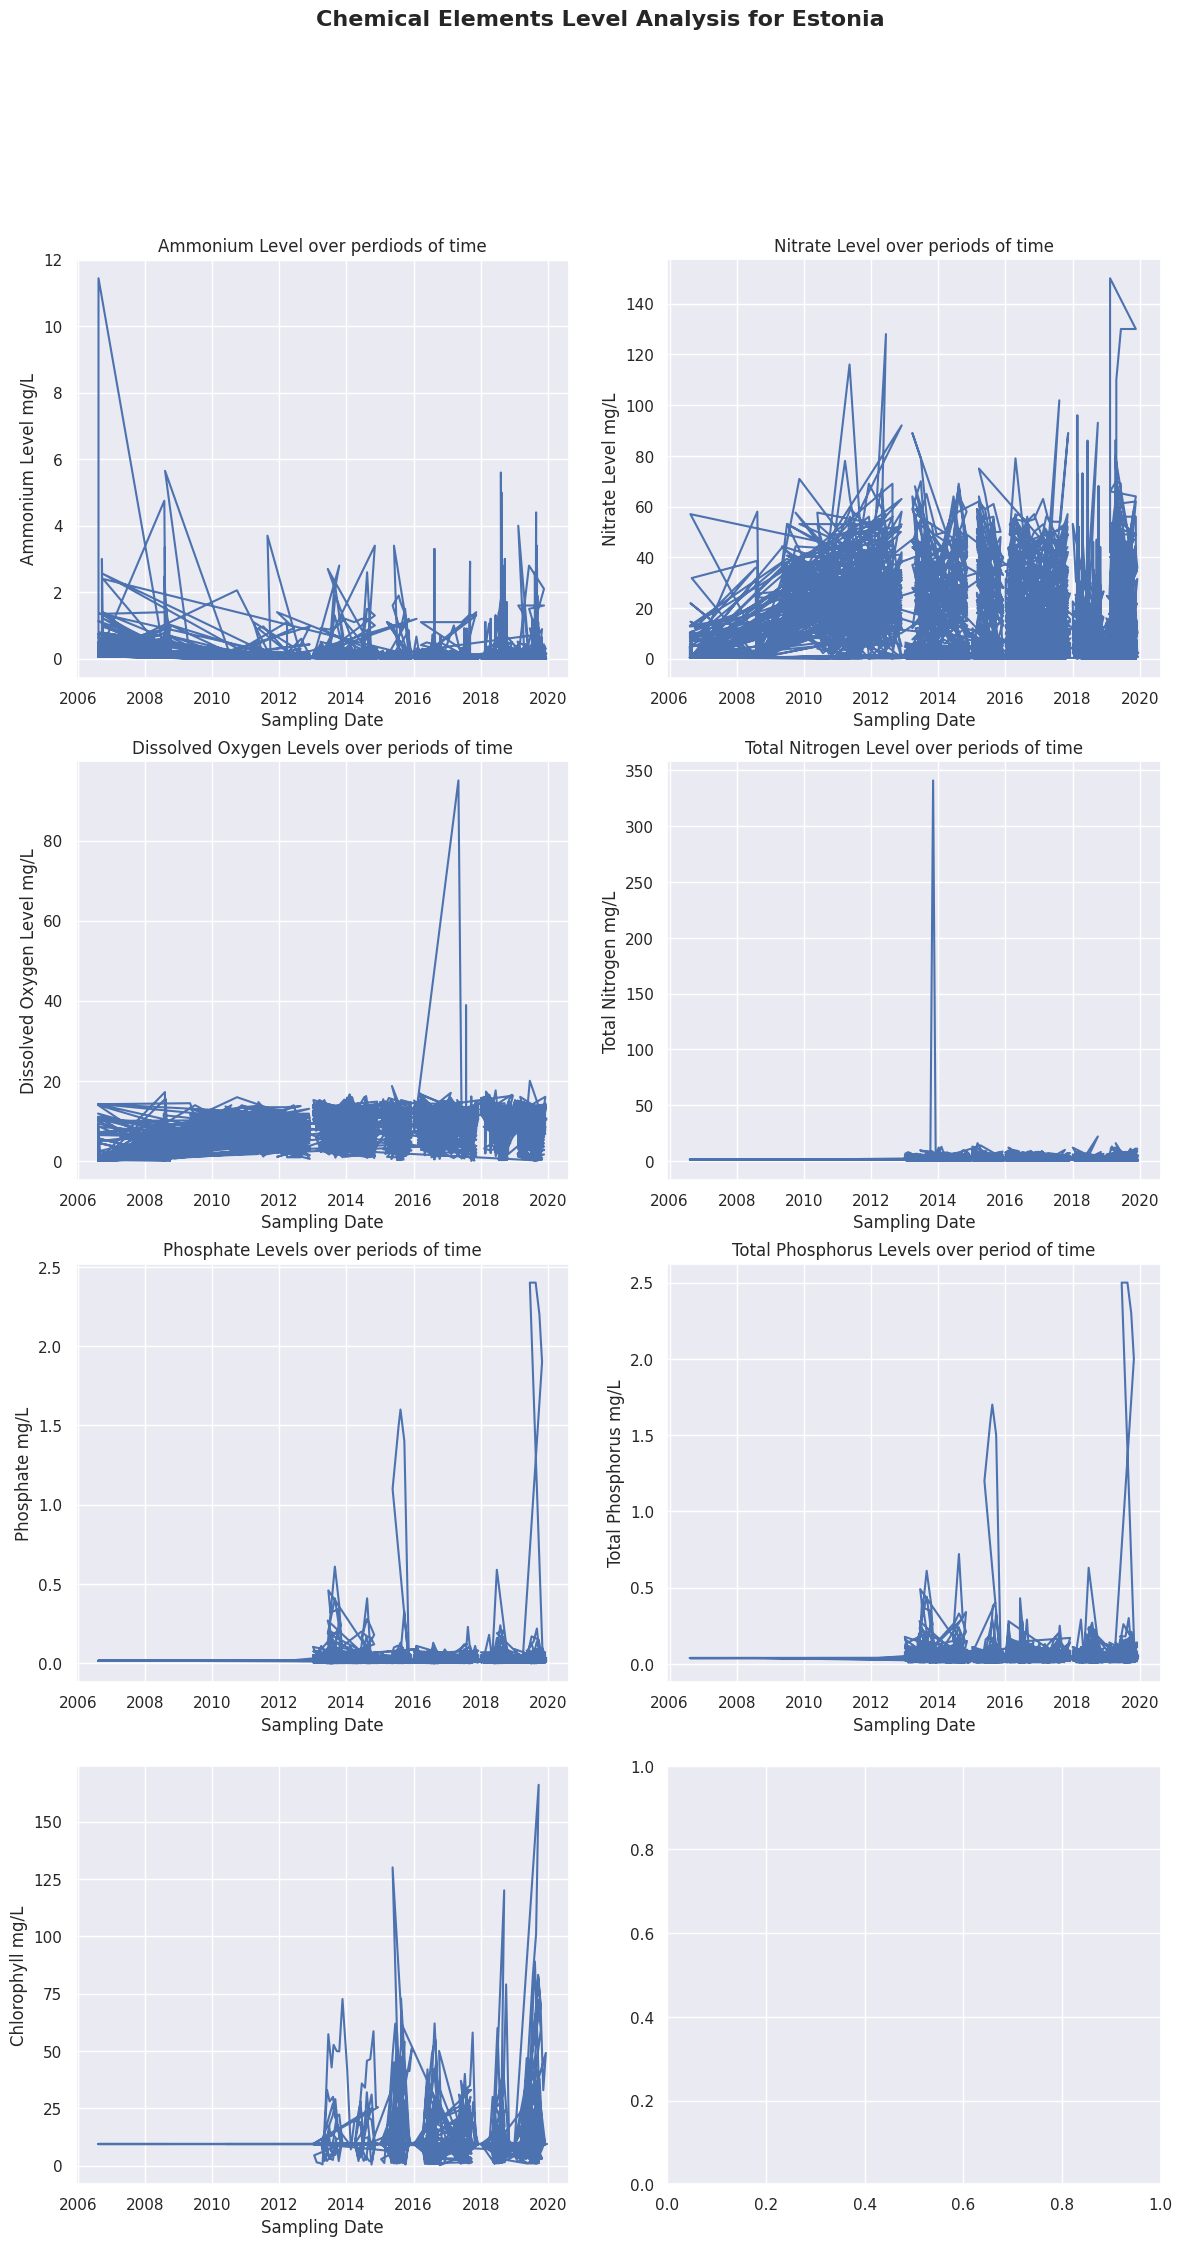

In [186]:
plot_all_elements_level(df_ES, 'Estonia')

Now since we have a bit more cleaner data and we can see some patterns is time to create classes for the chemical values.

In [187]:
create_classes(df_ES)
df_ES

MonitoringSiteID     TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
20             EE12597  2008-09-30 00:00:00         1.0000        1.0000   
222            EE11875  2008-08-14 00:00:00         1.0000        1.0000   
278             EE5191  2008-07-29 00:00:00         1.0000        1.0000   
388             EE9418  2008-09-18 00:00:00         1.0000        1.0000   
533              EEA02  2009-07-01 00:00:00         1.0000        2.0000   
...                ...                  ...            ...           ...   
26391     EESJB1561000  2015-08-18 00:00:00         1.0000        1.0000   
26403     EESJA9117000  2017-04-06 00:00:00         1.0000        1.0000   
26433     EESJA0195000  2019-06-21 00:00:00         1.0000        1.0000   
26434     EESJA0094000  2019-10-15 00:00:00         1.0000        1.0000   
26435     EESJA7026000  2019-10-15 00:00:00         1.0000        1.0000   

       DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
20                   3.0000              2.0000          1.0000   
222                  1.0000              2.0000          1.0000   
278                  3.0000              2.0000          1.0000   
388                  3.0000              2.0000          1.0000   
533                  2.0000              2.0000          1.0000   
...                     ...                 ...             ...   
26391                3.0000              2.0000          1.0000   
26403                3.0000              3.0000          1.0000   
26433                3.0000              1.0000          1.0000   
26434                3.0000              1.0000          1.0000   
26435                3.0000              1.0000          1.0000   

       TotalPhosphorus-mg/L  Chlorophyll-mg/L  
20                   1.0000            1.0000  
222                  1.0000            1.0000  
278                  1.0000            1.0000  
388                  1.0000            1.0000  
533                  1.0000            1.0000  
...                     ...               ...  
26391                1.0000            1.0000  
26403                1.0000            1.0000  
26433                1.0000            1.0000  
26434                1.0000            1.0000  
26435                1.0000            1.0000  

[8020 rows x 9 columns]

In [188]:
df_ES['Ammonium-mg/L'].value_counts()

1.0000    7855
3.0000     165
Name: Ammonium-mg/L, dtype: int64

In [189]:
df_ES

MonitoringSiteID     TimeSamplingDate  Ammonium-mg/L  Nitrate-mg/L  \
20             EE12597  2008-09-30 00:00:00         1.0000        1.0000   
222            EE11875  2008-08-14 00:00:00         1.0000        1.0000   
278             EE5191  2008-07-29 00:00:00         1.0000        1.0000   
388             EE9418  2008-09-18 00:00:00         1.0000        1.0000   
533              EEA02  2009-07-01 00:00:00         1.0000        2.0000   
...                ...                  ...            ...           ...   
26391     EESJB1561000  2015-08-18 00:00:00         1.0000        1.0000   
26403     EESJA9117000  2017-04-06 00:00:00         1.0000        1.0000   
26433     EESJA0195000  2019-06-21 00:00:00         1.0000        1.0000   
26434     EESJA0094000  2019-10-15 00:00:00         1.0000        1.0000   
26435     EESJA7026000  2019-10-15 00:00:00         1.0000        1.0000   

       DissolvedOxygen-mg/L  TotalNitrogen-mg/L  Phosphate-mg/L  \
20                   3.0000              2.0000          1.0000   
222                  1.0000              2.0000          1.0000   
278                  3.0000              2.0000          1.0000   
388                  3.0000              2.0000          1.0000   
533                  2.0000              2.0000          1.0000   
...                     ...                 ...             ...   
26391                3.0000              2.0000          1.0000   
26403                3.0000              3.0000          1.0000   
26433                3.0000              1.0000          1.0000   
26434                3.0000              1.0000          1.0000   
26435                3.0000              1.0000          1.0000   

       TotalPhosphorus-mg/L  Chlorophyll-mg/L  
20                   1.0000            1.0000  
222                  1.0000            1.0000  
278                  1.0000            1.0000  
388                  1.0000            1.0000  
533                  1.0000            1.0000  
...                     ...               ...  
26391                1.0000            1.0000  
26403                1.0000            1.0000  
26433                1.0000            1.0000  
26434                1.0000            1.0000  
26435                1.0000            1.0000  

[8020 rows x 9 columns]

In [190]:
calculate_and_display_class_counts_for_all_elements(df_ES)

                Element  Class 1  Class 2    Class 3
2         Ammonium-mg/L     7855      165        NaN
3          Nitrate-mg/L     6938      917   165.0000
4  DissolvedOxygen-mg/L     1617     2215 4,188.0000
5    TotalNitrogen-mg/L     1766     4453 1,801.0000
6        Phosphate-mg/L     7700      141   179.0000
7  TotalPhosphorus-mg/L     7836       10   174.0000
8      Chlorophyll-mg/L     8019        1        NaN


## 2.2 Calculate WQI (Water Quality Index)

In [191]:
def calculate_wqi(df):
    """
    Calculate Water Quality Index (WQI) based on assigned classes for chemical elements.

    Parameters:
    - df: DataFrame containing chemical values with assigned classes.

    Returns:
    DataFrame with added 'WQI' column indicating the Water Quality Index.
    """
    conditions = [

        (df['Ammonium-mg/L'] == 3) | (df['Nitrate-mg/L'] == 3) | (df['DissolvedOxygen-mg/L'] == 3) | (df['TotalNitrogen-mg/L'] == 3),
        (df['Ammonium-mg/L'] == 1) & (df['Nitrate-mg/L'] == 1) & (df['DissolvedOxygen-mg/L'] == 1) & (df['TotalNitrogen-mg/L'] == 1),
        (df['Ammonium-mg/L'] == 2) | (df['Nitrate-mg/L'] == 2) | (df['DissolvedOxygen-mg/L'] == 2) | (df['TotalNitrogen-mg/L'] == 2),
        (df['Ammonium-mg/L'] == 1) & (df['Nitrate-mg/L'] == 1) & (df['DissolvedOxygen-mg/L'] == 1) & (df['TotalNitrogen-mg/L'] == 1) & (df['TotalPhosphorus-mg/L'] == 3) & (df['Phosphate-mg/L'] == 3) & (df['Chlorophyll-mg/L'] == 3),
        (df['Ammonium-mg/L'] == 2) & (df['Nitrate-mg/L'] == 2) & (df['DissolvedOxygen-mg/L'] == 2) & (df['TotalNitrogen-mg/L'] == 2) & (df['TotalPhosphorus-mg/L'] == 3) & (df['Phosphate-mg/L'] == 3) & (df['Chlorophyll-mg/L'] == 3),
]

    values = ('High', 'Low', 'Med', 'Med', 'High')
    df['WQI'] = np.select(conditions, values)
    return df

### Calculate WQI for Italy's dataframe

In [192]:
df_IT = calculate_wqi(df_IT)

<ipython-input-191-51418864fa79>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WQI'] = np.select(conditions, values)


In [193]:
df_IT['WQI'].value_counts()

High    952769
Med     832173
Low     557548
Name: WQI, dtype: int64

We will use this dataframe for training the models because it has the most samples and almost an equal variety of categories

### Calculate WQI for Sweden's dataframe

In [194]:
df_SW = calculate_wqi(df_SW)

<ipython-input-191-51418864fa79>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WQI'] = np.select(conditions, values)


In [195]:
df_SW['WQI'].value_counts()

High    5962751
Med        1398
Low         241
Name: WQI, dtype: int64

We will use this dataframe for validating the models because it contains samples with an unequal variety of categories

### Calculate WQI for Estonia's dataframe

In [196]:
df_ES = calculate_wqi(df_ES)

In [197]:
df_ES['WQI'].value_counts()

High    4640
Med     3037
Low      343
Name: WQI, dtype: int64

We will use this dataframe for testing the models because it contains small number of samples with an unequal variety of categories

## 2.3 Scale the Data

Before saving and using the data for model training and testing, it's crucial to scale the features, especially since the distribution of the data is uneven. Scaling ensures that all features are on a consistent scale, which is fundamental for the proper functioning of many machine learning algorithms.

In this project, we will employ the MinMax Scaler to scale the data. The MinMax Scaler transforms the data in such a way that it falls within the range of [0, 1]. This is particularly useful when dealing with features that have varying ranges, as it helps maintain the relative relationships between values while ensuring that no single feature dominates the others in terms of magnitude. It's an excellent choice for our dataset, considering the uneven distribution of the data.

By using the MinMax Scaler, we ensure that all features contribute equally to the machine learning models, ultimately leading to more accurate and robust water quality classification results.

In [200]:
features_to_scale = ['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L', 'TotalNitrogen-mg/L', 'Phosphate-mg/L', 'TotalPhosphorus-mg/L', 'Chlorophyll-mg/L']

scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(df_IT[features_to_scale])

# Transform the training data
df_IT[features_to_scale] = scaler.transform(df_IT[features_to_scale])

# Transform the validation data
df_SW[features_to_scale] = scaler.transform(df_SW[features_to_scale])

# Transform the testing data
df_ES[features_to_scale] = scaler.transform(df_ES[features_to_scale])

<ipython-input-200-b41941553e17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IT[features_to_scale] = scaler.transform(df_IT[features_to_scale])
<ipython-input-200-b41941553e17>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SW[features_to_scale] = scaler.transform(df_SW[features_to_scale])


In [201]:
df_IT.to_csv('/content/drive/MyDrive/data/training_dataframe.csv', index=False)
df_SW.to_csv('/content/drive/MyDrive/data/validation_dataframe.csv', index=False)
df_ES.to_csv('/content/drive/MyDrive/data/test_dataframe.csv', index=False)

# Next Steps

The next steps involve building machine learning models, training them on the preprocessed data, and validating their performance. However, to maintain clarity and organization, the modeling process will be continued in a new notebook. Please refer to [water_quality_classification.ipynb](water_quality_classification.ipynb) for further details on modeling, training, and validation.
